# Import Libraries

In [99]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# for machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score

# for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

<Figure size 800x550 with 0 Axes>

# Data Load

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# load datasets
path_raw_df = "/content/drive/MyDrive/Github/credit_risk/loan_data_2007_2014.csv"
raw_df = pd.read_csv(path_raw_df)

In [102]:
# display all columns and rows for better analysis
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [103]:
raw_df.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [104]:
raw_df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [105]:
# get dataset info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [106]:
# dataset statistical
raw_df.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

In [107]:
raw_df.shape

(466285, 75)

# Data Dictionary

> **Identifier columns**

|variable                       |type     |description |
|:------------------------------|:---------|:-----------|
id 			|int64|Unique LC assigned ID for the loan listing.
member_id 		|int64|Unique LC assigned Id for the borrower member.

> **Borrowers & co-borrower's personal information columns**

|variable                       |type     |description |
|:------------------------------|:---------|:-----------|
emp_title 			|object|The job title supplied by the Borrower when applying for the loan.*
emp_length 		|object|Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership 			|object|The home ownership status provided by the borrower during registration. The values are: RENT, OWN, MORTGAGE, OTHER.
annual_inc 		|float64|The self-reported annual income provided by the borrower during registration.
zip_code 			|object|The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state 		|object|The state provided by the borrower in the loan application.
annual_inc_joint 			|float64| The combined self-reported annual income provided by the co-borrowers during registration.

> **Loan specific columns**

|variable                       |type     |description |
|:------------------------------|:---------|:-----------|
loan_amnt 			|int64|Last month payment was received.
funded_amnt 			|int64|The total amount committed to that loan at that point in time.
funded_amnt_inv 			|float64|The total amount commited by investors for that loan at that point in time.
term 			|object|The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate 			|float64|Indicates if income was verified by LC, not verified, or if the income source was verified.
installment 			|float64|The monthly payment owed by the borrower if the loan originates.
grade 			|object|LC assigned loan grade.
sub_grade 			|object|LC assigned loan subgrade.
issue_d 			|object|The month which the loan was funded.
loan_status 			|object|Current status of the loan
pymnt_plan 			|object|Indicates if a payment plan has been put in place for the loan.
url 			|object|URL for the LC page with listing data.
desc 			|object|Loan description provided by the borrower.
purpose 			|object|A category provided by the borrower for the loan request.
title 			|object| The loan title provided by the borrower.
initial_list_status 			|object|The initial listing status of the loan. Possible values are – Whole, Fractional
out_prncp 			|float64|Remaining outstanding principal for total amount funded.
out_prncp_inv 			|float64|Remaining outstanding principal for portion of total amount funded by investors.
total_pymnt 			|float64|Payments received to date for total amount funded.
total_pymnt_inv 			|float64|Payments received to date for portion of total amount funded by investors.
total_rec_prncp 			|float64|Interest received to date.
total_rec_int 			|float64|Interest received to date.
total_rec_late_fee 			|float64|Late fees received to date.
recoveries 			|float64|Indicates if a payment plan has been put in place for the loan.
collection_recovery_fee 			|float64|Post charge off collection fee.
last_pymnt_d 			|object|Last month payment was received.
last_pymnt_amnt 			|float64|Last total payment amount received.
next_pymnt_d 			|object|Next scheduled payment date
last_credit_pull_d 			|object|The most recent month LC pulled credit for this loan.
application_type 			|object|Indicates whether the loan is an individual application or a joint application with two co-borrowers.

> **Borrowers & co-borrower's public records columns**

|variable                       |type     |description |
|:------------------------------|:---------|:-----------|
verification_status 			|object|Indicates if income was verified by LC, not verified, or if the income source was verified.
dti 			|float64|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
dti_joint 			|float64|A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.
verification_status_joint 			|float64|Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified.
delinq_2yrs 			|float64|The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
earliest_cr_line 			|object|The month the borrower's earliest reported credit line was opened.
inq_last_6mths 			|float64|The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
mths_since_last_delinq 			|float64|The number of months since the borrower's last delinquency.
mths_since_last_record 			|float64| The number of months since the last public record.
open_acc 			|float64|The number of open credit lines in the borrower's credit file.
pub_rec 			|float64|Number of derogatory public records.
revol_bal 			|int64|Total credit revolving balance.
revol_util 			|float64|Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc 			|float64|The total number of credit lines currently in the borrower's credit file.
collections_12_mths_ex_med 			|float64|Number of collections in 12 months excluding medical collections.
mths_since_last_major_derog 			|float64|Months since most recent 90-day or worse rating.
acc_now_delinq 			|float64|The number of accounts on which the borrower is now delinquent.
total_col_amnt 			|float64|The total collection amounts ever owed.
total_cur_bal 			|float64|The total current balance of all accounts.
open_acc_6m 			|float64|Number of open trades in last 6 months.
open_il_6m 			|float64|Number of installment accounts opened in past 12 months.
open_il_12m 			|float64|The number of installment accounts opened in the past 12 months.
open_il_24m 			|float64|Number of installment accounts opened in past 24 months.
mths_since_rcnt_il 			|float64|Months since most recent installment accounts opened.
total_bal_il 			|float64|Total current balance of all installment accounts.
il_util 			|float64|Ratio of total current balance to high credit/credit limit on all install acct.
open_rv_12m 			|float64|Number of revolving trades opened in past 12 months.
open_rv_24m 			|float64|Number of revolving trades opened in past 24 months.
max_bal_acc 			|float64|The maximum current balance owed on all revolving accounts.
all_util 			|float64|Balance to credit limit on all trades.
total_rev_hi_lim 			|float64|Total revolving high credit/credit limit.
inq_fi 			|float64|Number of personal finance inquiries
total_cu_tl 			|float64|Number of finance trades.
inq_last_12m 			|float64|The number of credit inquiries in the last 12 months.

> **Others**

|variable                       |type     |description |
|:------------------------------|:---------|:-----------|
Unnamed 			|int64|The row-index information.
policy_code 			|int64|Publicly available policy_code=1. New products not publicly available policy_code=2.


# Data Preparation: Labeling Target Variable

In [108]:
# check column 'loan_status' for our target data
raw_df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Because we wanted to predict whether a loan is risky or not. Then we need to know the end of each loans historically, wether the loan was defaulted / charged off, or fully paid. Next, we will classify the loan as defaulters (risky) and non defaulters (non risky).

Based on the data above, the loan will classify by:

1.   **defaulters** = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']
2.   **non defaulters** = ['Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid']

In [109]:
# create a new column based on the loan_status column
raw_df['def_vs_nondef'] = np.where(raw_df.loc[:, 'loan_status'].isin\
                          (['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# drop the original 'loan_status' column
raw_df.drop(columns = ['loan_status'], inplace = True)

<Axes: title={'center': 'Defaulters (0) vs Non Defaulters (1) Loans Balance'}>

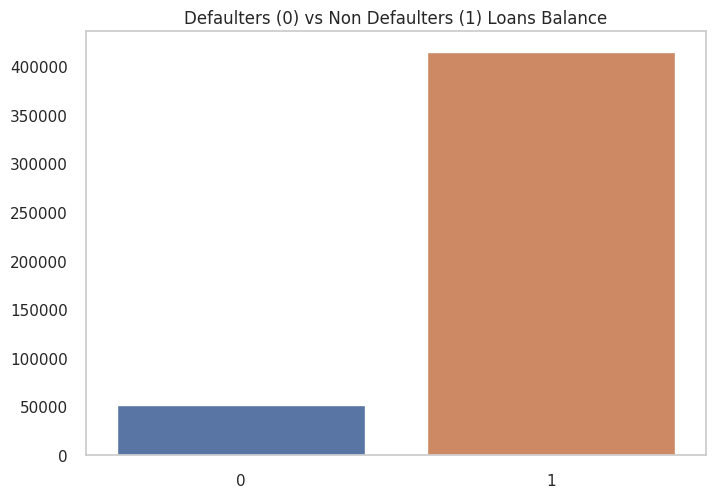

In [110]:
# check balance
plt.title('Defaulters (0) vs Non Defaulters (1) Loans Balance')
sns.barplot(x=raw_df.def_vs_nondef.value_counts().index,y=raw_df.def_vs_nondef.value_counts().values)

In [111]:
# defining variable feature
X = raw_df.drop('def_vs_nondef', axis = 1)
y = raw_df['def_vs_nondef']

In [112]:
# display data change
raw_df.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d pymnt_plan  \
0            Verified  Dec-11          n   
1     Source Verified  Dec-11          n   
2        Not Verified  Dec-11          n   
3     Source Verified  Dec-11          n   
4     Source Verified  Dec-11          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          58

# Data Preparation: Cleansing & Feature Engineering

In [113]:
# display columns that have > 70% null values
null_columns = raw_df.isnull().mean()
null_columns[null_columns > 0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

**Data Preparation:**


1.   We need to drop the columns having > 70% missing values.
2.   The follwing features are identifiers and can not be used in building model. id, member id, url, title, desc, zipcode and emp_title
3.   The sub_grade column wll also be droped as it contains the same information as the grade columns.
4.   Features that contain information about the future will not be included in building the model since those events are yet to occur. The features include next_pymnt_d, recoveries, collection_recovery_fee, total_rec_prncp and total_rec_late_fee

In [114]:
columns_to_drop = [
# null columns
      'desc',
      'mths_since_last_record',
      'mths_since_last_major_derog',
      'annual_inc_joint',
      'dti_joint',
      'verification_status_joint',
      'open_acc_6m',
      'open_il_6m',
      'open_il_12m',
      'open_il_24m',
      'mths_since_rcnt_il',
      'total_bal_il',
      'il_util',
      'open_rv_12m',
      'open_rv_24m',
      'max_bal_bc',
      'all_util',
      'inq_fi',
      'total_cu_tl',
      'inq_last_12m',

# identifier columns
      'id',
		  'member_id',
      'emp_title',
		  'url',
      'title',
      'zip_code',

# potentialy missleading columns
      'sub_grade',
      'next_pymnt_d',
      'recoveries',
      'collection_recovery_fee',
      'total_rec_prncp',
      'total_rec_late_fee',
      'policy_code',
      'Unnamed: 0']

raw_df.drop(columns=columns_to_drop, inplace=True, axis=1)
raw_df.dropna(inplace=True)

## Features Correlation

<Axes: >

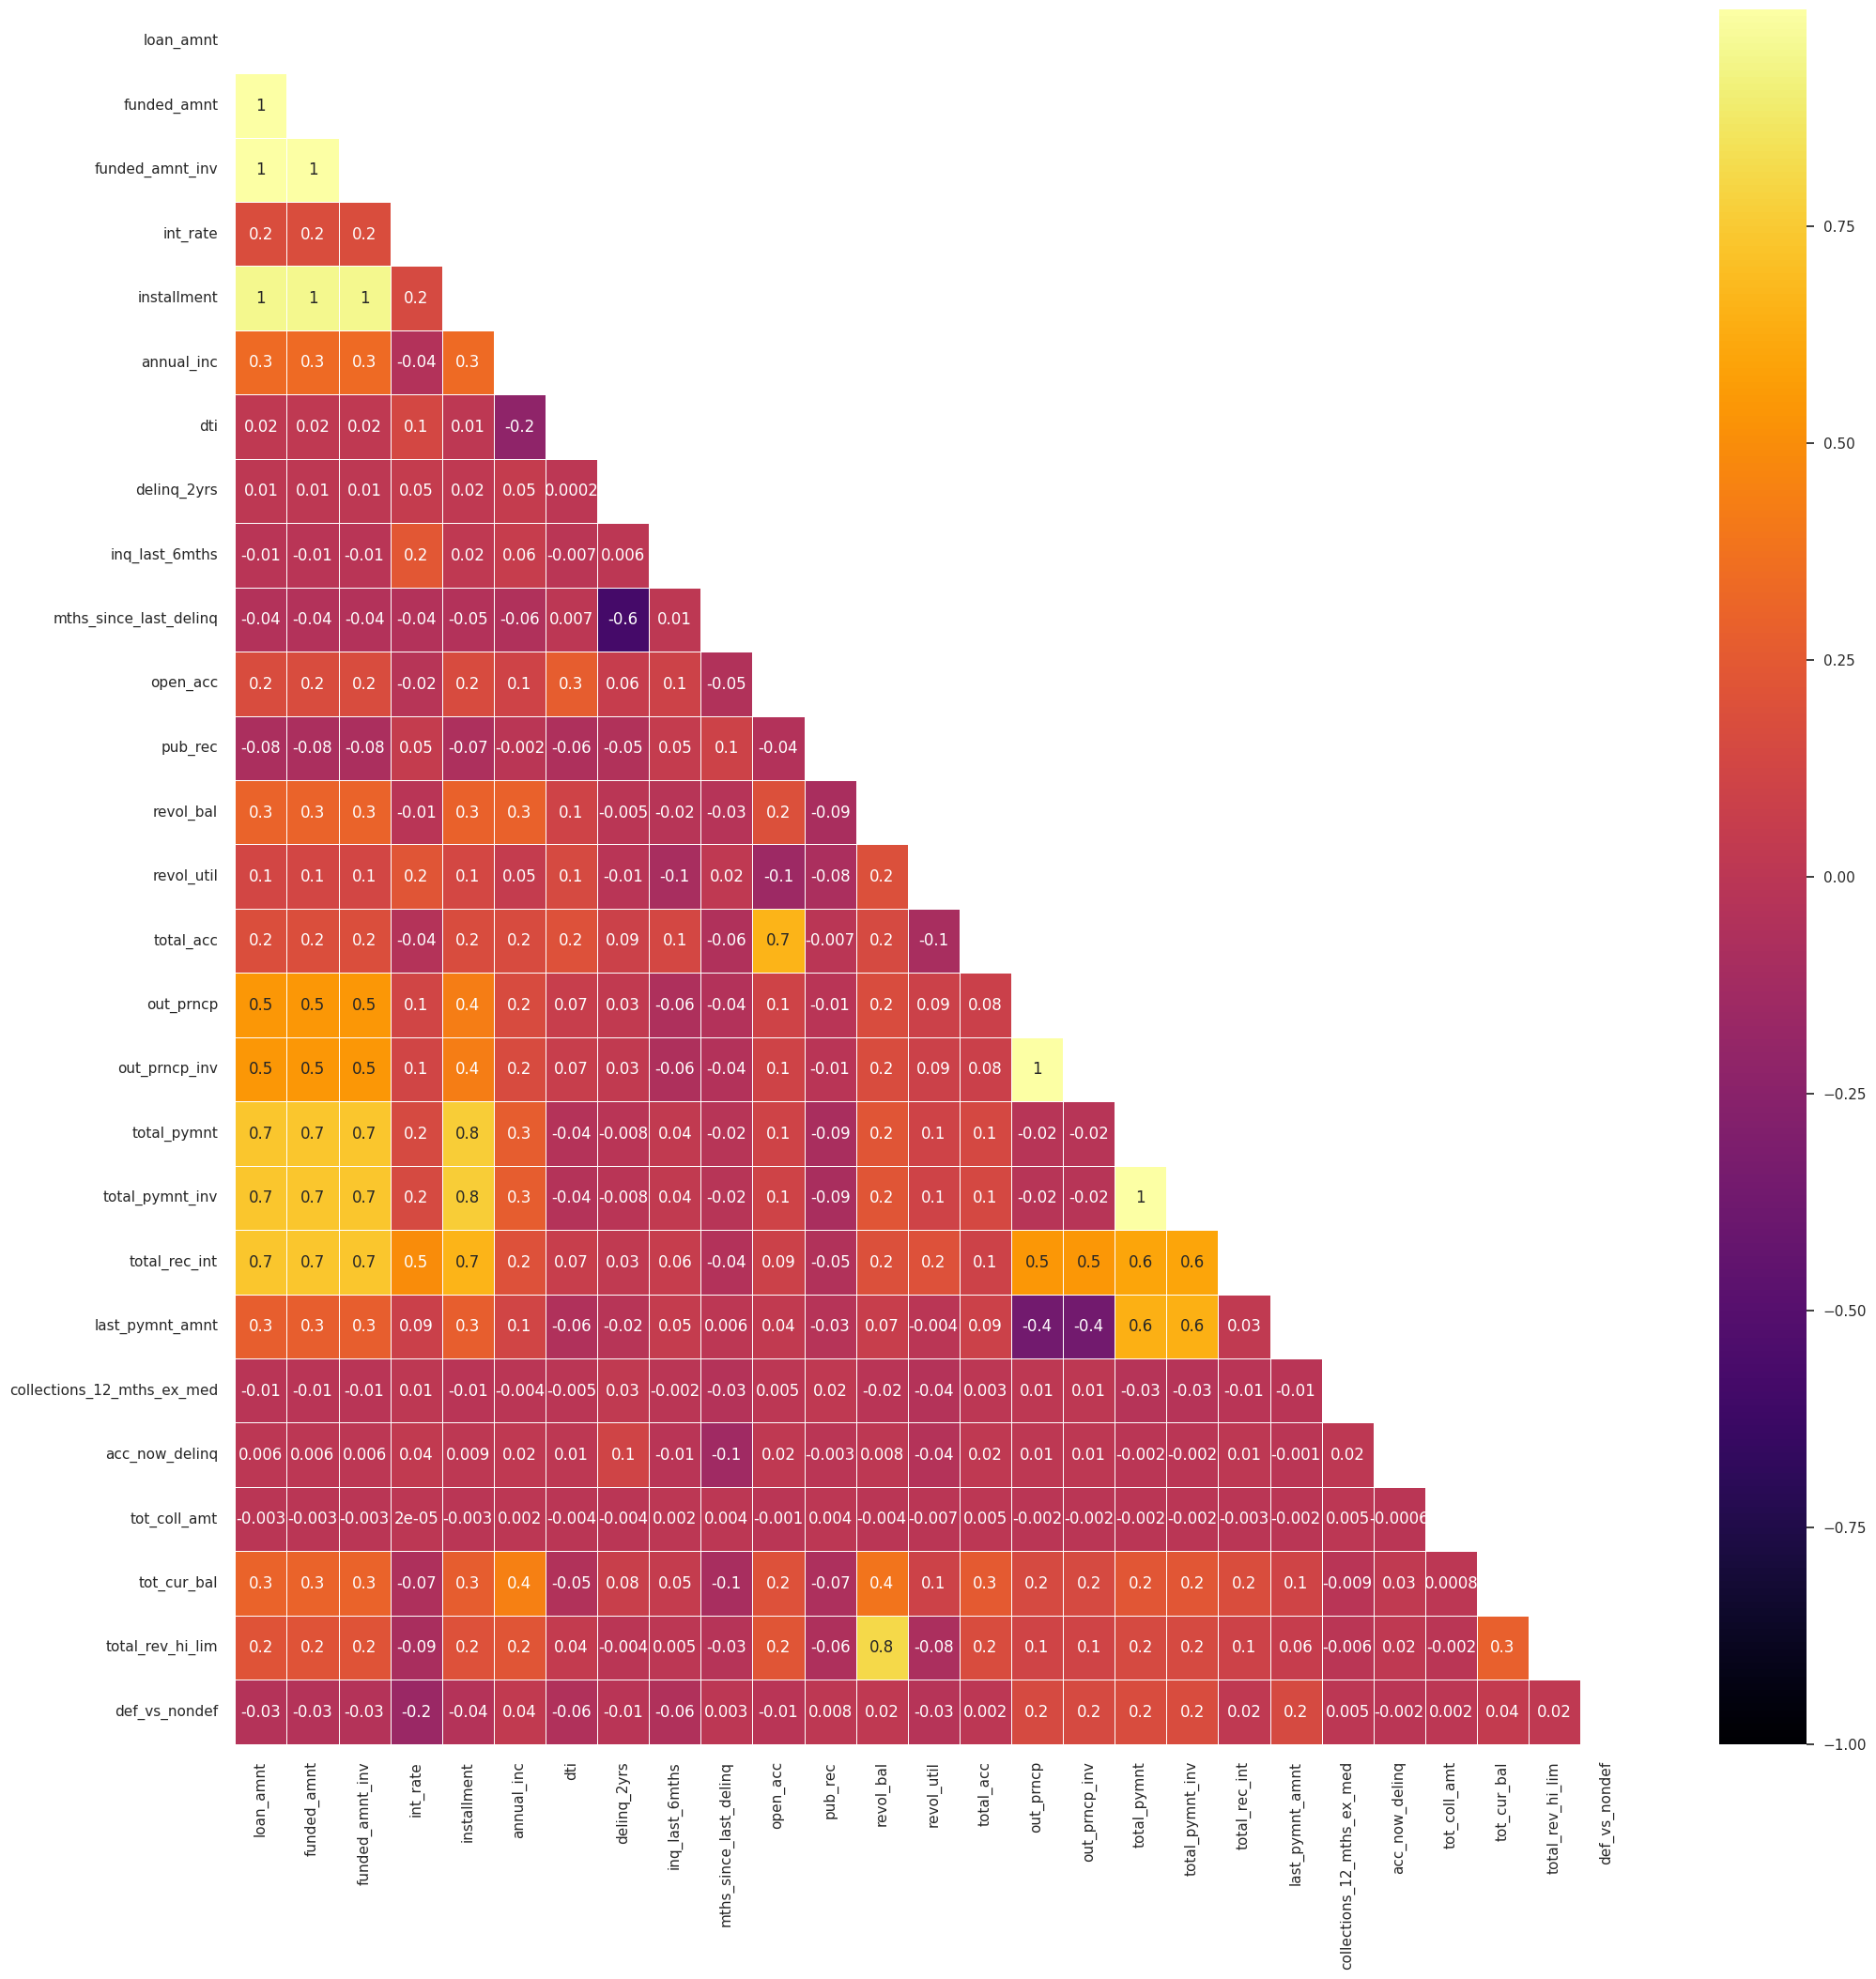

In [115]:
# correlation matrix with correlation co-effiecients 
mask = np.zeros_like(raw_df.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(raw_df.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [116]:
# remove multicollinear features
raw_df.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

<Axes: >

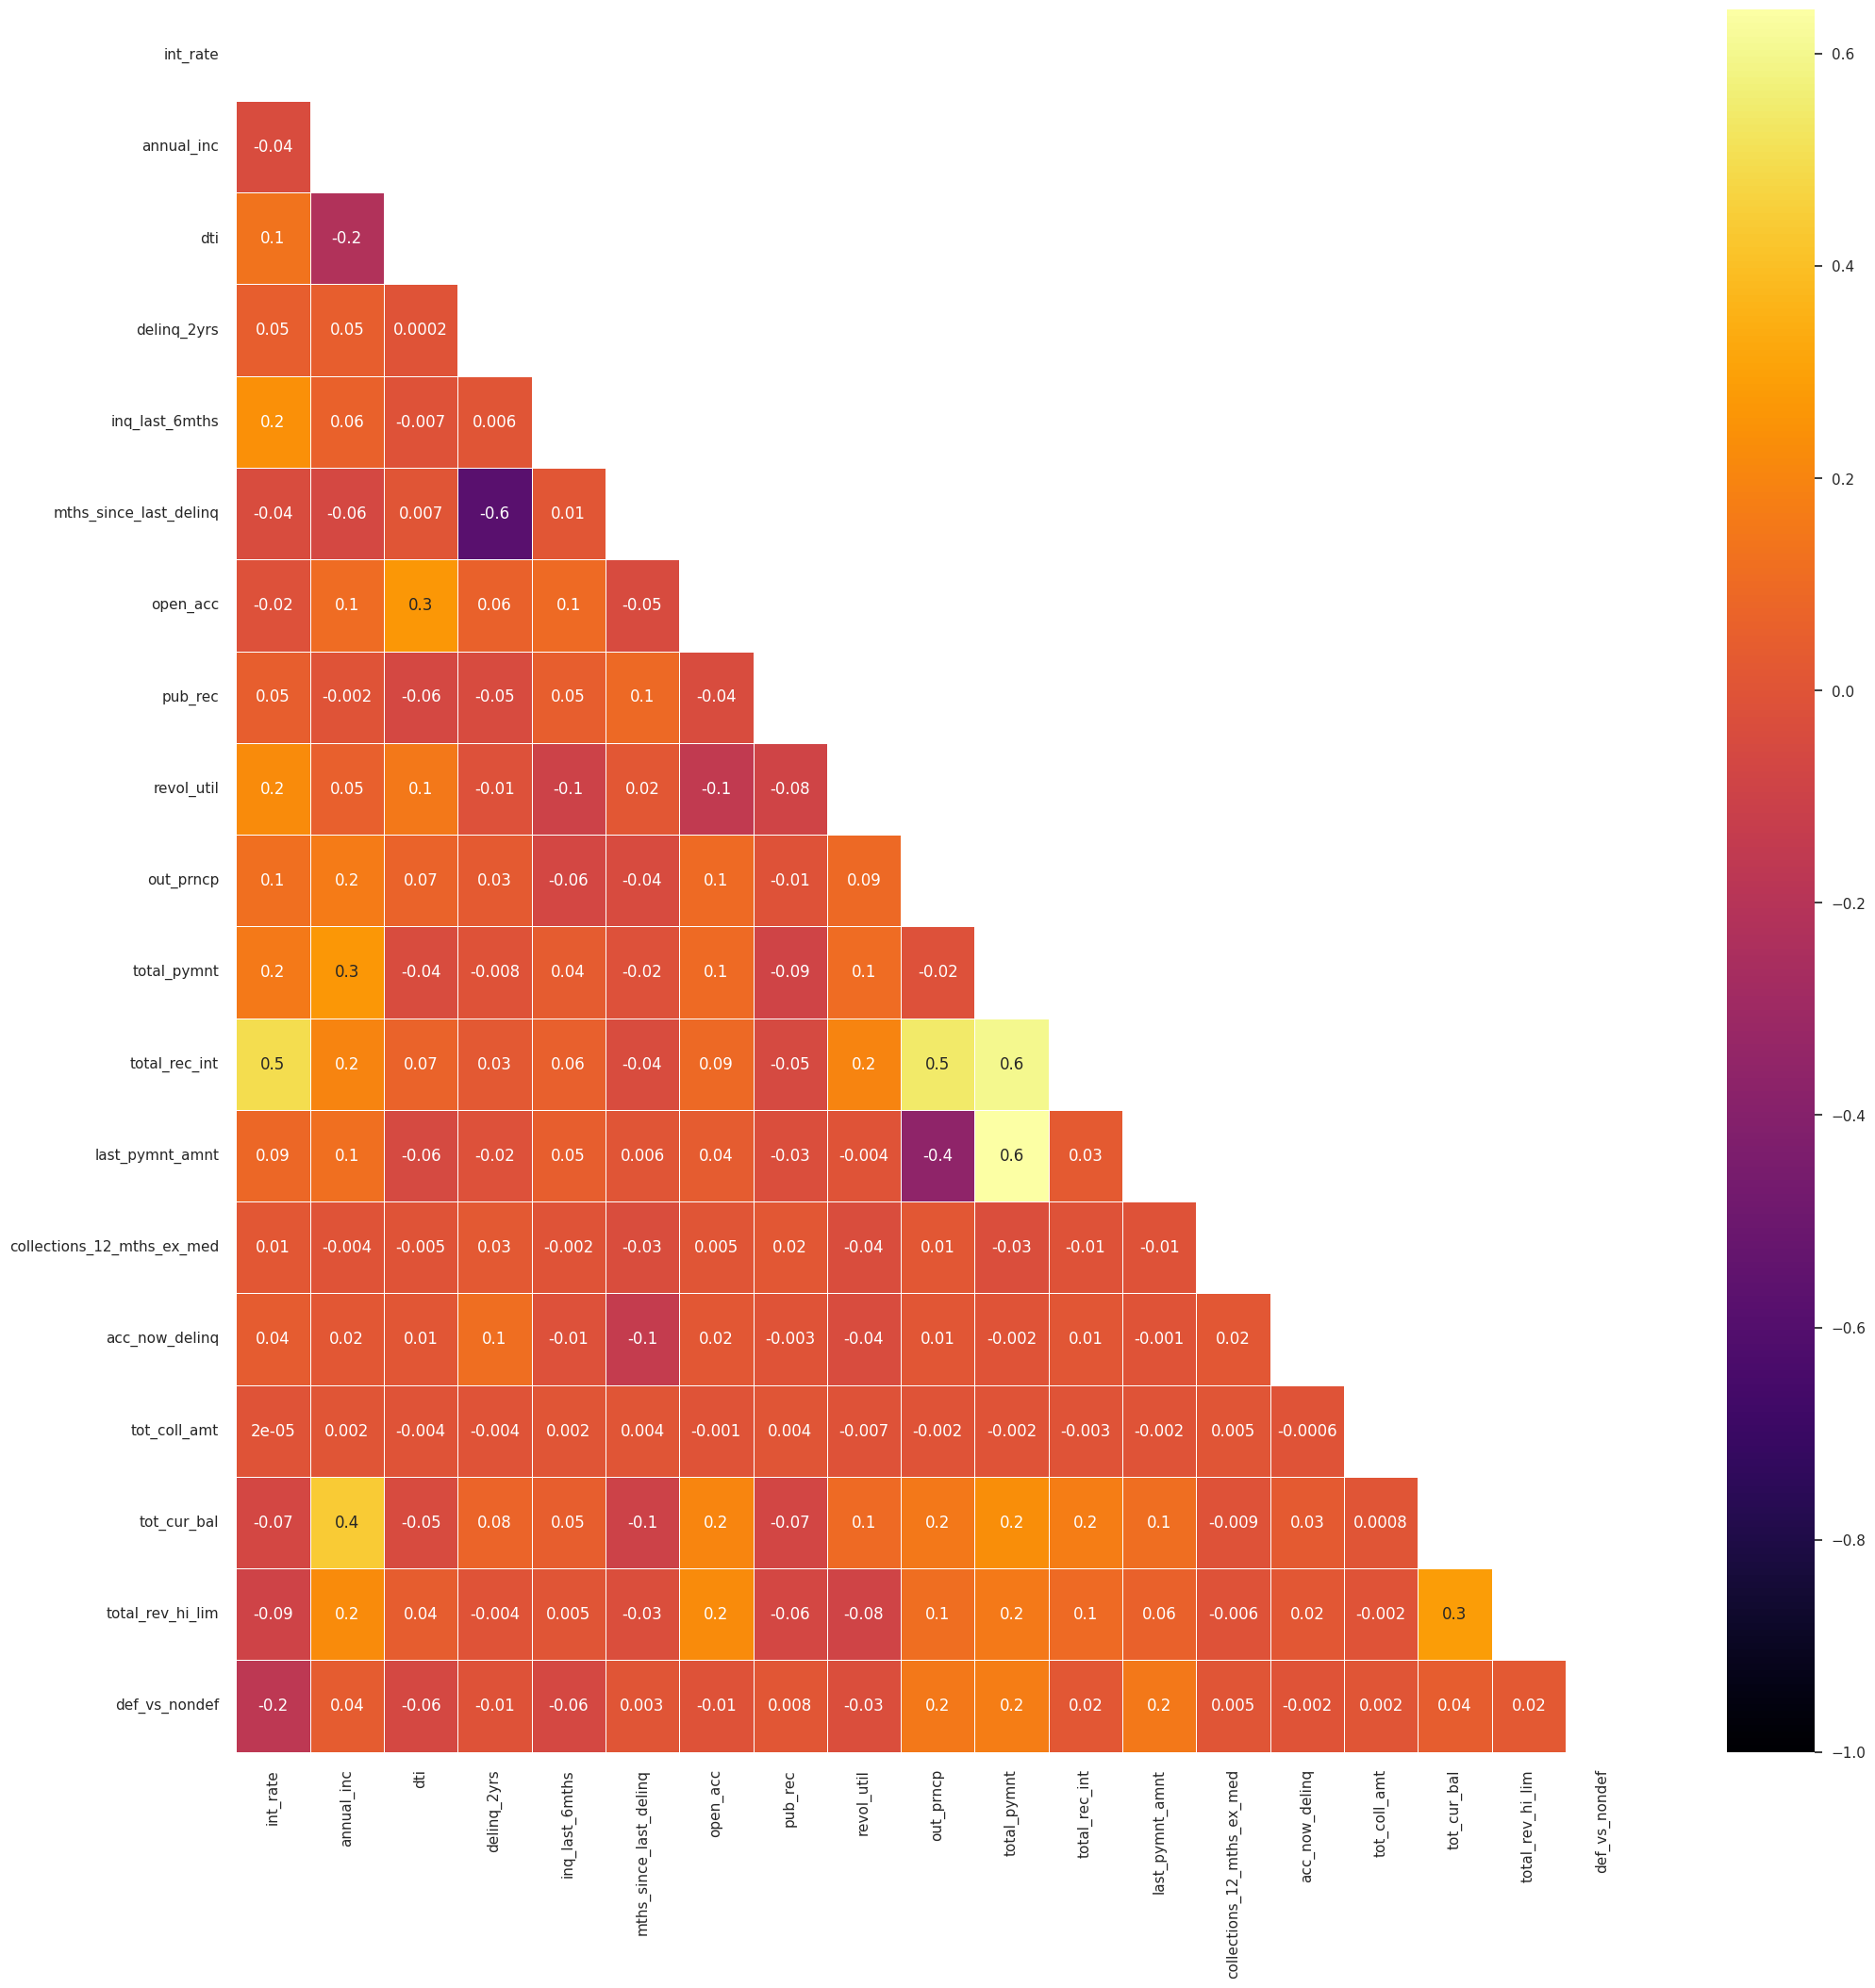

In [117]:
mask = np.zeros_like(raw_df.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(raw_df.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [118]:
# descriptive statistics
raw_df.describe()

int_rate    annual_inc            dti    delinq_2yrs  \
count  181686.000000  1.816860e+05  181686.000000  181686.000000   
mean       14.449868  7.886698e+04      17.389873       0.638040   
std         4.252272  6.078531e+04       7.787230       1.104461   
min         6.000000  4.000000e+03       0.000000       0.000000   
25%        11.670000  5.000000e+04      11.530000       0.000000   
50%        14.160000  6.800000e+04      16.910000       0.000000   
75%        17.140000  9.402825e+04      22.900000       1.000000   
max        26.060000  7.500000e+06      39.990000      29.000000   

       inq_last_6mths  mths_since_last_delinq       open_acc        pub_rec  \
count   181686.000000           181686.000000  181686.000000  181686.000000   
mean         0.822942               33.724167      11.756382       0.189244   
std          1.059299               21.716923       4.997763       0.557625   
min          0.000000                0.000000       1.000000       0.000000   
25%          0.000000               15.000000       8.000000       0.000000   
50%          0.000000               30.000000      11.000000       0.000000   
75%          1.000000               49.000000      14.000000       0.000000   
max          7.000000              188.000000      84.000000      21.000000   

          revol_util      out_prncp    total_pymnt  total_rec_int  \
count  181686.000000  181686.000000  181686.000000  181686.000000   
mean       56.548318    5291.496180   11215.608032    2679.857733   
std        22.583195    6660.857513    7986.951463    2470.226061   
min         0.000000       0.000000      35.690000       0.000000   
25%        40.300000       0.000000    5485.875000    1037.310000   
50%        57.400000    2637.215000    9127.115000    1925.520000   
75%        73.900000    8883.127500   14685.300000    3432.090000   
max       892.300000   31898.770000   56087.909920   21840.000000   

       last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  \
count    181686.000000               181686.000000   181686.000000   
mean       3146.519033                    0.016418        0.009808   
std        5633.250884                    0.149082        0.107319   
min           0.010000                    0.000000        0.000000   
25%         321.130000                    0.000000        0.000000   
50%         539.810000                    0.000000        0.000000   
75%        3048.777500                    0.000000        0.000000   
max       36170.140000                   20.000000        5.000000   

       tot_coll_amt   tot_cur_bal  total_rev_hi_lim  def_vs_nondef  
count  1.816860e+05  1.816860e+05      1.816860e+05  181686.000000  
mean   3.263843e+02  1.505644e+05      2.735155e+04       0.901897  
std    2.157745e+04  1.595617e+05      4.243696e+04       0.297455  
min    0.000000e+00  0.000000e+00      1.000000e+02       0.000000  
25%    0.000000e+00  3.245125e+04      1.230000e+04       1.000000  
50%    0.000000e+00  9.847150e+04      2.060000e+04       1.000000  
75%    0.000000e+00  2.255148e+05      3.400000e+04       1.000000  
max    9.152545e+06  8.000078e+06      9.999999e+06       1.000000

# Data Preparation: Data Type Conversion

In [119]:
# check the data types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_c

The following variables are not possessing appropriate data types and should be modified. Also the NaN values should be replaced with zeroes wherever applicable.

*   emp_length
*   term
*   issue_d
*   last_pymnt_d
*   last_credit_pull_d
*   earliest_cr_line

We will define functions to transform their data types.

In [120]:
# converting emp_length to numeric and assign NaN to zero

def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
    
emp_length_convert(raw_df, 'emp_length')

raw_df['emp_length'].unique()

array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9])

In [121]:
# check the converted data type of 'emp_length' columns
raw_df['emp_length'].dtype

dtype('int64')

In [122]:
# converting term to numeric

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(raw_df, 'term')

In [123]:
# check the converted data type of 'term' columns
raw_df['term'].dtype

dtype('int64')

In [124]:
# preprocessing date cols 

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_columns(raw_df, 'issue_d')
date_columns(raw_df, 'last_pymnt_d')
date_columns(raw_df, 'last_credit_pull_d')
date_columns(raw_df, 'earliest_cr_line')

In [125]:
# confirm there is no missing values
missing_values = raw_df.isnull().sum()
missing_values[missing_values>0]/len(raw_df)

Series([], dtype: float64)

In [126]:
# separating categorical features from numerical
categorical_features = raw_df.select_dtypes(exclude='number')
numerical_features = raw_df.select_dtypes(exclude='object')

In [127]:
# converting to dataframe 
filled_df = raw_df

In [128]:
preprocess_df = raw_df

# checking for any missing values
missing = preprocess_df.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

All of our data has been fully filled

# Binning, Weight of Evidence (WoE), and Information Value (IV)

*   **Binning** create buckets of independent variables based on ranking methods. Binning helps us converting continuous variables into categorical ones. This process allows us to understand feature performance better. The insights from this part of the analysis can be useful in devising portfolio risk strategies. One simple binning example using "age" is given below for illustration.
*   **Weight of Evidence (WoE)** will help us to determine which categories should be binned together. WOE measures the strength of a bin in differentiating the Good and Bad accounts. WOE < 0 indicates that the variable bin is captures higher proportion of bad accounts.
*   **Information Value (IV)** will help in determining which variables are useful for prediction in the logistic regression model. IV is the measure of overall predictive power of the variables and is very useful for feature selection.

In [129]:
# function to calculate Weight of Evidence (WoE) and Information Value (IV)

def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    # run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(preprocess_df, target='def_vs_nondef', bins=20)

Information value of term is 0.035478
Information value of int_rate is 0.347724
Information value of grade is 0.281145
Information value of emp_length is 0.007174
Information value of home_ownership is 0.017952
Information value of annual_inc is 0.037998
Information value of verification_status is 0.033377
Information value of pymnt_plan is 0.000309
Information value of purpose is 0.028333
Information value of addr_state is 0.010291
Information value of dti is 0.041026
Information value of delinq_2yrs is 0.001039
Information value of inq_last_6mths is 0.040454
Information value of mths_since_last_delinq is 0.002487
Information value of open_acc is 0.004499
Information value of pub_rec is 0.000504
Information value of revol_util is 0.008858
Information value of initial_list_status is 0.011513
Information value of out_prncp is 0.703375
Information value of total_pymnt is 0.515794
Information value of total_rec_int is 0.011108
Information value of last_pymnt_amnt is 1.491828
Information v

The rule of thumb says that all variables with IV < 0.02 are not useful for prediction and IV > 0.5 have a suspicious predictive power. Therefore, the follwing variables will not be included out_prncp, last_pymnt_amnt, delinq_2yrs, mths_since_last_delinq, open_acc, pub_rec, total_acc, collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt and mths_since_last_pymnt_d

In [130]:
low_iv_columns = [
      'pymnt_plan',
      'last_pymnt_amnt',
      'revol_util',
      'delinq_2yrs',
      'mths_since_last_delinq', 
      'open_acc',
      'pub_rec',
      'collections_12_mths_ex_med',
      'acc_now_delinq',
      'tot_coll_amt',
      'mths_since_last_pymnt_d',
      'emp_length',
      'application_type']

preprocess_df.drop(columns=low_iv_columns, inplace=True, axis=1)

In [131]:
# dummy variables for cat cols
dummy_df1 = [pd.get_dummies(preprocess_df['grade'], prefix='grade', prefix_sep=':'),
             pd.get_dummies(preprocess_df['home_ownership'], prefix='home_ownership', prefix_sep=':'),
             pd.get_dummies(preprocess_df['verification_status'], prefix='verification_status', prefix_sep=':'),
             pd.get_dummies(preprocess_df['purpose'], prefix='purpose', prefix_sep=':'),
             pd.get_dummies(preprocess_df['addr_state'], prefix='addr_state', prefix_sep=':'),
             pd.get_dummies(preprocess_df['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
            ]

In [132]:
# turn dummy_df1 into dataframe
categorical_dummy = pd.concat(dummy_df1, axis=1)

In [133]:
# concatinating preprocess_data with categorical_dummies
preprocess_df = pd.concat([preprocess_df, categorical_dummy], axis=1)

In [134]:
# function to calculate WoE of cat features

def woe_categorical(df, cat_feature, def_nondef_df):
    df = pd.concat([df[cat_feature], def_nondef_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [135]:
# function to plot WoE

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 12))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [136]:
# separating data into target and features
X= preprocess_df.drop(columns='def_vs_nondef', axis=1)
y= preprocess_df['def_vs_nondef']

# Plotting WoE: Categorical Variables Analysis

## 1.   Analyzing Grade Variable

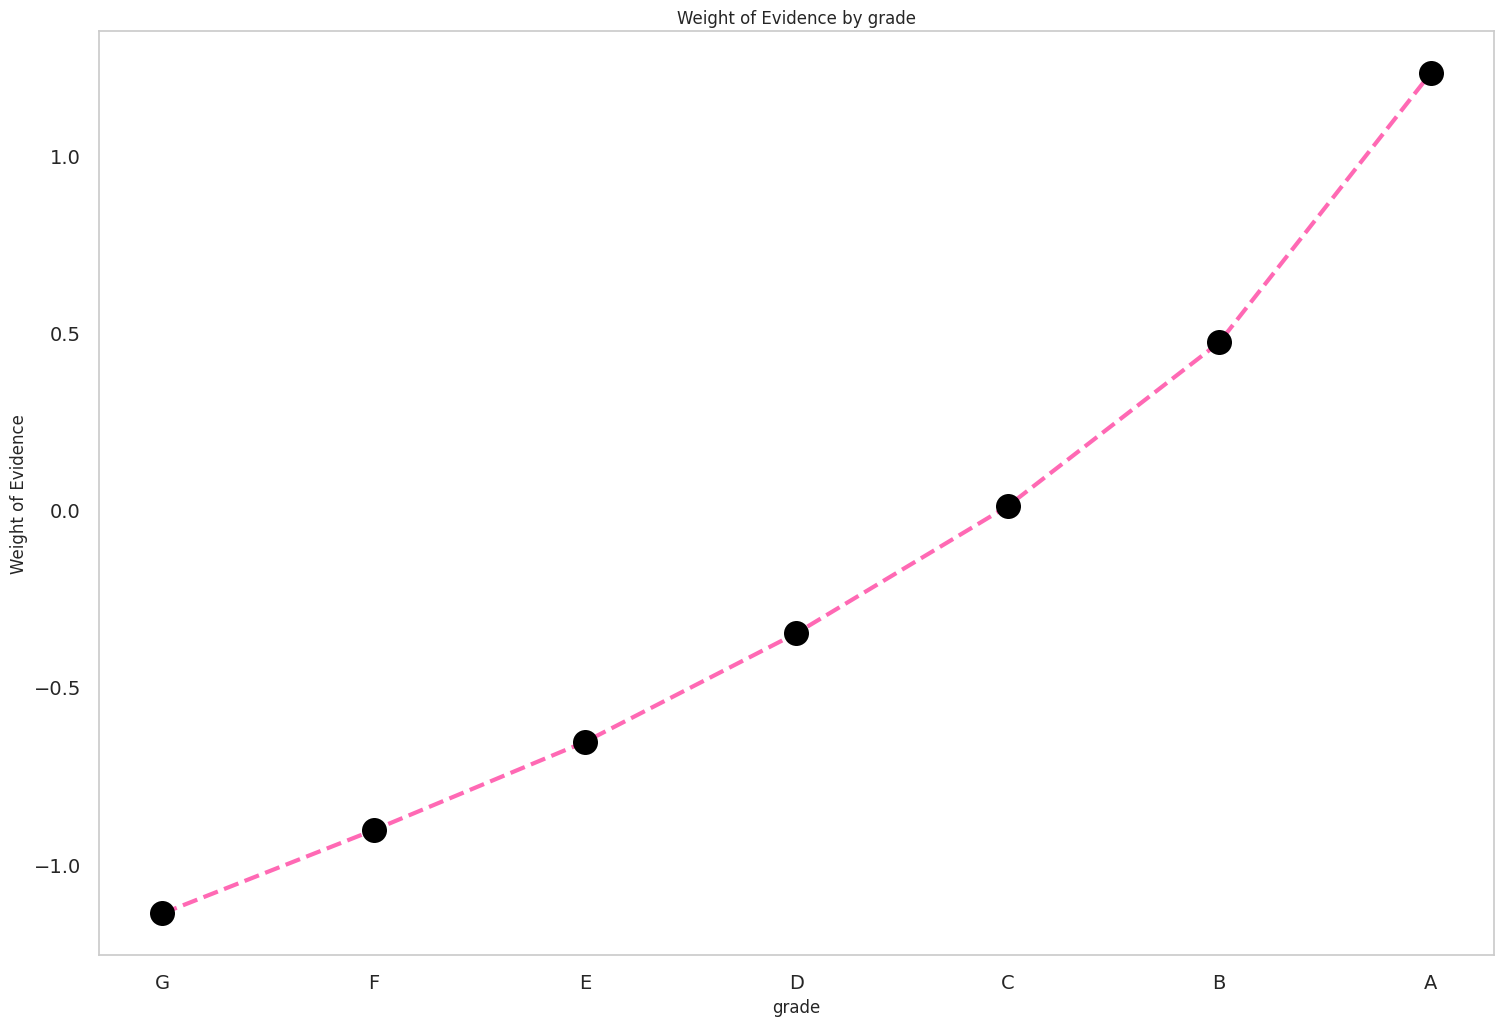

In [137]:
grade_df = woe_categorical(X, 'grade', y)
plot_by_woe(grade_df)

We can see from the above graph that the grades have significantly different woe as we grade changes. We will therefore keep each grade as a feature.

## 2.   Analyzing Home Ownership *Variable*



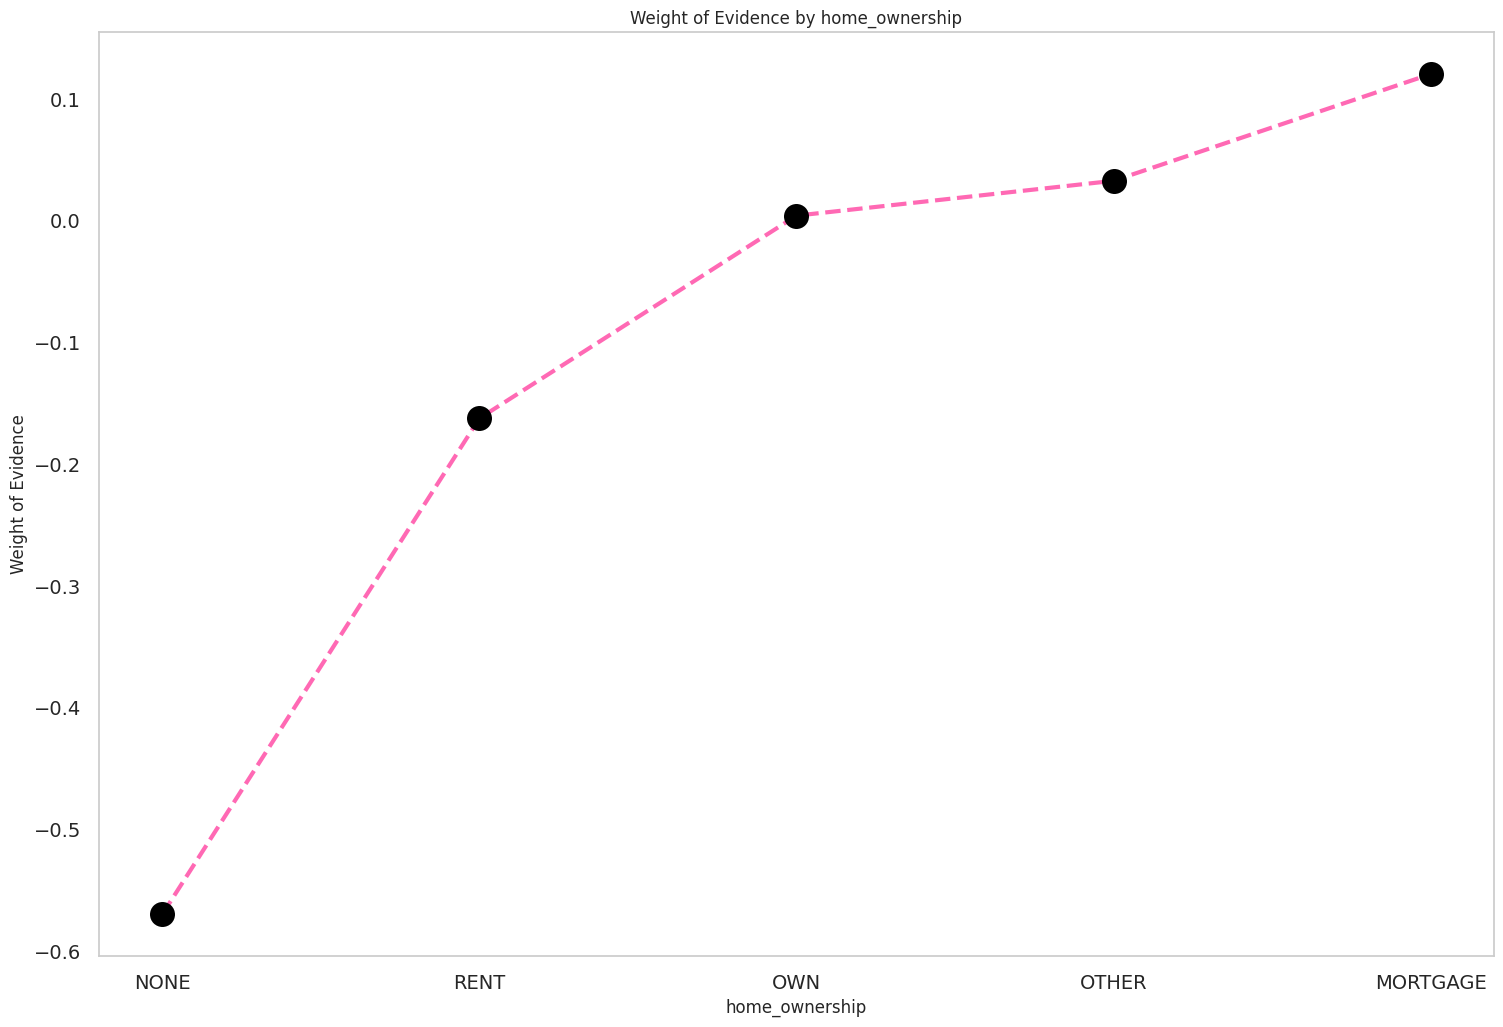

In [138]:
home_df = woe_categorical(X, 'home_ownership', y)
plot_by_woe(home_df)

OTHER, NONE and ANY have very few observations and should be combined with the category with high risk of default that is RENT

## 3. Analyzing Verification status variable

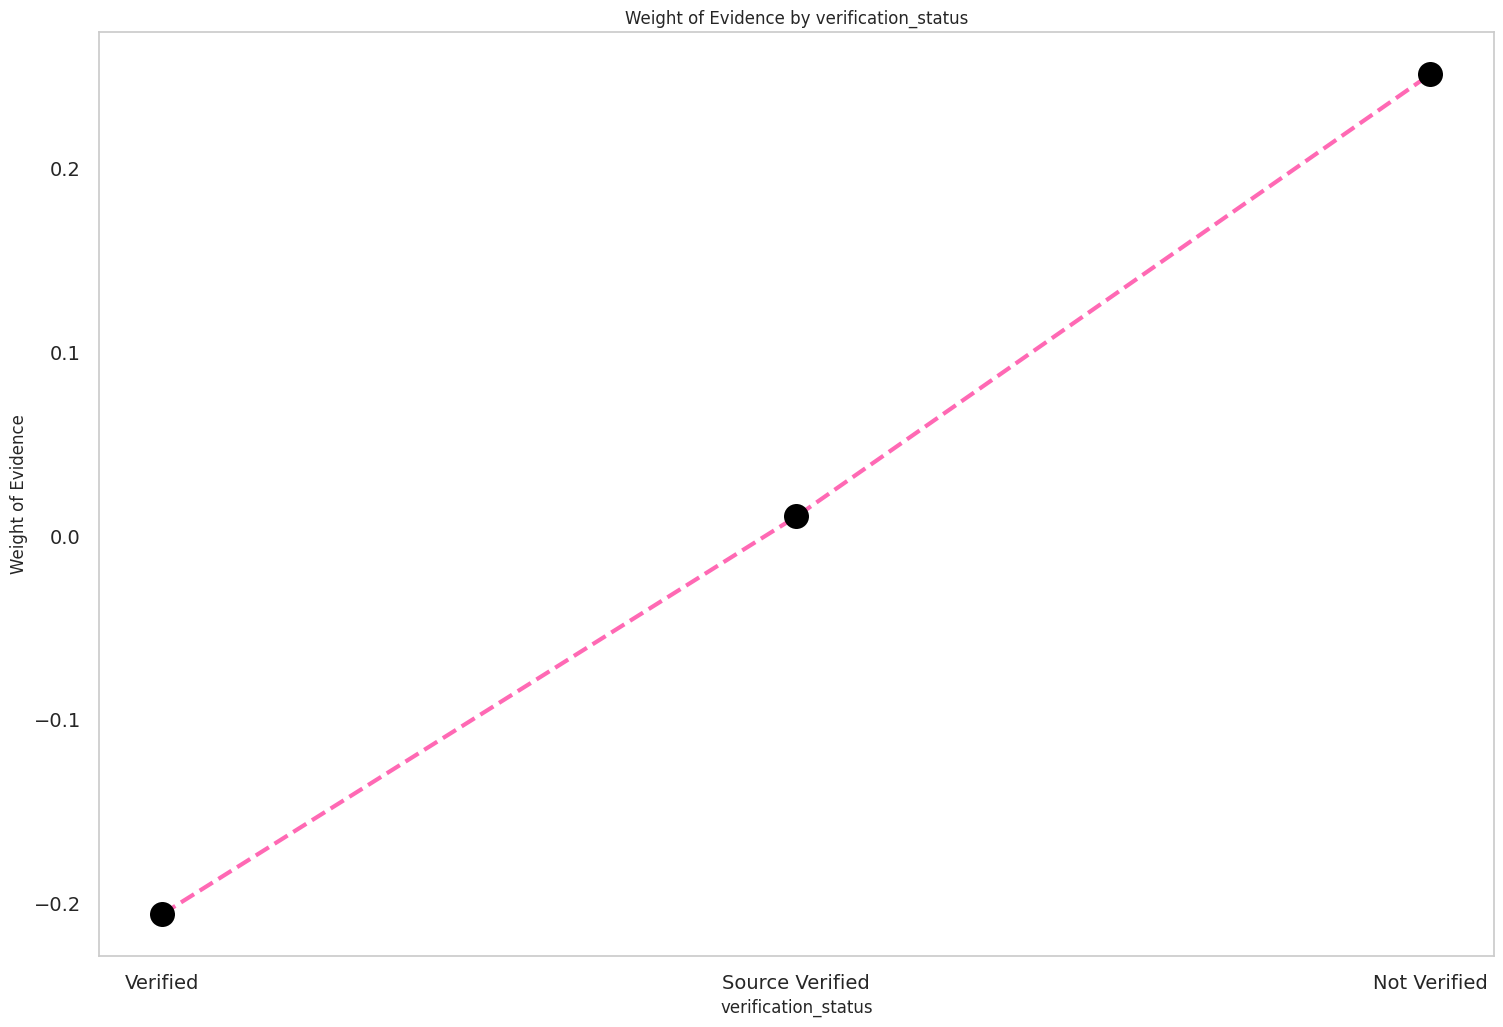

In [139]:
verification_df = woe_categorical(X, 'verification_status', y)
plot_by_woe(verification_df)


This variable has different WoE values and can be used as seperate variables

## 4. Analyzing Purpose variable

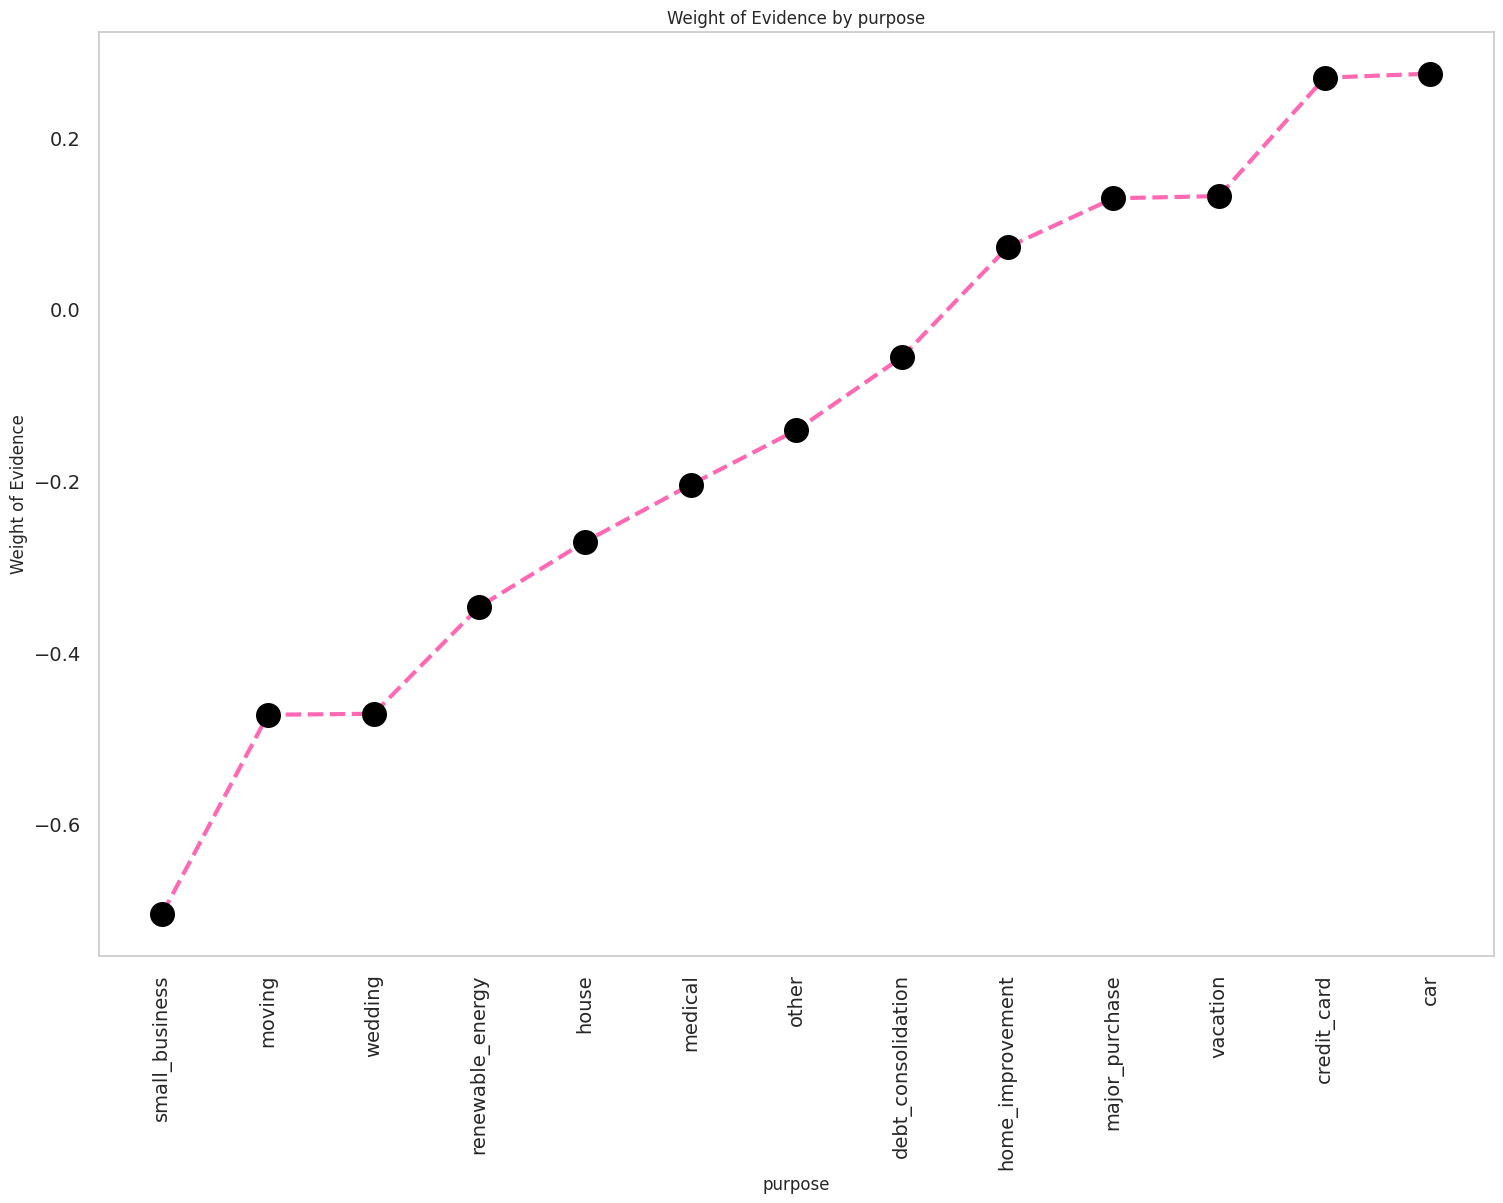

In [140]:
purpose_df = woe_categorical(X, 'purpose', y)
plot_by_woe(purpose_df, 90)

The following categories wil be combined together:

educational, renewable_energy, moving other,house, medical weeding, vacation debt_consolidation home_improvement, major purchase car, credit_card

## 5. Analyzing address-state variable

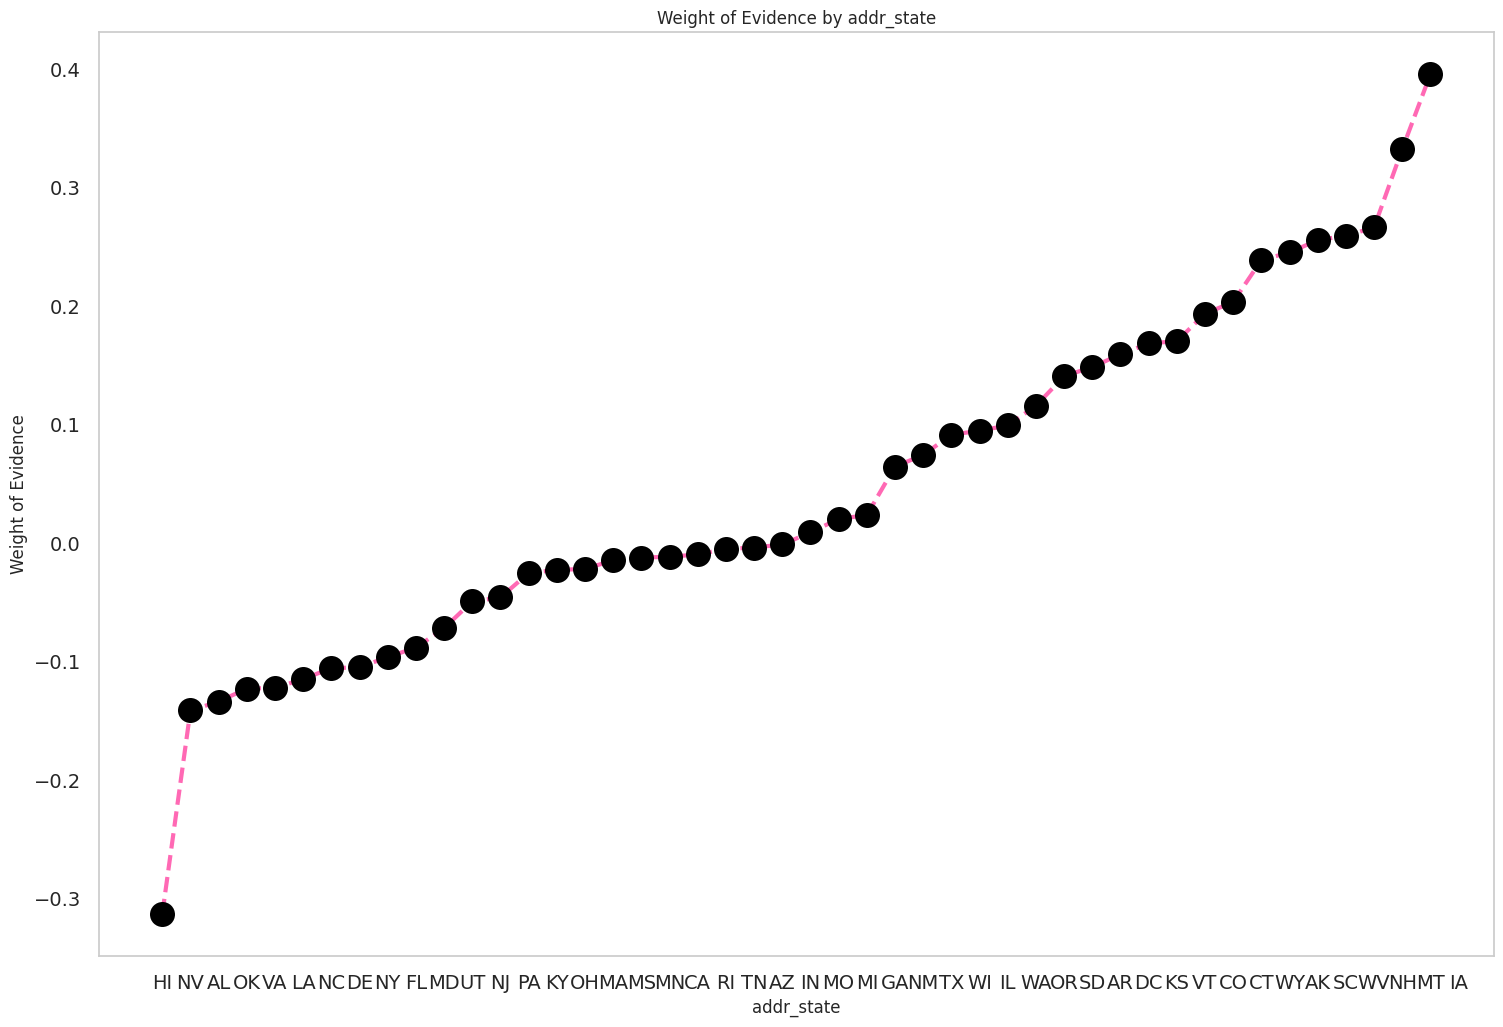

In [141]:
addr_df = woe_categorical(X, 'addr_state', y)
plot_by_woe(addr_df)

The states NE, IA, ME and ID have low observations and this may be the reason for their extreme WoE. We will plot the graph again excluding these categories and see if there is any change.

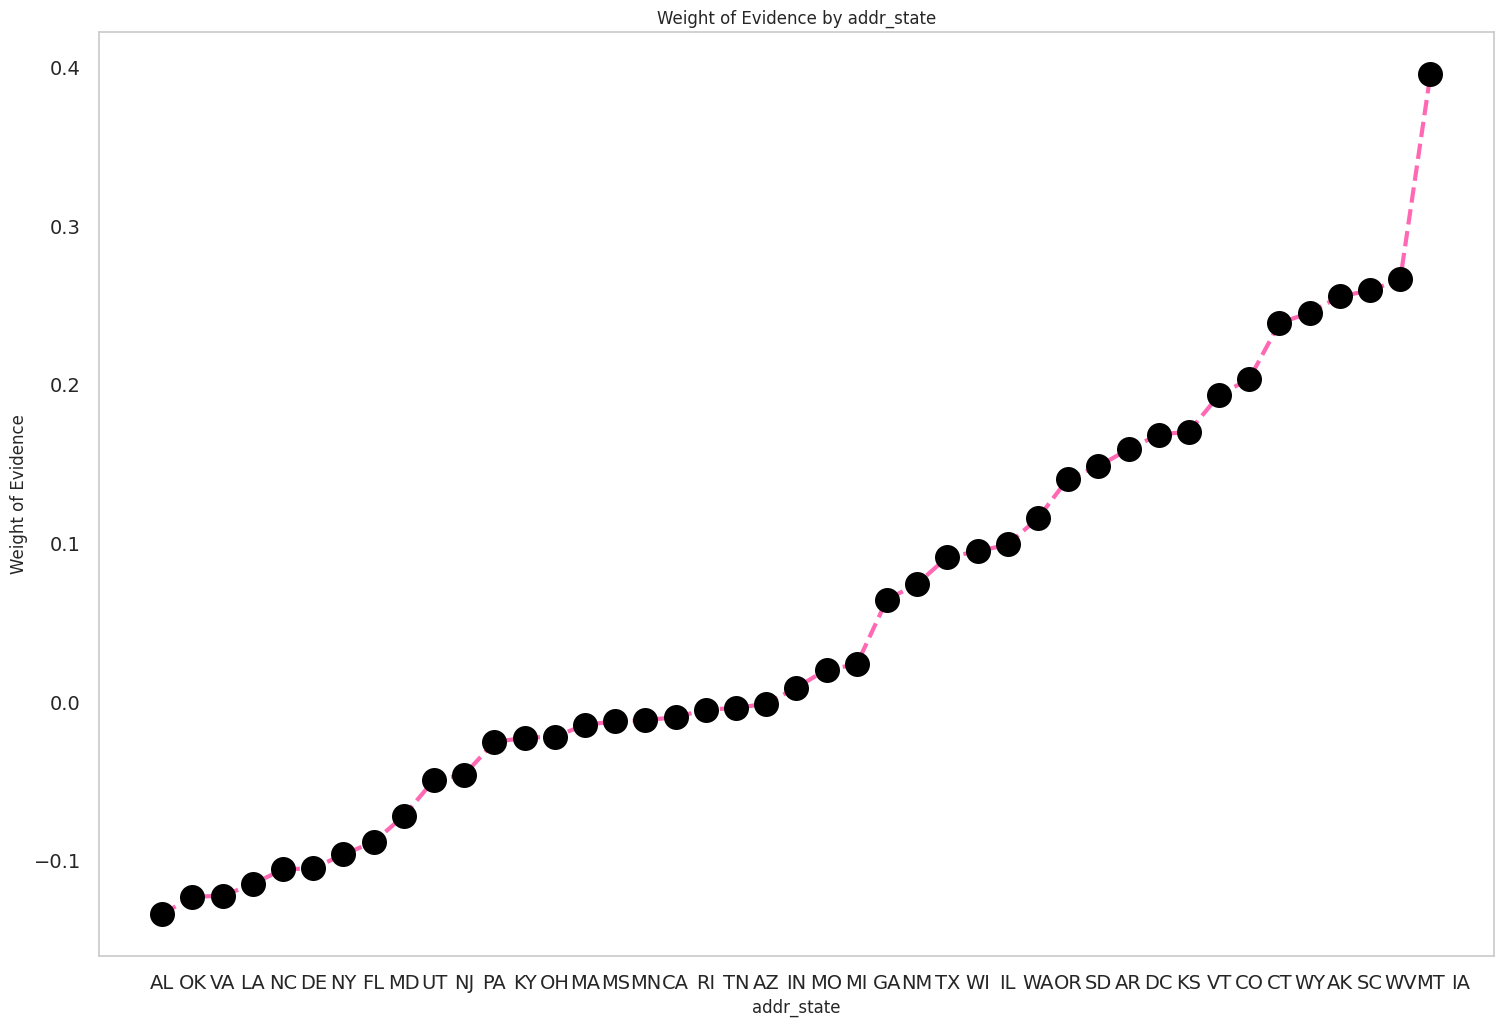

In [142]:
addr_df1 =addr_df.iloc[2:44, :]
addr_df2 =addr_df.iloc[45:49, :]
low_data_woe = pd.concat([addr_df1, addr_df2], axis=0)
plot_by_woe(low_data_woe)

In deciding which categories to combine we use both WOE and the number of observations in our analysis. Categories with similar WoE but significantly different observations will not be combined together, because the number of observations can influence the WoE values. Also, categories with both similar WoE and observations greater than 5% can be combined together to form a new category. This process will be used for the rest of analysis.The categories to be combined as follows:

*   NE, IA, NV, HI, FL, AL
*   NY
*   LA, NM, OK, NC, MO, MD, NJ, VA
*   CA
*   AZ, MI, UT, TN, AR, PA
*   RI, OH, KY, DE, MN, SD, MA, IN
*   GA, WA
*   WI, OR
*   TX
*   IL, CT,MT
*   CO, SC
*   KS, VT, AK, MS
*   NH, WV, WY, DC

In total we will have to create 13 categories for the addr_variable. We will create these variables later. Let us move on to analyze the rest of the features.



## 6. Analyzing initial list status variable

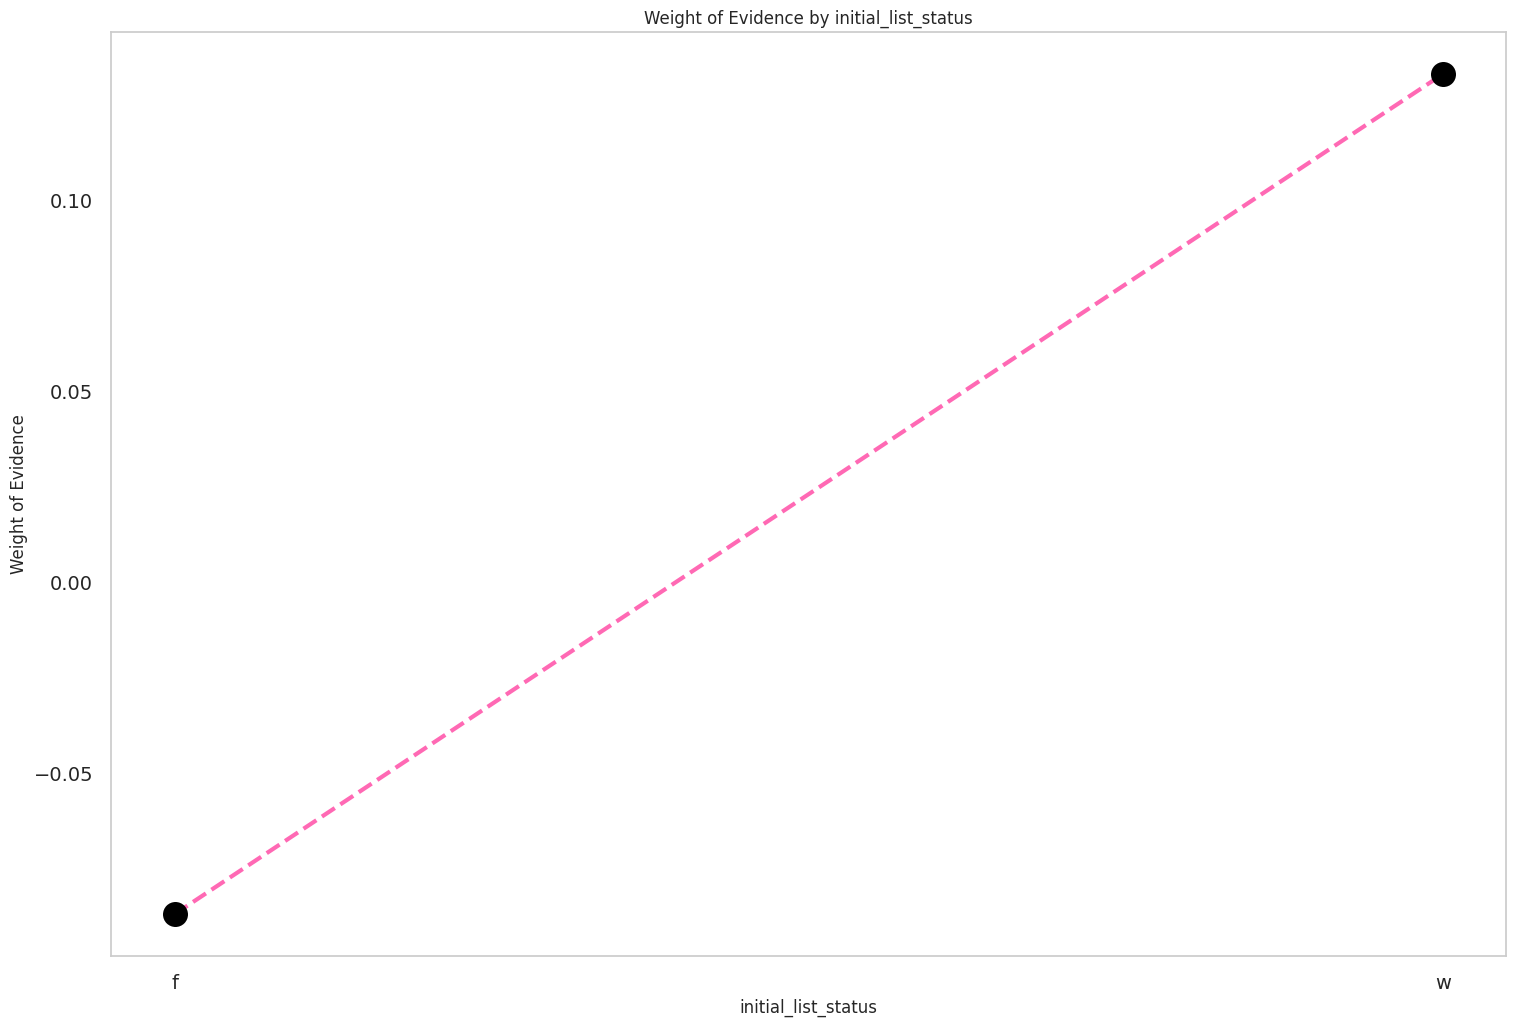

In [143]:
init_list_df = woe_categorical( X, 'initial_list_status', y)
plot_by_woe(init_list_df)

This variable has significantly different WoE values and categories should be kept as seperate variables

# Plotting WoE: Continous Variables Analysis

In [144]:
# function to calculate WoE for continous variables

def woe_continous(df, cat_feature, def_nondef_df):
    df = pd.concat([df[cat_feature], def_nondef_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

## 1. Analyzing term variable

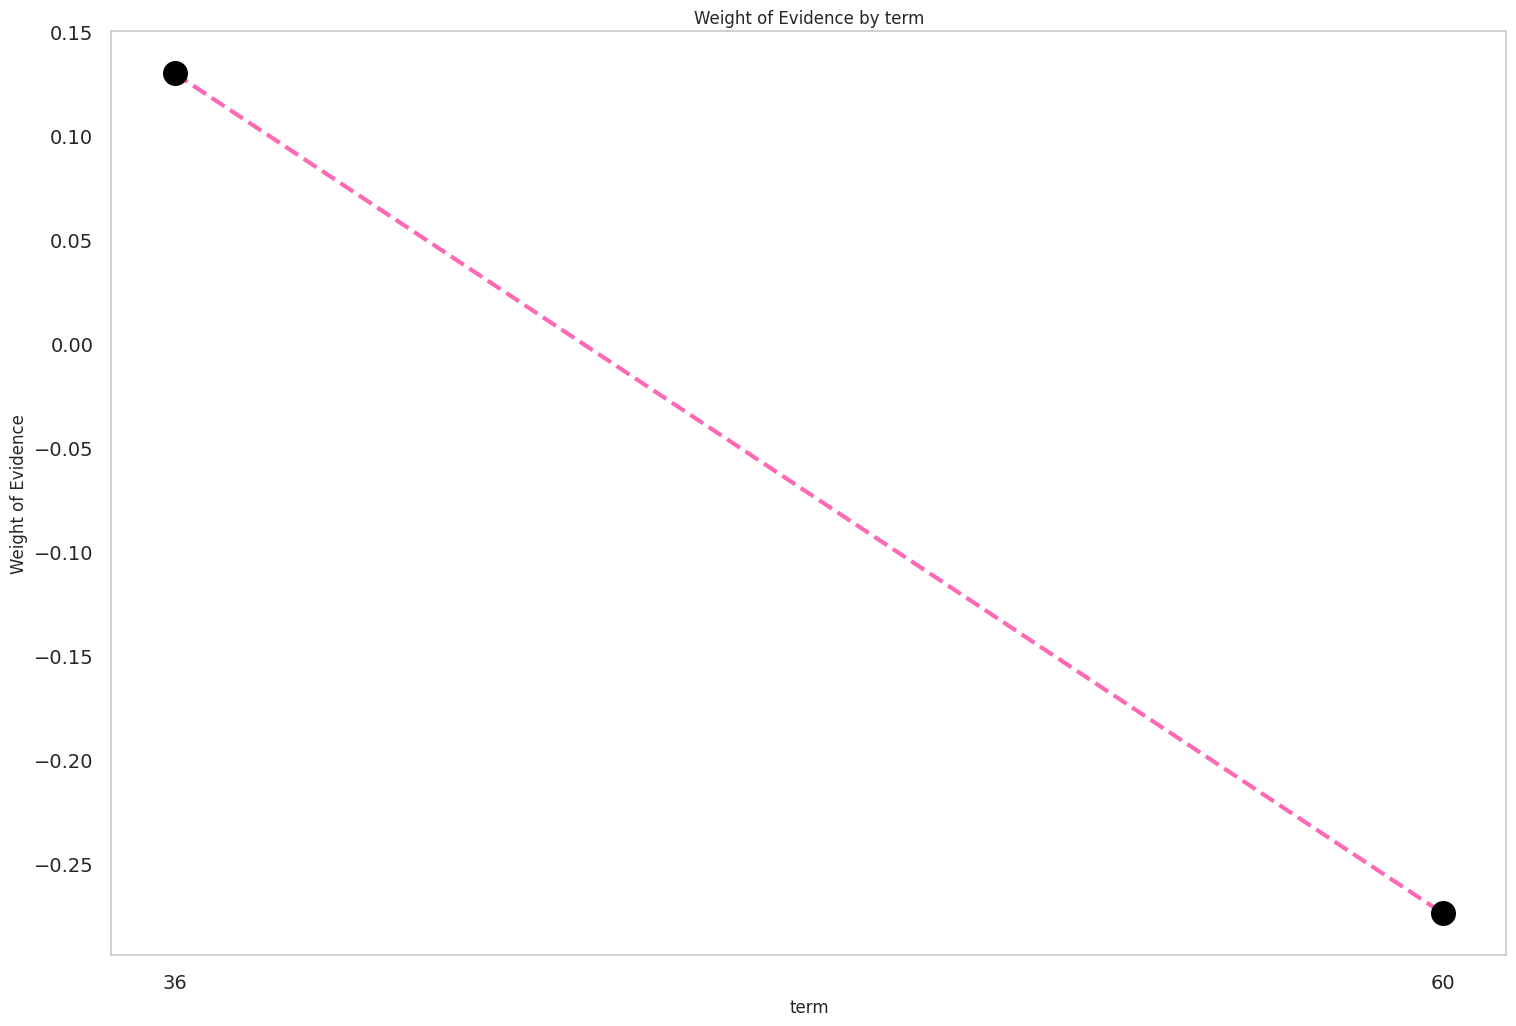

In [145]:
plot_by_woe(woe_continous(X,'term', y ))

## 2. Analyzing months since issued variable

In [146]:
X['mths_since_issue_d'].unique()

array([80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       93., 94., 95., 96., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79.])

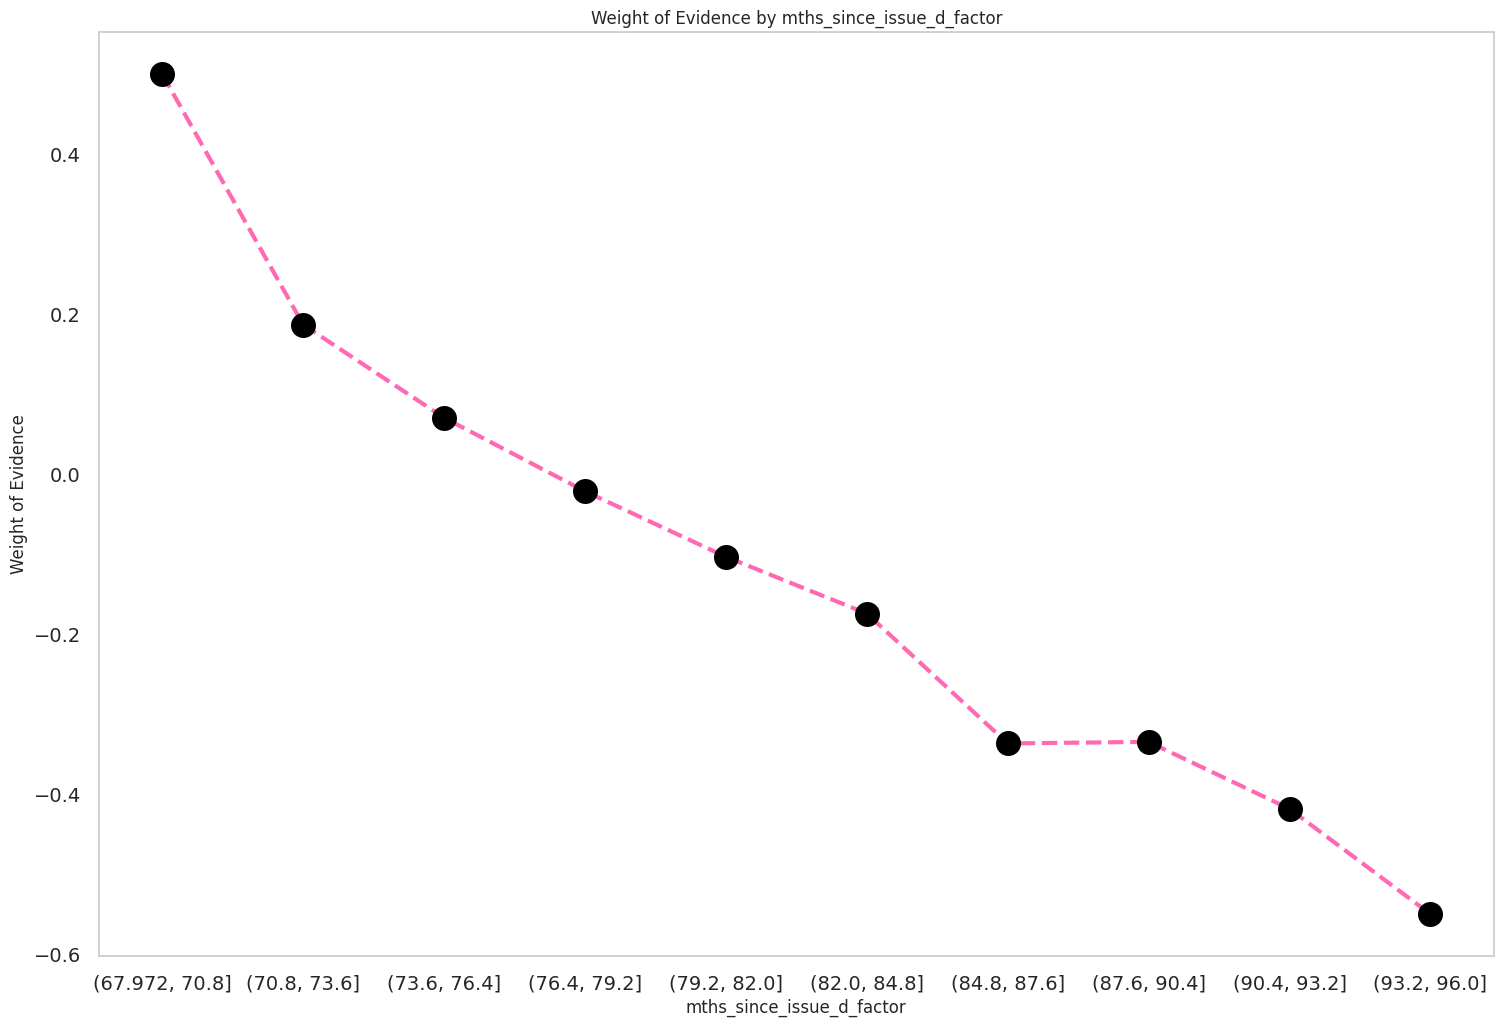

In [147]:
# fine class by creating  a new var

X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)
mths_since_iss_df = woe_continous(X, 'mths_since_issue_d_factor', y)
plot_by_woe(mths_since_iss_df)

The following categories will be created based on their WoE and number of observations

*   (67.97, 70.8)
*   (70.8, 73.6)
*   (73.6- 76.4)
*   (76.4.- 79.2)
*   (79.2-82)
*   (82-84)
*   (84-90.4)
*   (90.4-96)

## 3. Analyzing interest rate variable

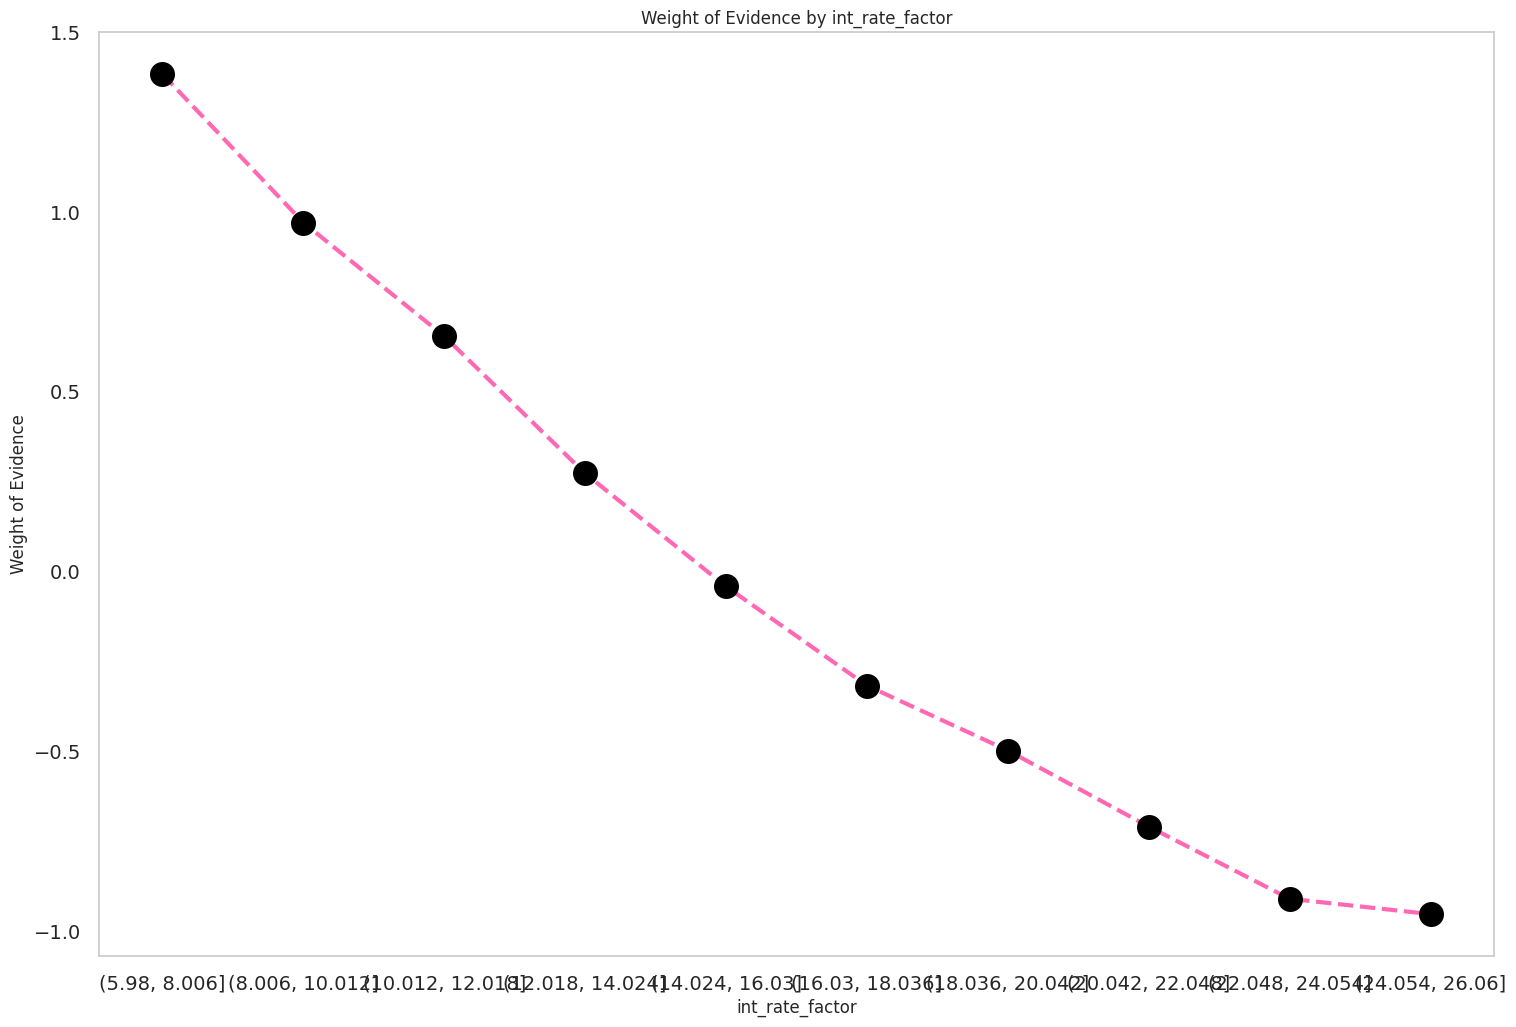

In [148]:
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)
int_rate_df = woe_continous(X, 'int_rate_factor',y)
plot_by_woe(int_rate_df)

From the graph above only the last two categories will be combined.

(22.048, 26)

## 4. Analyzing total_rec_int variable

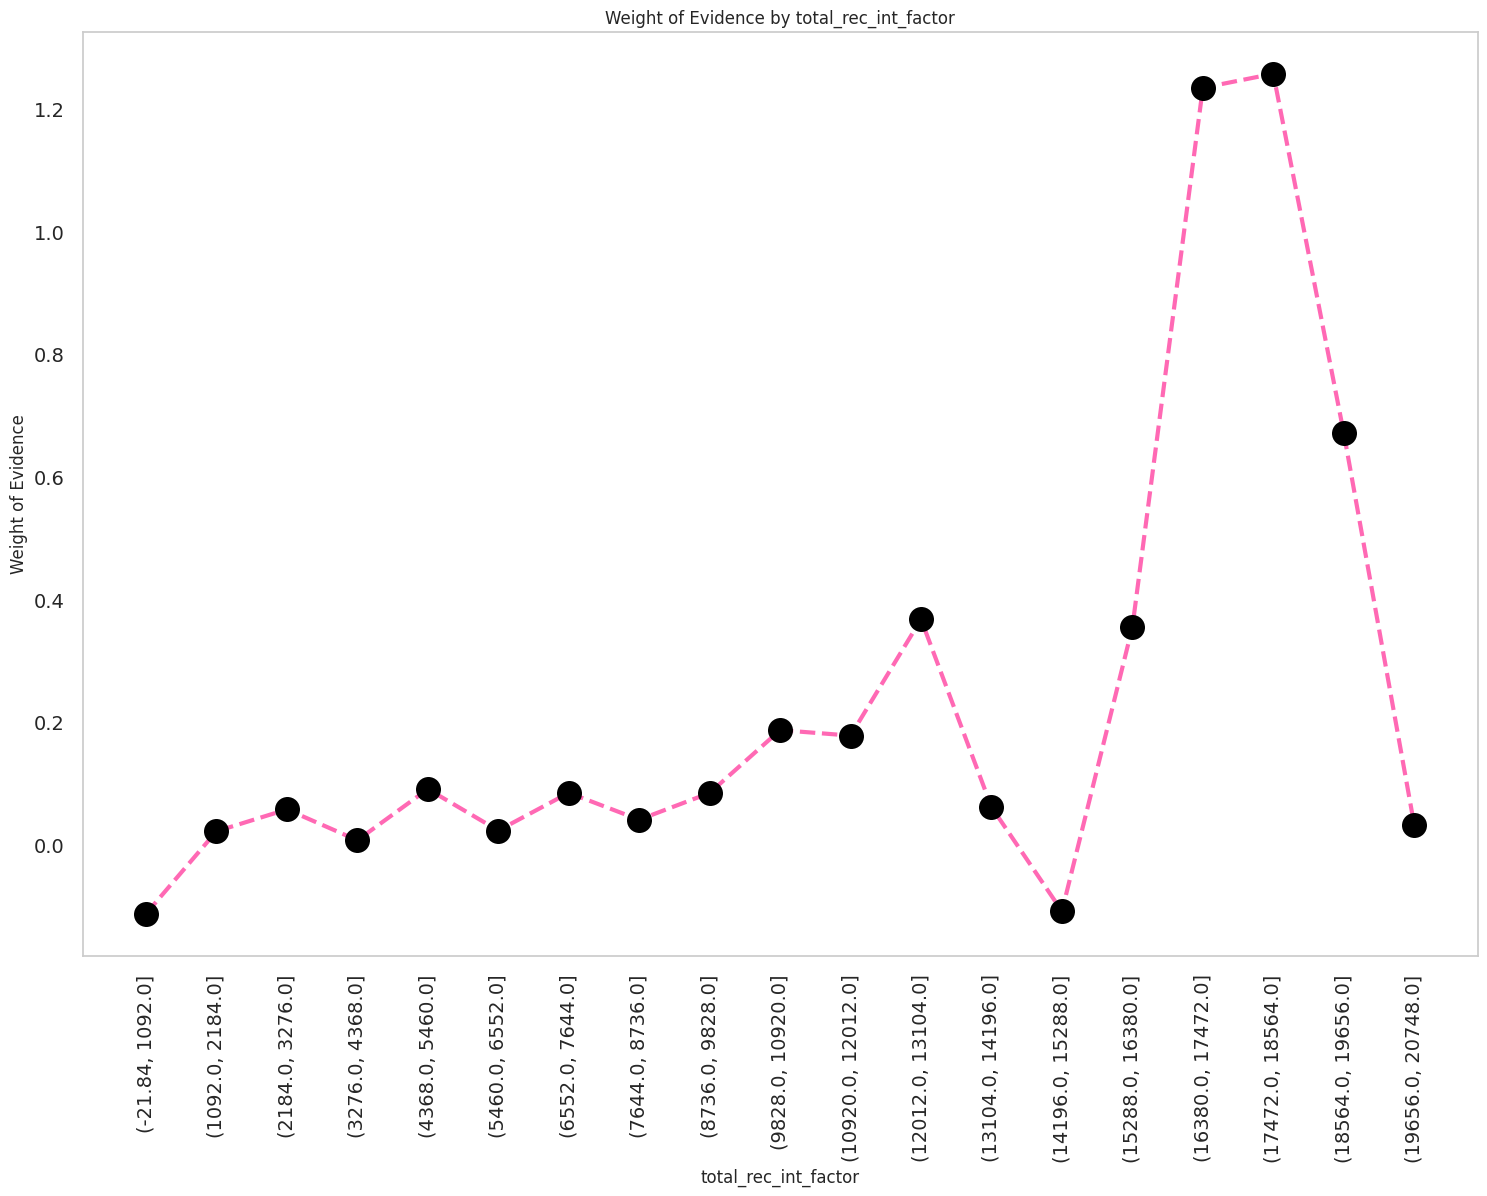

In [149]:
X['total_rec_int_factor'] = pd.cut(X['total_rec_int'], 20)
rec_int_df = woe_continous(X, 'total_rec_int_factor', y)
plot_by_woe(rec_int_df, 90)

## 5. Analyzing toal revolving_high_limit variable

In [150]:
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
revol_hi_df = woe_continous(X, 'total_rev_hi_lim_factor', y)
# plot_by_woe(revol_hi_df, 90)

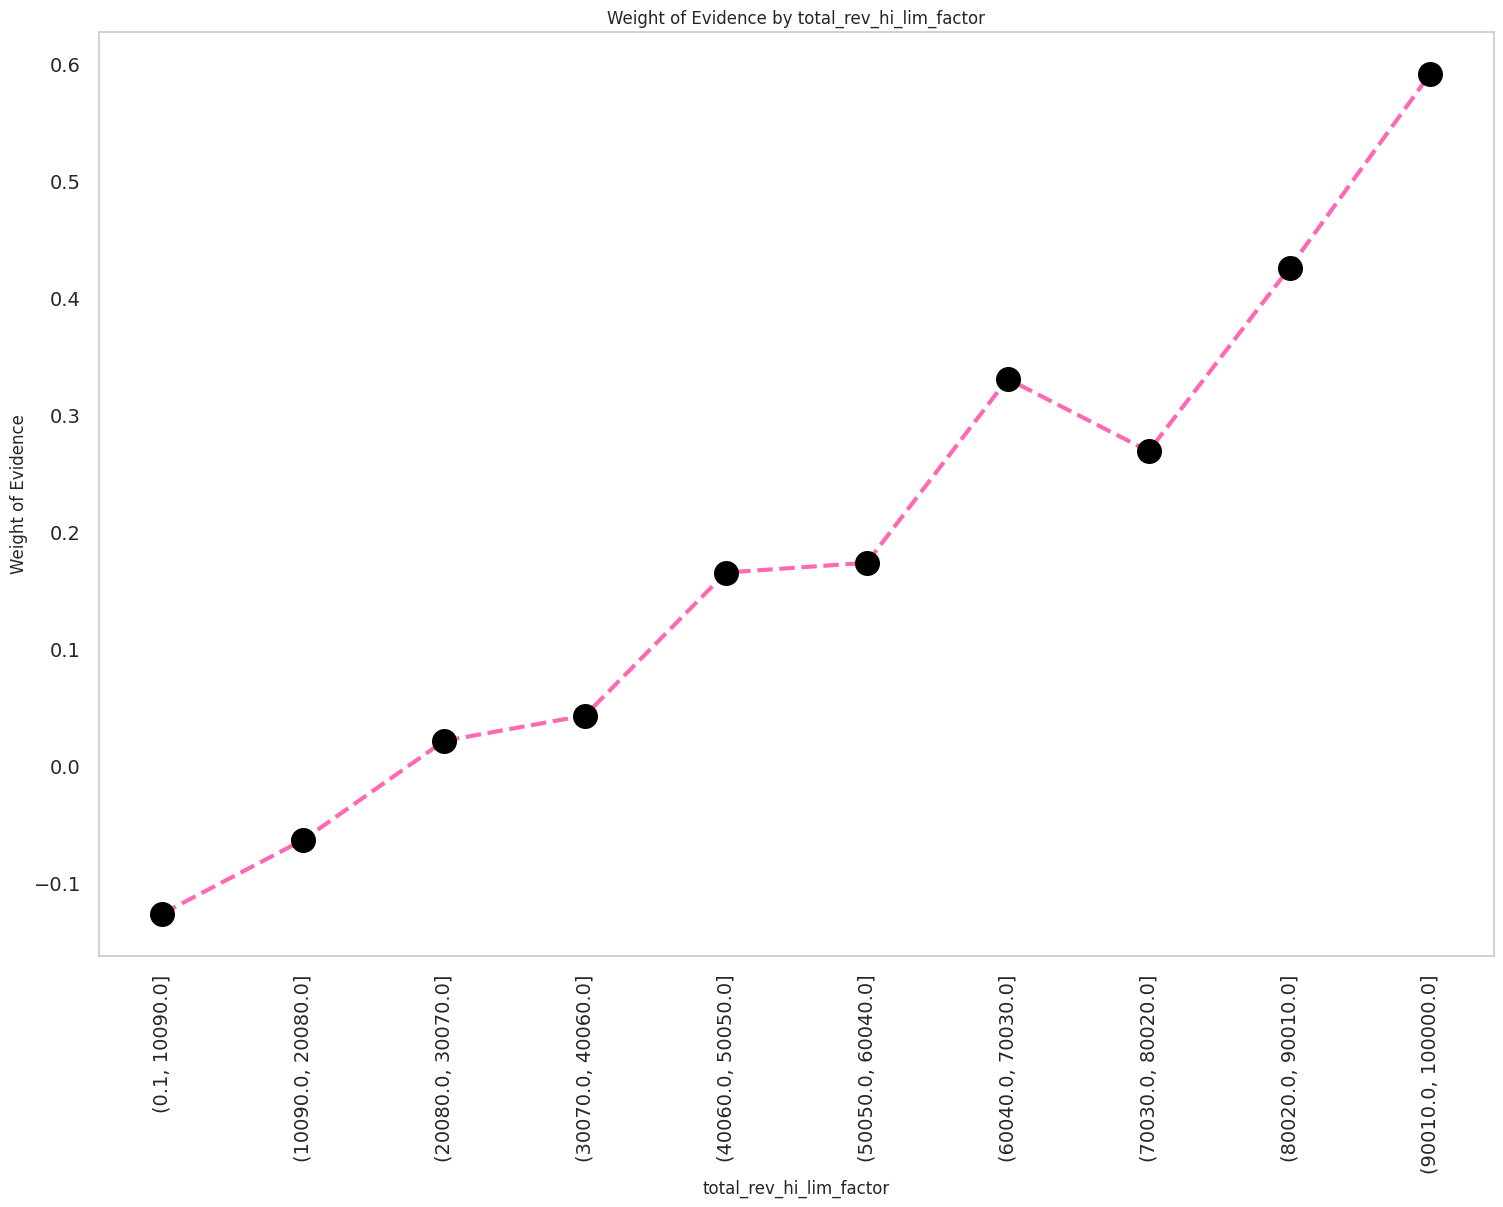

In [151]:
# analyzing below 100000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# select only the relevant index in the target col
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

## 6. Analyzing total_payment variable

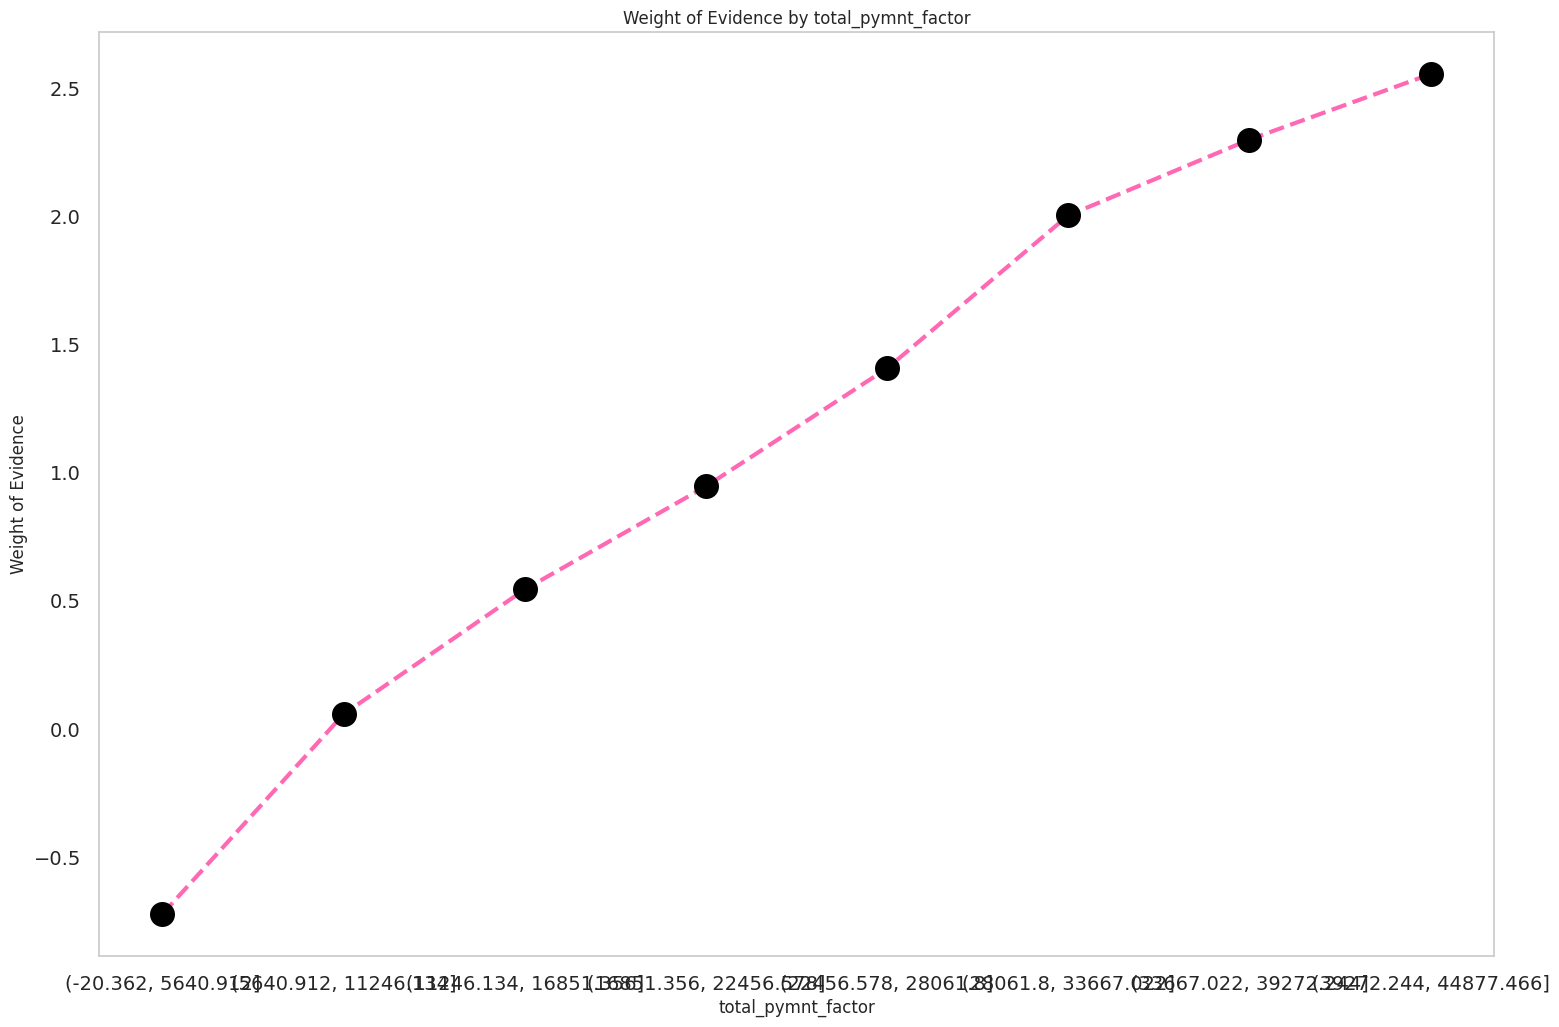

In [152]:
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
total_pym_df = woe_continous(X, 'total_pymnt_factor', y)
plot_by_woe(total_pym_df)

## 7. Analyzing dti variable

"dti" is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

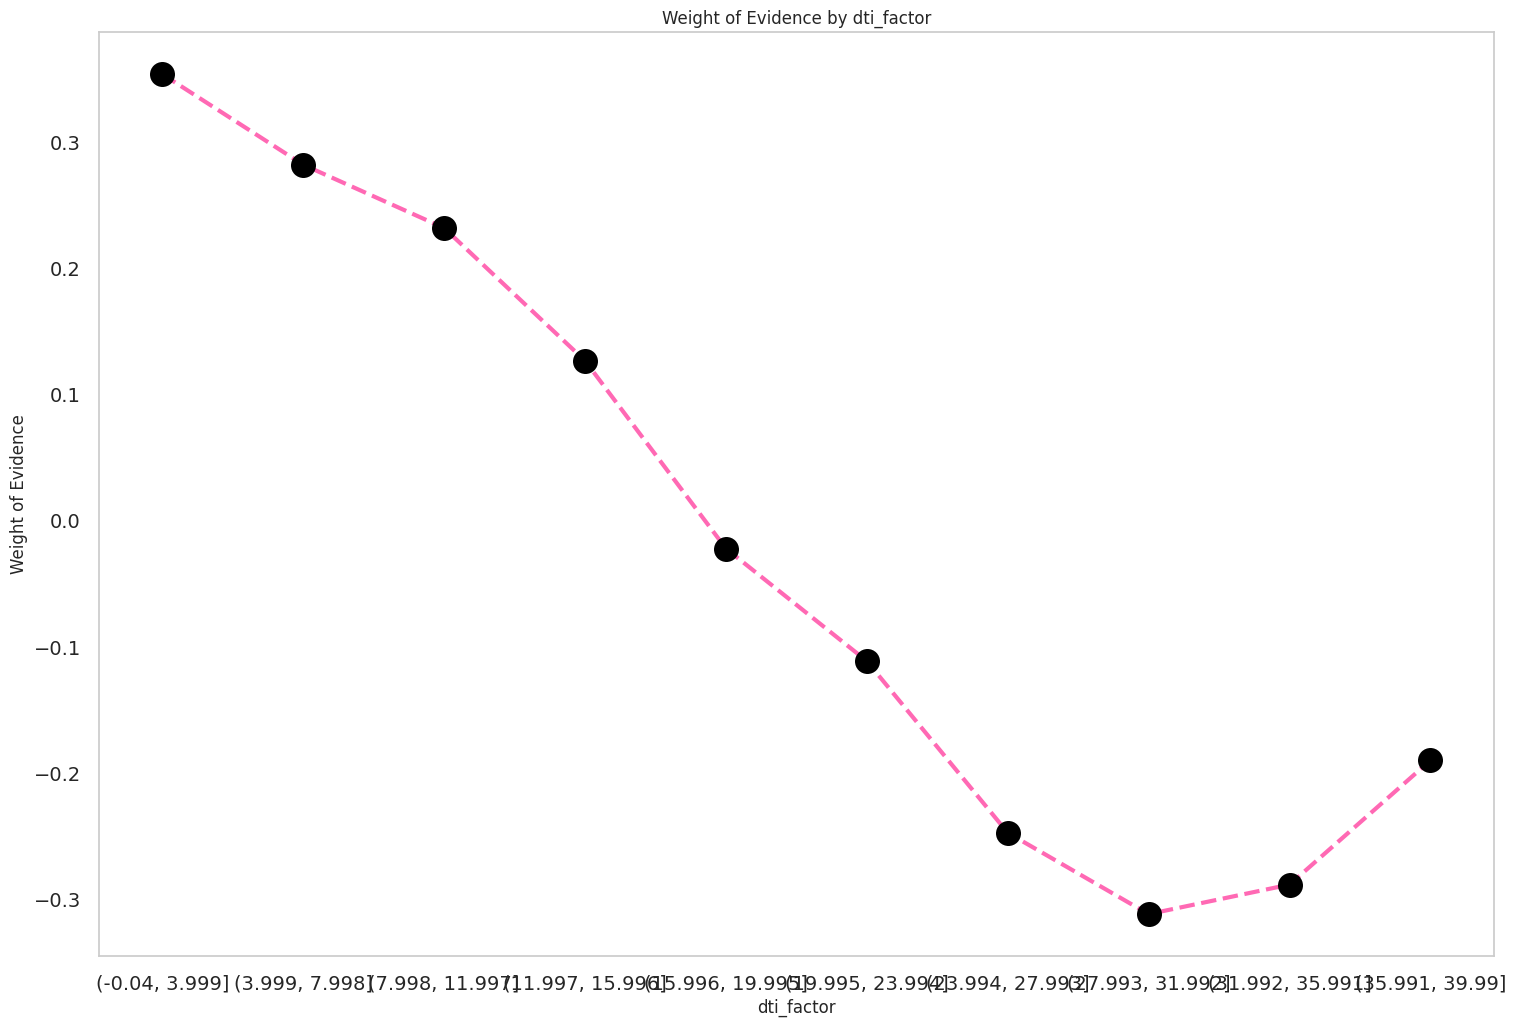

In [153]:
X['dti_factor'] = pd.cut(X['dti'], 10)
dti_df = woe_continous(X, 'dti_factor', y)
plot_by_woe(dti_df)

The following categories will be combined:

(27.993, 31.992), (31.992, 35.991), (35.991, 39.99)

## 8. Analyzing annual_income variable

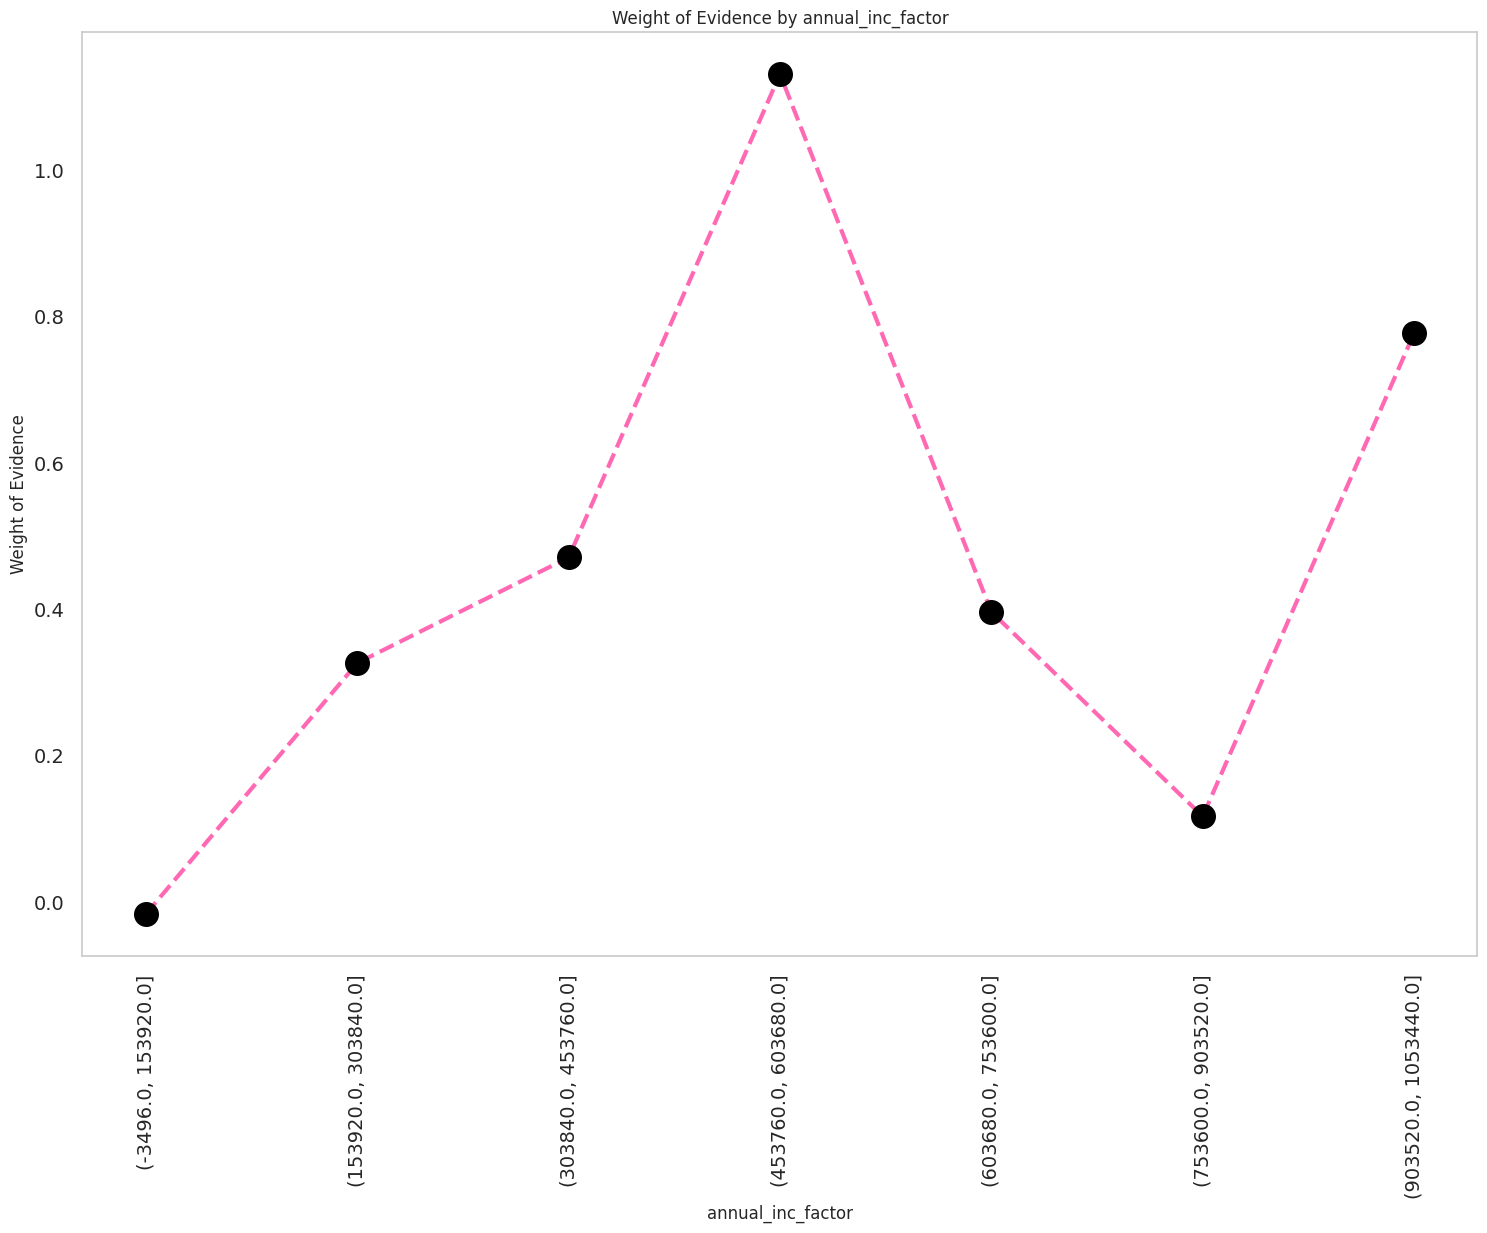

In [154]:
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
ann_inc_df = woe_continous(X, 'annual_inc_factor', y)
plot_by_woe(ann_inc_df, 90)


We will seperate this variable into people with higher and lower incomes. From the WoE table, we observe, when annual income increases, the the number of observations decreases. This is because only a few people earn high income. We will use a new variable for people with income above 150000 dollars. And also, analyze individuals with income below 150000 dollars.

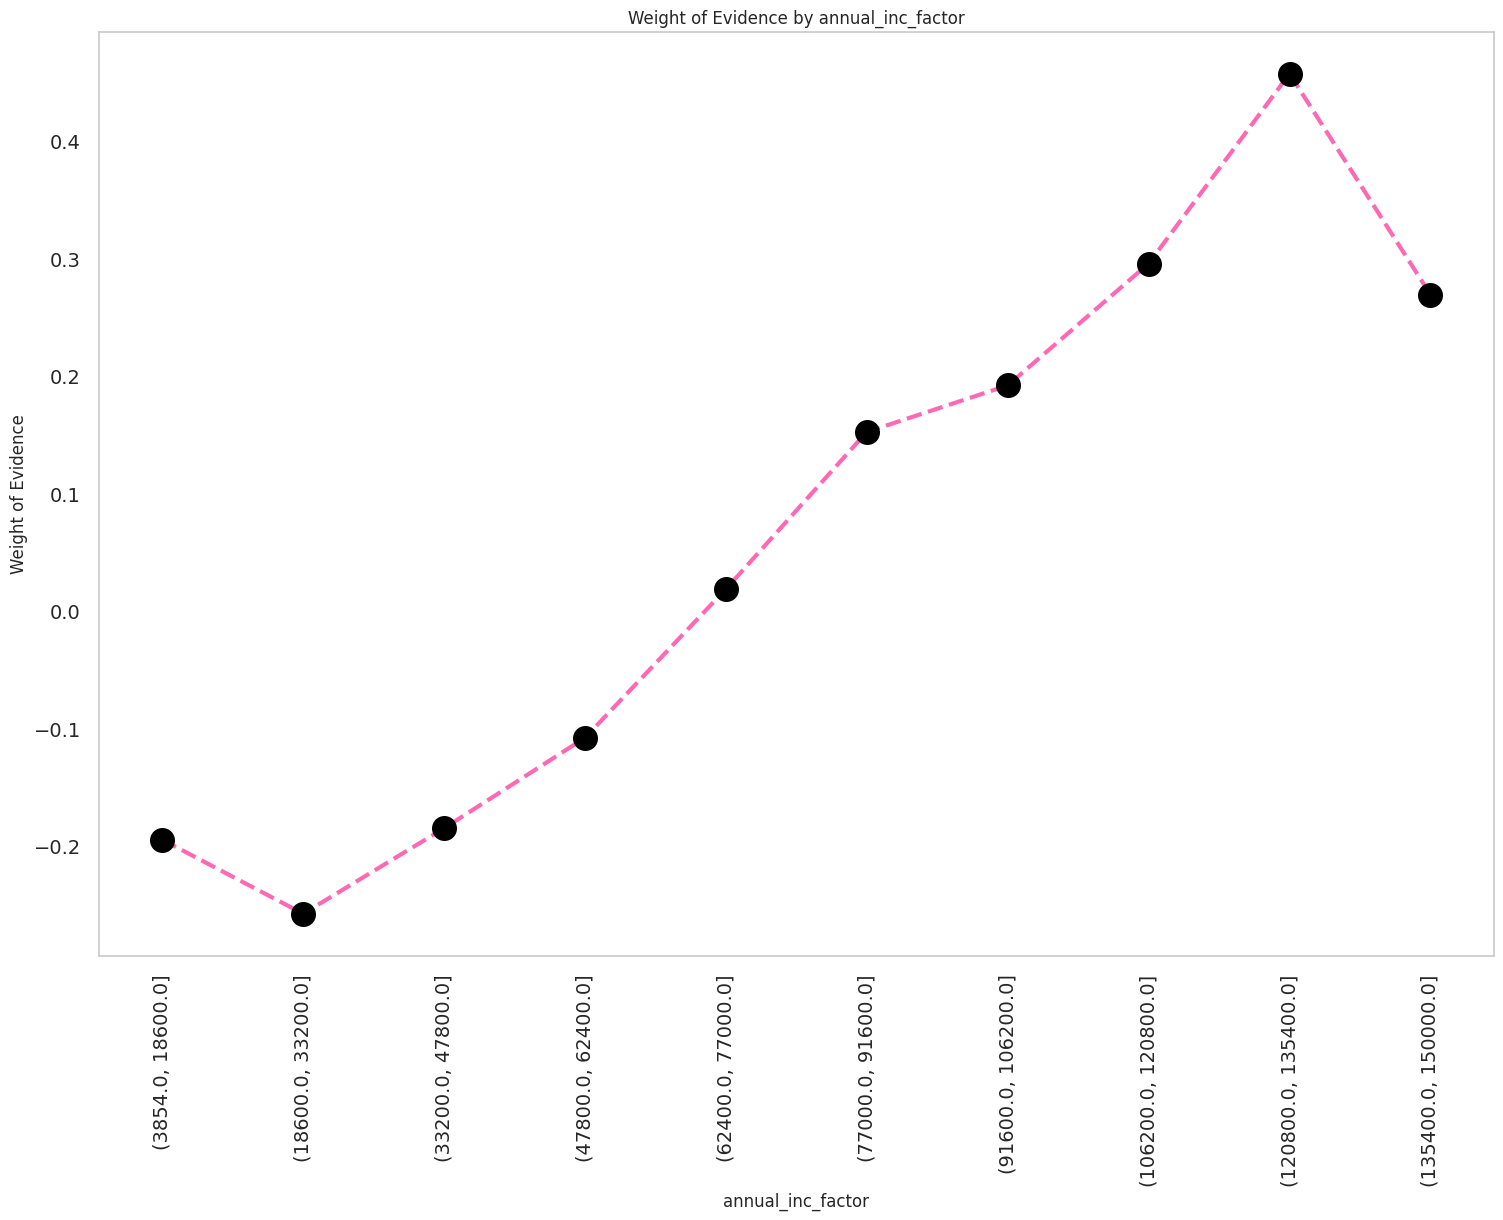

In [155]:
# analyzing income below 150000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# fine-classing
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# select only the relevant index in the target col
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

From the graph, we will combine the follwing categories based on WoE and number of observations as follows:

*   (<=32000)
*   (>32000 <= 50000)
*   (>50000 <= 60000)
*   (>60000 <=75000)
*   (>75000 <=90000)
*   (>90000 <=120000)
*   (>120000 <=135000)
*   (>135000 <=150000)
*   (>150000)

## 9. Analyzing inq_last_6mths variable

inq_last_6mths denote the number of inquiries in last 6 months

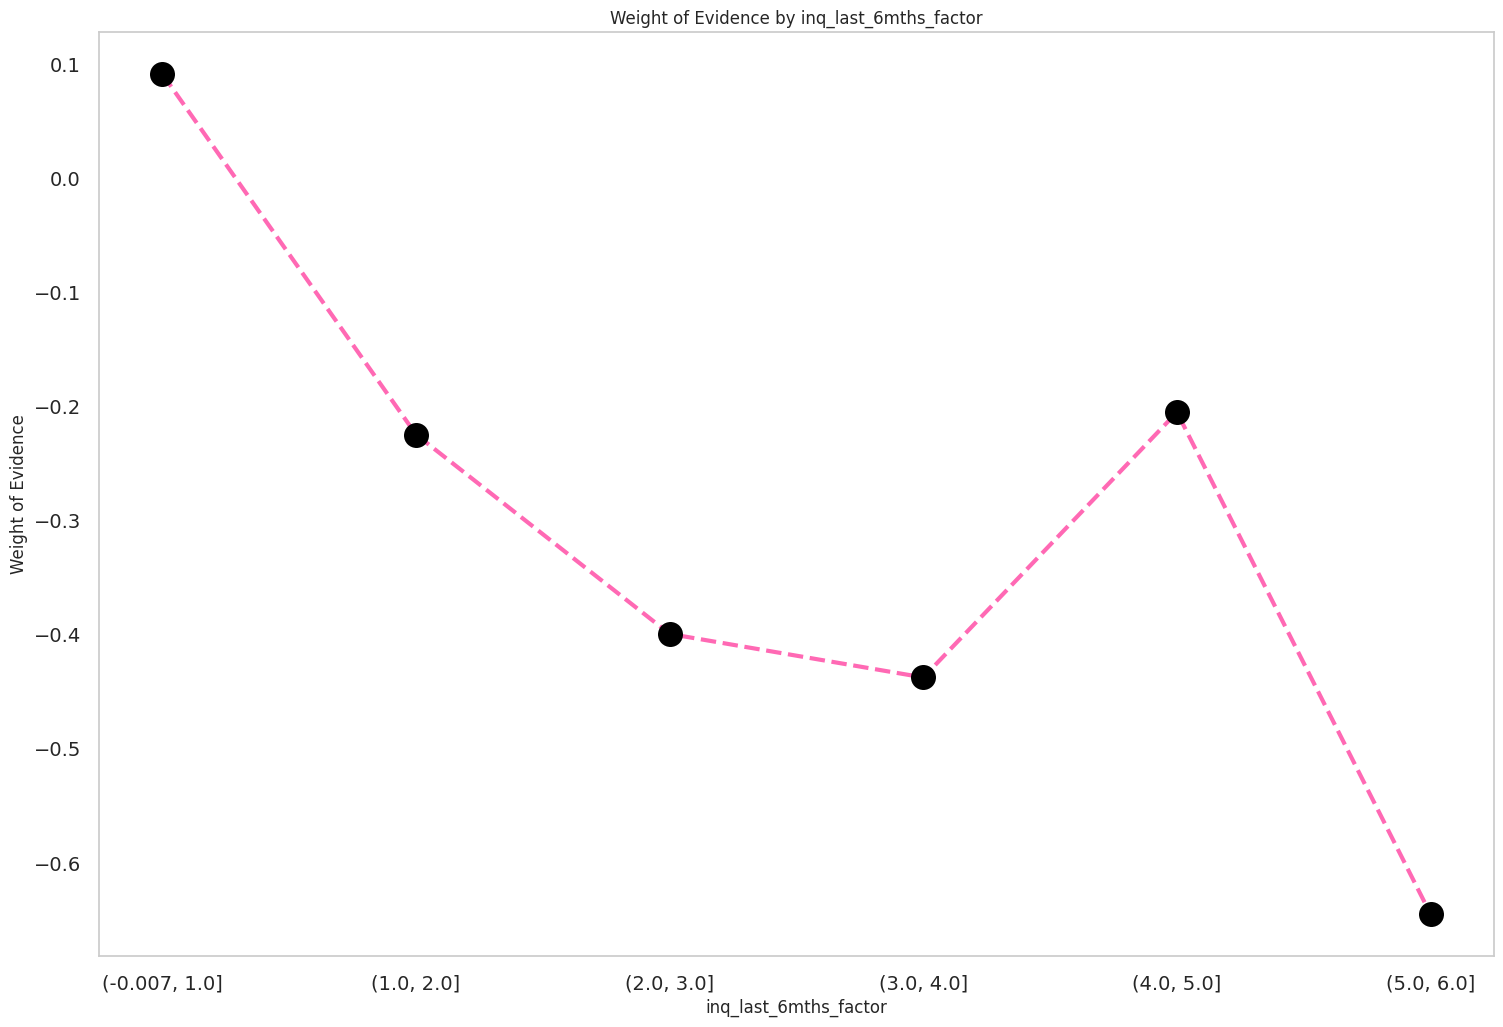

In [156]:
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
inq_fact_df = woe_continous(X, 'inq_last_6mths_factor', y)
plot_by_woe(inq_fact_df)

The follwing categories will be created

*   <1 months,
*   1-2,
*   2-4,
*   4-7

## 10. Analyzing total current balance variable

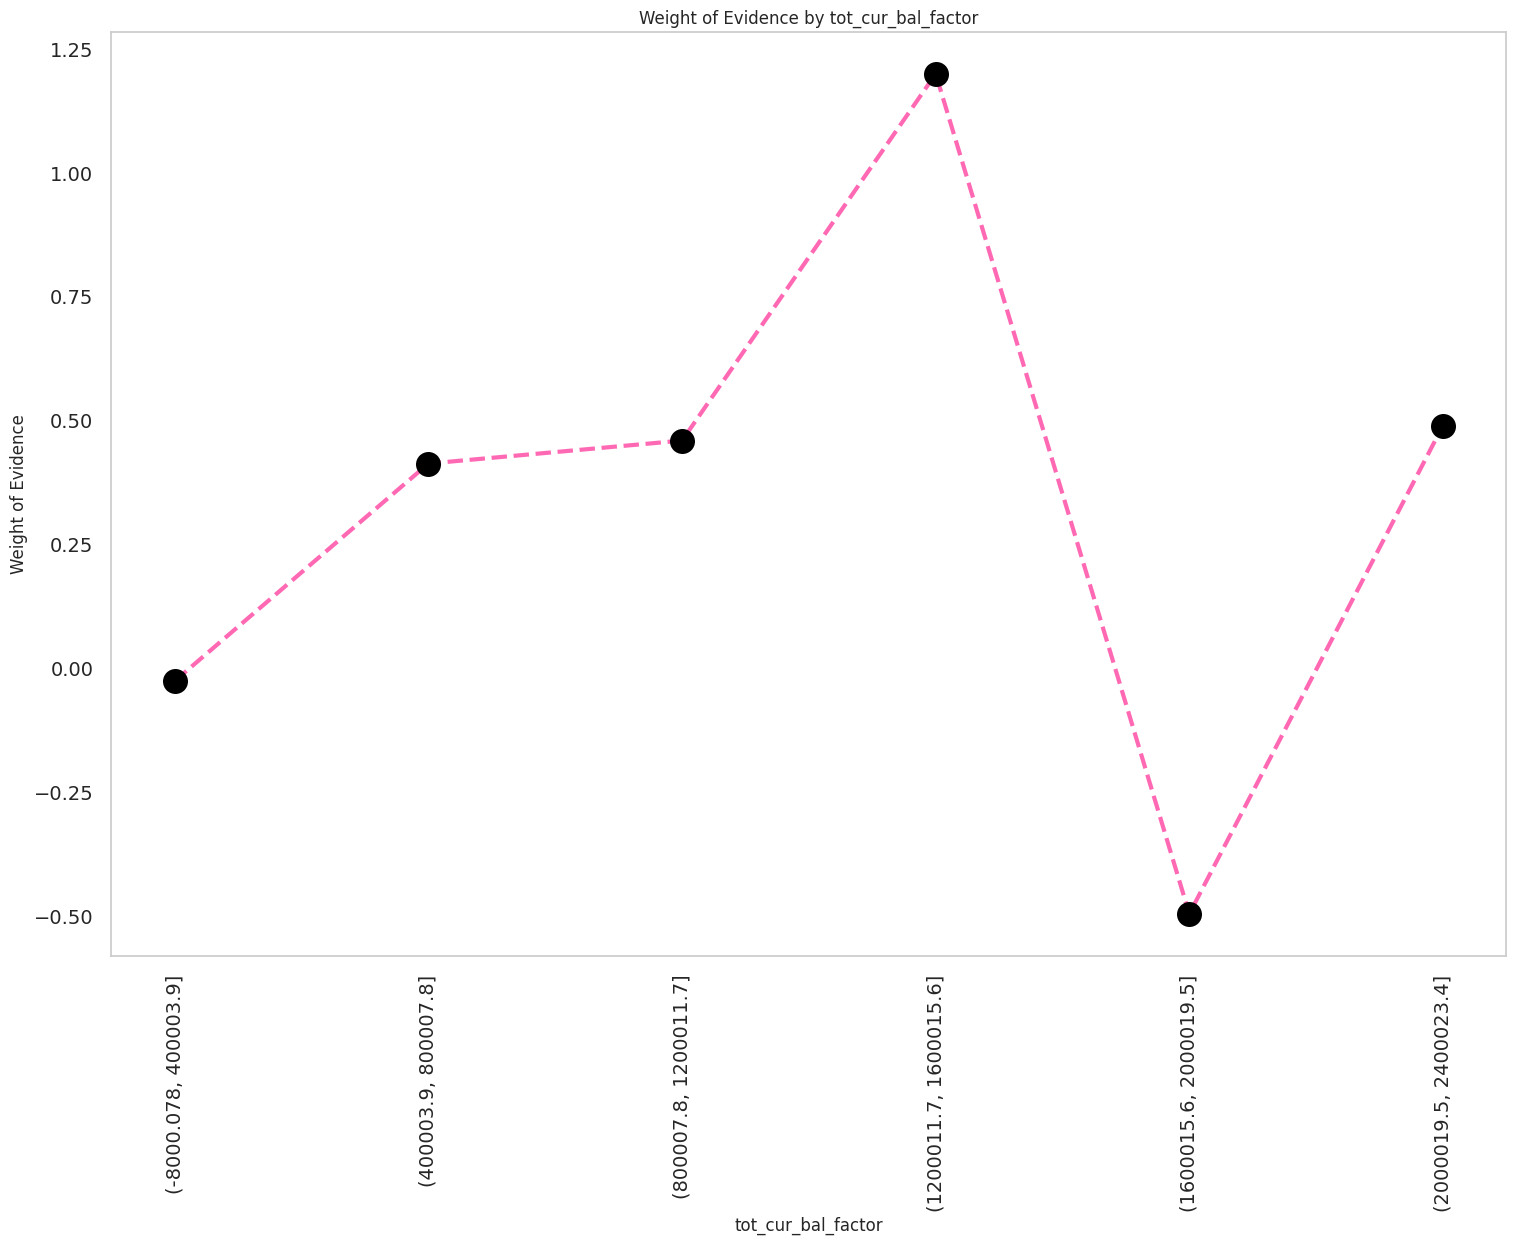

In [157]:
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
curr_bal_df = woe_continous(X, 'tot_cur_bal_factor', y)
plot_by_woe(curr_bal_df, 90)

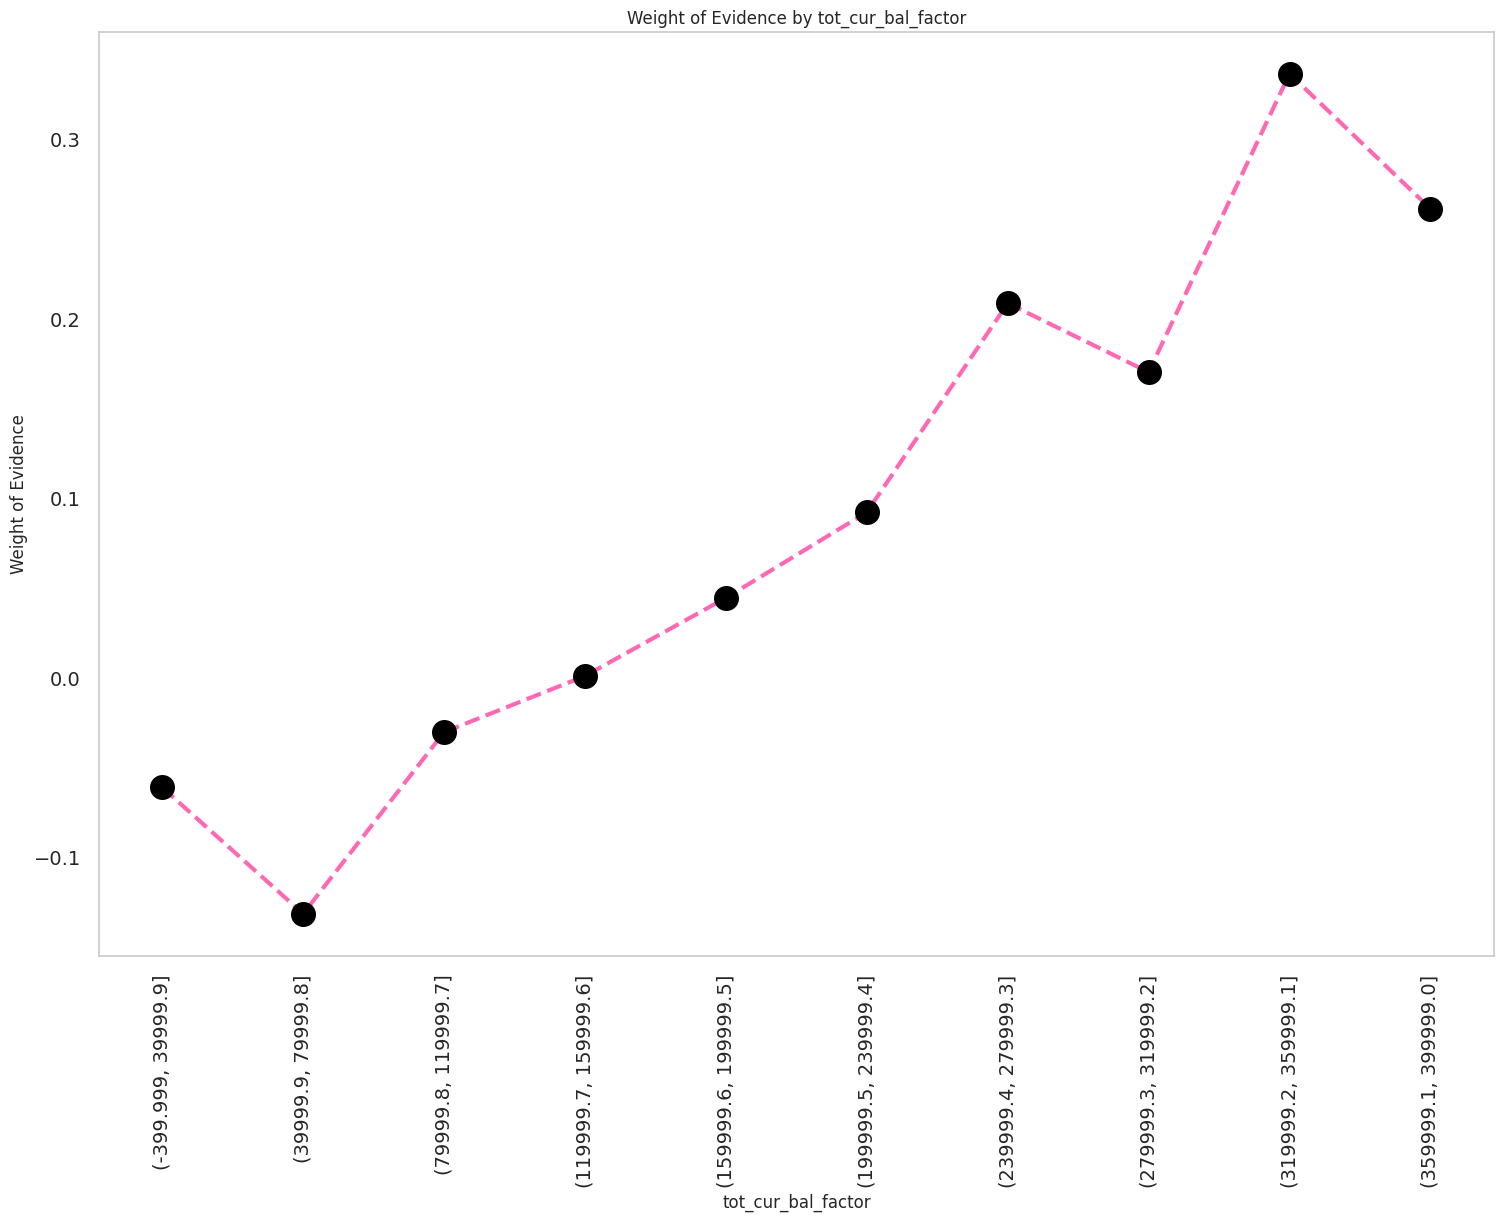

In [158]:
# analyzing current balance  below 400000
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# select only the relevant index in the target column
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

the following variables will be created:

* <40000,
* 40000-80000,
* 80000-120000,
* 120000-160000,
* 160000-200000,
* 200000-240000,
* 240000-320000,
* 320000-400000

## 11. Analyzing months since credit pulled variable

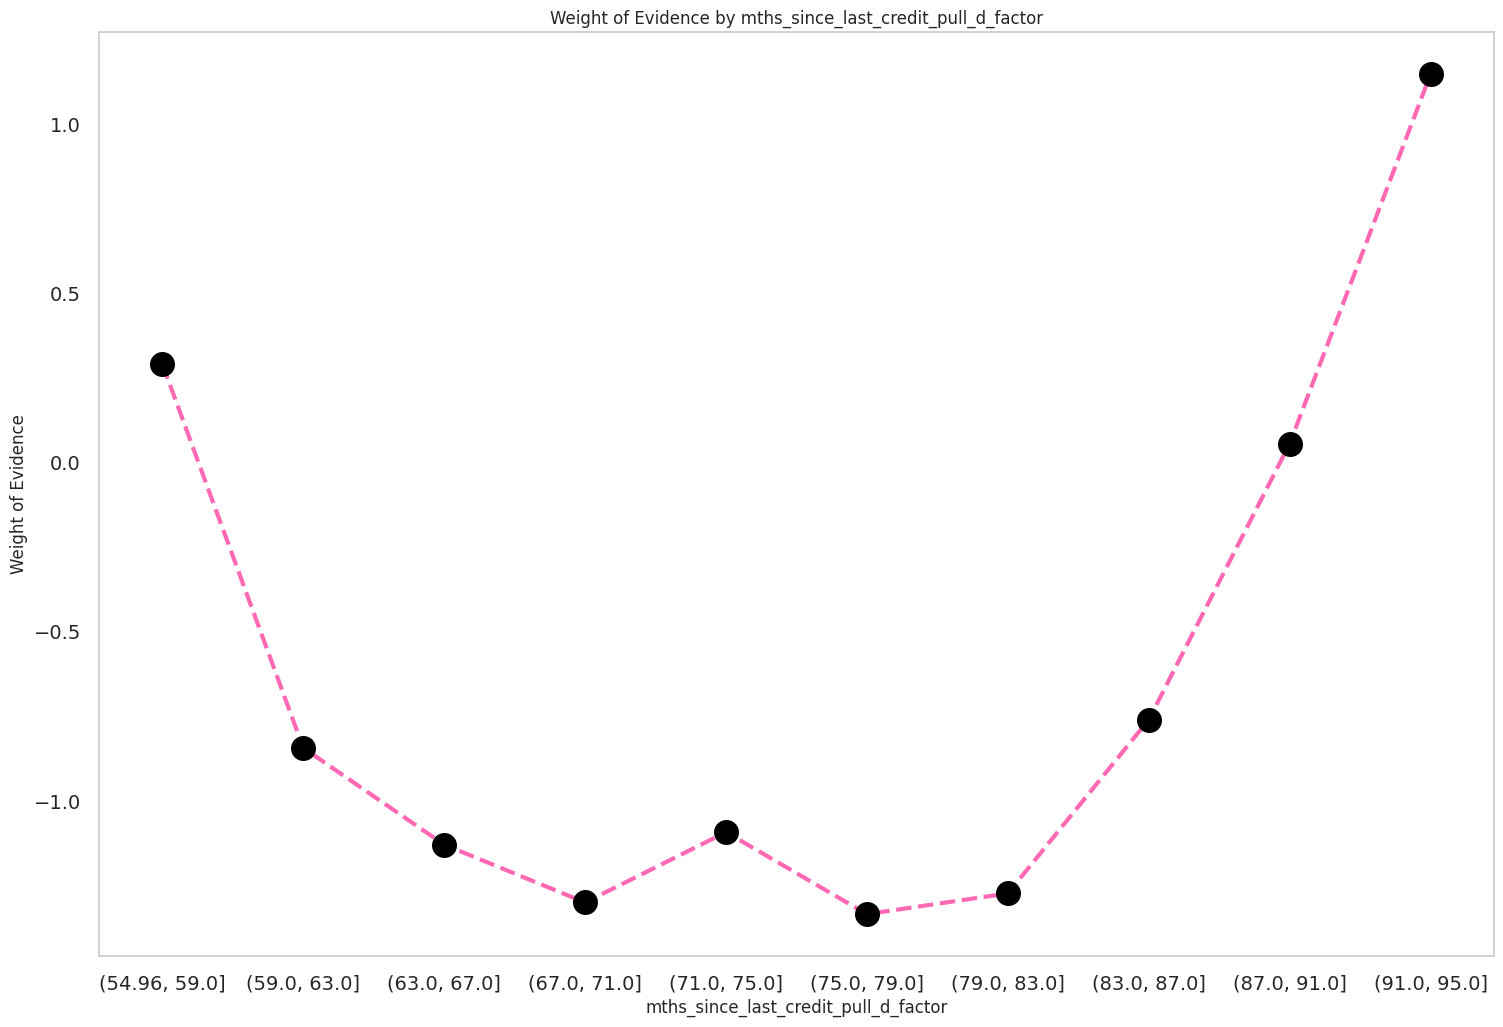

In [159]:
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
mths_cr_pull_df = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y)
plot_by_woe(mths_cr_pull_df)

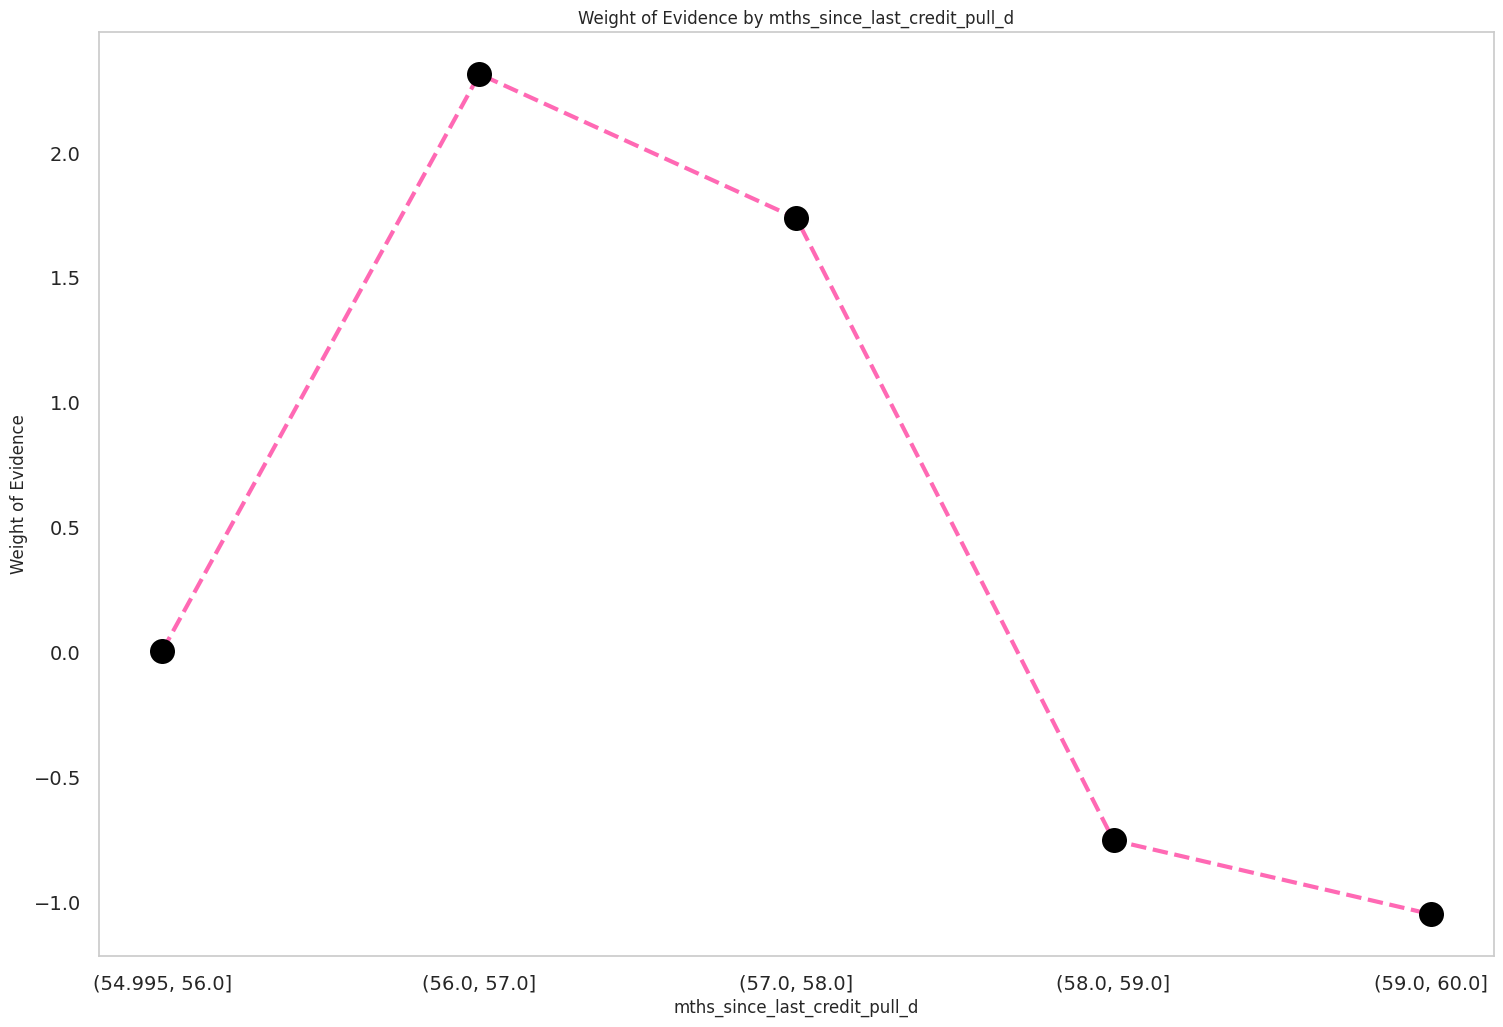

In [160]:
# analyzing mths_since_credit_pull  below 60
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 60].copy()
# fine-classing
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)
# select only the relevant index in the target column
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y[X_train_prepr_temp.index])
plot_by_woe(df_temp)

The following categories will be grouped together:

* 54-65,
* 65-76,
* greater than 76

## 12. Analyzing out_prncp_factor variable

out_prncp_factor denotes remaining outstanding principal for total amount funded

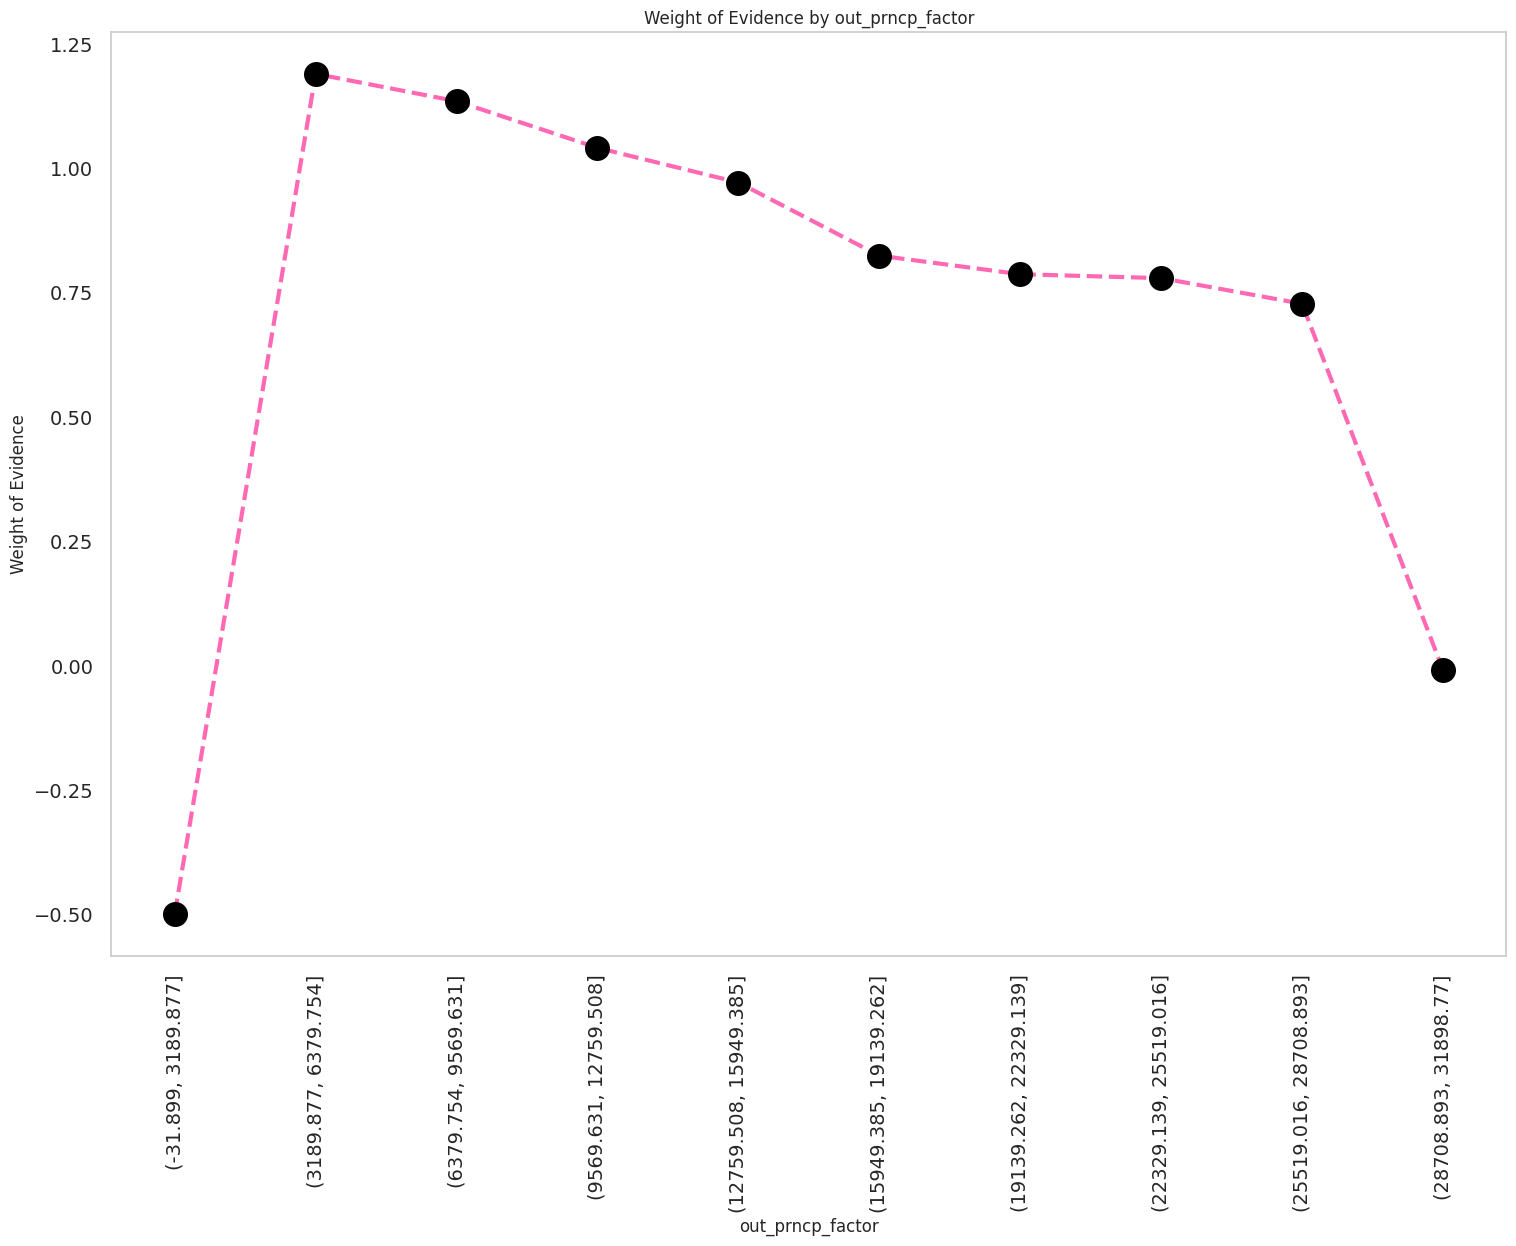

In [161]:
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
out_df = woe_continous(X, 'out_prncp_factor', y)
plot_by_woe(out_df, 90)

## 13. Analyzing months_since_issue_date variable

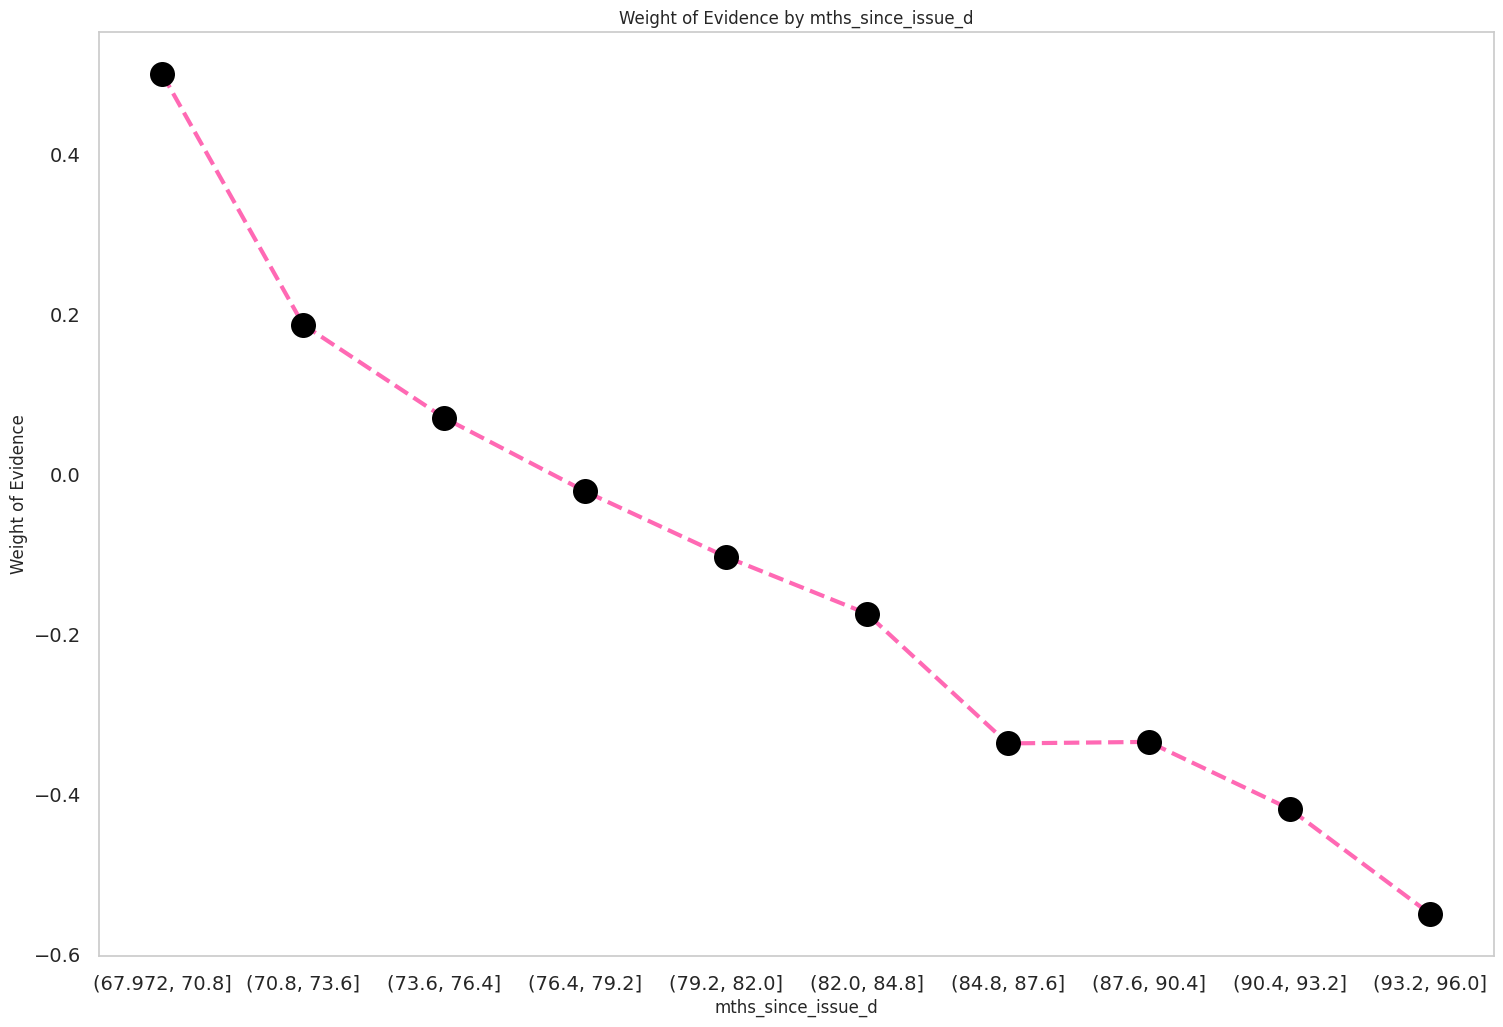

In [162]:
X['mths_since_issue_d'] = pd.cut(X['mths_since_issue_d'], 10)
iss_df = woe_continous(X, 'mths_since_issue_d', y)
plot_by_woe(iss_df)

# Create New Features Based on WoE

In [163]:
# grade
new_df = preprocess_df.loc[:, 'grade:A':'grade:G']

# home_ownership 
new_df['home_ownership:OWN'] = preprocess_df.loc[:, 'home_ownership:OWN']
new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_df['home_ownership:OTHER'], 
                                                    preprocess_df['home_ownership:NONE'],
                                                    preprocess_df['home_ownership:RENT'], 
                                                    preprocess_df['home_ownership:ANY']])
new_df['home_ownership:MORTGAGE'] = preprocess_df.loc[:, 'home_ownership:MORTGAGE']

# verification status
new_df['verification_status:NOT_VERIFIED'] = preprocess_df.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_df.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_df.loc[:, 'verification_status:Verified']

# purpose of loan
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_df['purpose:small_business'],  preprocess_df['purpose:renewable_energy'], preprocess_df['purpose:moving']])
new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_df['purpose:other'], preprocess_df['purpose:house'], preprocess_df['purpose:medical']])
new_df['purpose:WEDDING_VACATION'] = sum([preprocess_df['purpose:wedding'], preprocess_df['purpose:vacation']])
new_df['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_df['purpose:home_improvement'], preprocess_df['purpose:major_purchase']])
new_df['purpose:CAR_CREDIT_CARD'] = sum([preprocess_df['purpose:car'], preprocess_df['purpose:credit_card']])


# addr state
new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_df['addr_state:IA'],preprocess_df['addr_state:NV'],
                                             preprocess_df['addr_state:HI'],preprocess_df['addr_state:FL'],
                                             preprocess_df['addr_state:AL']])
new_df['addr_state:NY'] = preprocess_df.loc[:, 'addr_state:NY']
new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_df['addr_state:LA'],preprocess_df['addr_state:NM'],preprocess_df['addr_state:OK'],
                                                    preprocess_df['addr_state:NC'],preprocess_df['addr_state:MO'],preprocess_df['addr_state:MD'], preprocess_df['addr_state:NJ'],
                                                    preprocess_df['addr_state:VA']])
new_df['addr_state:CA'] = preprocess_df.loc[:,'addr_state:CA']
new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_df['addr_state:AZ'],preprocess_df['addr_state:MI'],preprocess_df['addr_state:UT'],
preprocess_df['addr_state:TN'],preprocess_df['addr_state:AR'],preprocess_df['addr_state:PA']])

new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_df['addr_state:RI'],preprocess_df['addr_state:OH'],preprocess_df['addr_state:KY'],
                                                   preprocess_df['addr_state:DE'],preprocess_df['addr_state:MN'],preprocess_df['addr_state:SD'],preprocess_df['addr_state:MA'],
                                                   preprocess_df['addr_state:IN']])

new_df['addr_state:GA_WA'] = sum([preprocess_df['addr_state:GA'], preprocess_df['addr_state:WA']])
new_df['addr_state:WI_OR'] = sum([preprocess_df['addr_state:WI'], preprocess_df['addr_state:OR']])
new_df['addr_state:TX'] = preprocess_df.loc[:,'addr_state:TX']
new_df['addr_state:IL_CT_MT'] =sum([preprocess_df['addr_state:IL'],preprocess_df['addr_state:CT'],preprocess_df['addr_state:MT']])
new_df['addr_state:CO_SC'] = sum([preprocess_df['addr_state:CO'], preprocess_df['addr_state:SC']])
new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_df['addr_state:KS'],preprocess_df['addr_state:VT'],preprocess_df['addr_state:AK'],
                                           preprocess_df['addr_state:MS']])
new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_df['addr_state:NH'],preprocess_df['addr_state:WV'],preprocess_df['addr_state:WY'],
                                           preprocess_df['addr_state:DC']])
# initial_list_status
new_df['initial_list_status:F'] = preprocess_df.loc[:, 'initial_list_status:f']
new_df['initial_list_status:W'] = preprocess_df.loc[:, 'initial_list_status:w']

# term 
new_df['term:36'] = np.where((preprocess_df['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_df['term']==60), 1,0)

# total_rec_int 
new_df['total_rec_int:<1000'] = np.where((preprocess_df['total_rec_int']<=1000), 1,0)
new_df['total_rec_int:1000-2000'] = np.where((preprocess_df['total_rec_int']>1000) &(preprocess_df['total_rec_int']<=2000), 1,0)
new_df['total_rec_int:2000-9000'] = np.where((preprocess_df['total_rec_int']>2000) &(preprocess_df['total_rec_int']<=9000), 1,0)
new_df['total_rec_int:>9000'] = np.where((preprocess_df['total_rec_int']>9000), 1,0)


# total_revol_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_df['total_rev_hi_lim']<=10000),1,0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_df['total_rev_hi_lim']>10000)&(preprocess_df['total_rev_hi_lim']<=20000),1,0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_df['total_rev_hi_lim']>20000)&(preprocess_df['total_rev_hi_lim']<=40000),1,0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_df['total_rev_hi_lim']>40000)&(preprocess_df['total_rev_hi_lim']<=60000),1,0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_df['total_rev_hi_lim']>60000)&(preprocess_df['total_rev_hi_lim']<=80000),1,0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_df['total_rev_hi_lim']>80000)&(preprocess_df['total_rev_hi_lim']<=100000),1,0)
new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_df['total_rev_hi_lim']>100000),1,0)


# total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_df['total_pymnt']<=5000), 1,0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_df['total_pymnt']>5000)&(preprocess_df['total_pymnt']<=11000),1,0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_df['total_pymnt']>11000)&(preprocess_df['total_pymnt']<=16000),1,0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_df['total_pymnt']>16000)&(preprocess_df['total_pymnt']<=22000),1,0)
new_df['total_pymnt:>22000'] = np.where((preprocess_df['total_pymnt']<=5000), 1,0)

# int_Rate
new_df['int_rate:<7.484'] = np.where((preprocess_df['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_df['int_rate'] > 7.484) & (preprocess_df['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_df['int_rate'] > 9.548) & (preprocess_df['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_df['int_rate'] > 11.612) & (preprocess_df['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_df['int_rate'] > 13.676) & (preprocess_df['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_df['int_rate'] > 15.74) & (preprocess_df['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_df['int_rate'] > 17.804) & (preprocess_df['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_df['int_rate'] > 19.868) & (preprocess_df['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_df['int_rate'] > 21.932) & (preprocess_df['int_rate'] <= 26.06), 1, 0)


# dti 
new_df['dti:<4'] = np.where((preprocess_df['dti'] <=4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_df['dti'] > 4) & (preprocess_df['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_df['dti'] > 8) & (preprocess_df['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_df['dti'] > 12) & (preprocess_df['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_df['dti'] > 16) & (preprocess_df['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_df['dti'] > 20) & (preprocess_df['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_df['dti'] > 23) & (preprocess_df['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_df['dti'] > 27) & (preprocess_df['dti'] <= 40), 1, 0)

# annual income 
new_df['annual_inc:<32000'] = np.where((preprocess_df['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_df['annual_inc'] > 32000) & (preprocess_df['annual_inc'] <= 50000),1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_df['annual_inc'] > 32000) & (preprocess_df['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_df['annual_inc'] > 50000) & (preprocess_df['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_df['annual_inc'] > 60000) & (preprocess_df['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_df['annual_inc'] > 75000) & (preprocess_df['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_df['annual_inc'] > 90000) & (preprocess_df['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_df['annual_inc'] > 120000) & (preprocess_df['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_df['annual_inc'] > 135000) & (preprocess_df['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_df['annual_inc'] > 150000), 1, 0)

# inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_df['inq_last_6mths'] <=1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_df['inq_last_6mths'] >1)& (preprocess_df['inq_last_6mths']<=2),  1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_df['inq_last_6mths'] >2)& (preprocess_df['inq_last_6mths']<=4),  1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_df['inq_last_6mths'] >4)& (preprocess_df['inq_last_6mths']<=7),  1, 0)

# tot_cur_balance
new_df['tot_cur_bal:<40000'] = np.where((preprocess_df['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_df['tot_cur_bal'] > 40000) & (preprocess_df['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_df['tot_cur_bal'] > 120000) & (preprocess_df['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_df['tot_cur_bal'] > 120000) & (preprocess_df['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_df['tot_cur_bal'] > 160000) & (preprocess_df['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_df['tot_cur_bal'] > 200000) & (preprocess_df['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_df['tot_cur_bal'] > 240000) & (preprocess_df['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_df['tot_cur_bal'] > 320000) & (preprocess_df['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_df['tot_cur_bal'] > 400000), 1, 0)

# mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_df['mths_since_last_credit_pull_d']<=65), 1,0)
new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_df['mths_since_last_credit_pull_d']>65)&(preprocess_df['mths_since_last_credit_pull_d']<=76),1,0)
new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_df['mths_since_last_credit_pull_d']>76), 1,0)

# mths_since_issue_d_factor
new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_df['mths_since_issue_d']<=70.8), 1,0)
new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_df['mths_since_issue_d'] >70.8) & (preprocess_df['mths_since_issue_d']<=73.6), 1,0)
new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_df['mths_since_issue_d']>70.8) & (preprocess_df['mths_since_issue_d']<=76.4), 1,0)
new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_df['mths_since_issue_d'] >76.4) & (preprocess_df['mths_since_issue_d']<=79.2), 1,0)
new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_df['mths_since_issue_d'] >79.2) & (preprocess_df['mths_since_issue_d']<=82), 1,0)
new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_df['mths_since_issue_d'] >82) & (preprocess_df['mths_since_issue_d']<=84), 1,0)
new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_df['mths_since_issue_d'] >84) & (preprocess_df['mths_since_issue_d']<=90.4), 1,0)
new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_df['mths_since_issue_d'] >90.4) & (preprocess_df['mths_since_issue_d']<=96), 1,0)

new_df['out_prncp:<3000'] = np.where((preprocess_df['out_prncp']<=3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_df['out_prncp']>3000)&(preprocess_df['out_prncp']<=6000), 1,0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_df['out_prncp']>6000)&(preprocess_df['out_prncp']<=10000), 1,0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_df['out_prncp']>10000)&(preprocess_df['out_prncp']<=12000), 1,0)
new_df['out_prncp:>12000'] = np.where((preprocess_df['out_prncp']>12000), 1,0)

new_df['def_vs_nondef'] = preprocess_df.loc[:, 'def_vs_nondef']

In [164]:
# displaying first 10 rows of new_df
pd.options.display.max_columns = None
new_df.head(10)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
42537        1        0        0        0        0        0        0   
42538        0        1        0        0        0        0        0   
42539        1        0        0        0        0        0        0   
42541        0        1        0        0        0        0        0   
42543        0        1        0        0        0        0        0   
42544        0        1        0        0        0        0        0   
42547        0        0        0        1        0        0        0   
42548        0        0        1        0        0        0        0   
42555        0        1        0        0        0        0        0   
42558        0        0        0        1        0        0        0   

       home_ownership:OWN  home_ownership:OTHER_NONE_RENT_ANY  \
42537                   0                                   0   
42538                   0                                   1   
42539                   0                                   0   
42541                   0                                   1   
42543                   0                                   0   
42544                   0                                   1   
42547                   0                                   0   
42548                   0                                   0   
42555                   0                                   1   
42558                   0                                   1   

       home_ownership:MORTGAGE  verification_status:NOT_VERIFIED  \
42537                        1                                 1   
42538                        0                                 0   
42539                        1                                 1   
42541                        0                                 1   
42543                        1                                 1   
42544                        0                                 0   
42547                        1                                 0   
42548                        1                                 1   
42555                        0                                 0   
42558                        0                                 1   

       verification_status:SOURCE_VERIFIED  verification_status:VERIFIED  \
42537                                    0                             0   
42538                                    1                             0   
42539                                    0                             0   
42541                                    0                             0   
42543                                    0                             0   
42544                                    0                             1   
42547                                    1                             0   
42548                                    0                             0   
42555                                    0                             1   
42558                                    0                             0   

       purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING  \
42537                                                  0            
42538                                                  0            
42539                                                  0            
42541                                                  0            
42543                                                  0            
42544                                                  0            
42547                                                  0            
42548                                                  0            
42555                                                  0            
42558                                                  0            

       purpose:OTHER_HOUSE_MEDICAL  purpose:WEDDING_VACATION  \
42537                            0                         0   
42538                   

In [165]:
new_df1 = new_df

Now we must remove 1 dummy variable for each original variable, otherwise we will get into the dummy variable trap. The dummy variables to be removed are those with the lowest WoE.

In [166]:
#dummy categories to drop
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY',
                  'total_rec_int:<1000',
                  'total_pymnt:<5000',
                  'total_rev_hi_lim:<10000',
                  'grade:G',
                  'verification_status:VERIFIED',
                  'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                  'addr_state:NE_IA_NV_HI_FL_AL',
                  'initial_list_status:F',
                  'term:60',
                  'mths_since_issue_d_:>90.4-96',
                  'int_rate:21.932-26.06',
                  'dti:27-40',
                  'annual_inc:<32000',
                  'inq_last_6mths:4-7',
                  'tot_cur_bal:<40000',
                  'mths_since_last_credit_pull_d:>76',
                  'out_prncp:>12000']
#col dropped
new_df.drop(columns=ref_categories, inplace=True, axis=1)

# Checking Class Imbalance in Fully Preprocessed Dataset

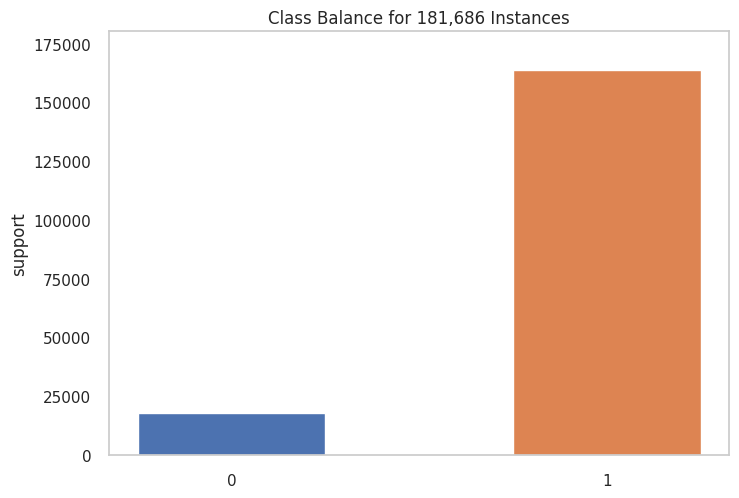

<Axes: title={'center': 'Class Balance for 181,686 Instances'}, ylabel='support'>

In [167]:
# check if class labels are balanced

from yellowbrick.target import ClassBalance
X= new_df.drop(columns='def_vs_nondef', axis=1)
y = new_df['def_vs_nondef']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

From the chart above, we see the individuals classified as bad borrowers have very few observations. This class imbalance can affect our model while training. To solve this problem, we will oversample the minority class.

# Splitting into Train and Test

In [168]:
# spliting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# checking  imbalance for training dataset
y_train.value_counts()

1    131019
0     14329
Name: def_vs_nondef, dtype: int64

# Oversampling Minority Class to Resolve Class Imbalance

In [169]:
# dealing with imbalanced data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)

# check value counts after oversampling
y_train_series.value_counts()

1    131019
0    131019
Name: def_vs_nondef, dtype: int64

# Building PD Model (White-Box)

In [170]:
# building logistic regression model
model = LogisticRegression()
model.fit(X_train_o, y_train_o)

LogisticRegression()

In [171]:
# predicting
y_preds = model.predict(X_test)

# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.28      0.77      0.41      3495
           1       0.97      0.79      0.87     32843

    accuracy                           0.79     36338
   macro avg       0.62      0.78      0.64     36338
weighted avg       0.90      0.79      0.83     36338



In [172]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

y_test_class_actual  y_hat_test_proba  y_hat_test
73600                     1          0.730072           1
124018                    1          0.276876           0
99846                     1          0.472812           0
258494                    1          0.305268           0
280146                    1          0.935269           1

# Assessing Discriminatory Power of the PD Model

## 1 A. ROC Curve

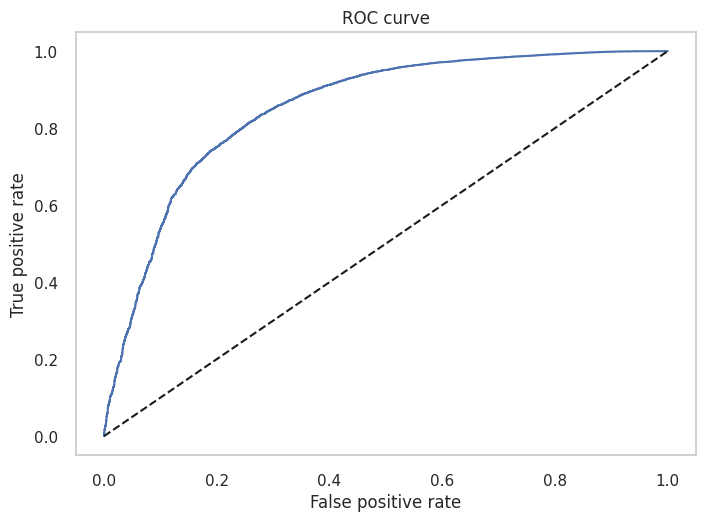

In [173]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

## 1 B. Area under ROC Curve

In [174]:
# area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.8515588077443225

## 2. Gini Index

In [175]:
Gini = AUROC * 2 - 1
Gini

0.7031176154886449

## 3A. Precision-Recall Curve

If you want to know the details what is meant by "No-Skill PR Curve".

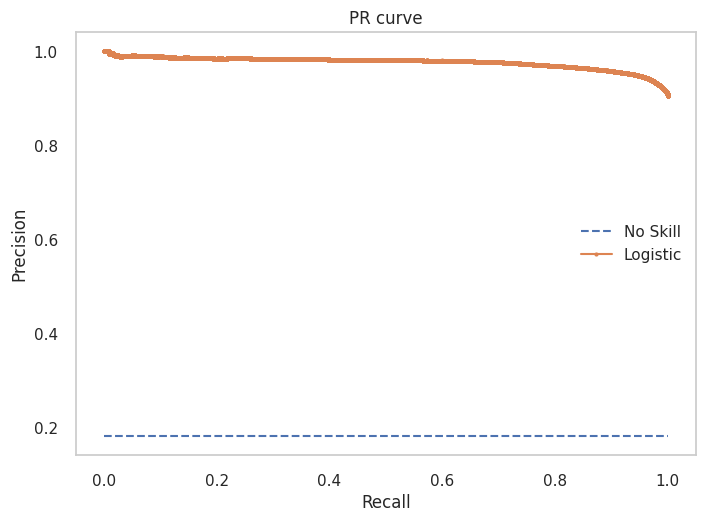

In [176]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

## 3 B. Precision-Recall Score

In [177]:
# precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9763682738083133

## 4. Kolmogorov-Smirnov Statistic

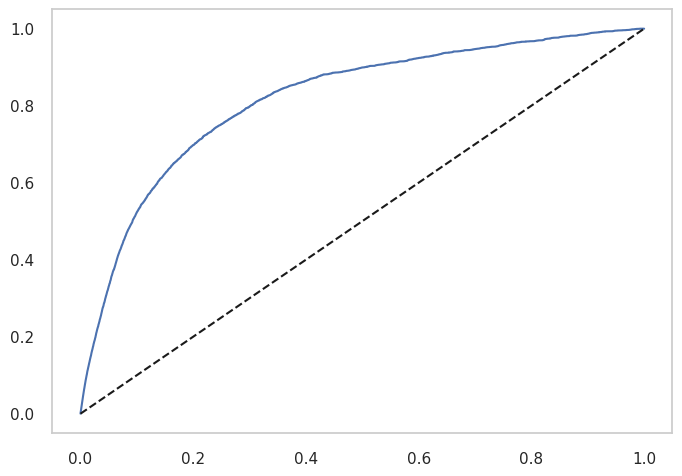

In [178]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

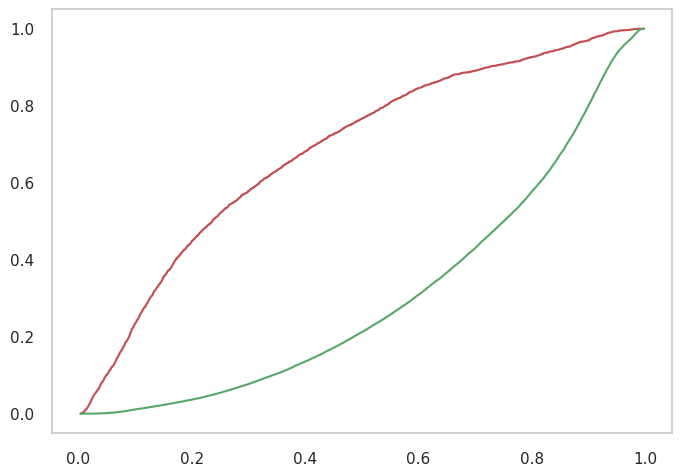

In [179]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [180]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.5573656730854213


All the scores above indicate the created PD model is an efficient one to apply on new data for getting accurate prediction.

# Saving Model

In [181]:
import pickle
filename = 'credit_risk_PD_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Black-Box Model Explainability

We will use two packages LIME (Local Interpretable Model-Agnostic Explanations) and SHAP (SHapley Additive exPlanations) here to work on model explainability.

In [182]:
# converting to dataframe 
backup_data = raw_df
preprocess_df = raw_df

In [183]:
# convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in preprocess_df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    preprocess_df[col] = lencoders[col].fit_transform(preprocess_df[col])

In [184]:
# separating data into target and features
X= preprocess_df.drop(columns='def_vs_nondef', axis=1)
y= preprocess_df['def_vs_nondef']

In [185]:
preprocess_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   grade                          181686 non-null  int64  
 3   home_ownership                 181686 non-null  int64  
 4   annual_inc                     181686 non-null  float64
 5   verification_status            181686 non-null  int64  
 6   purpose                        181686 non-null  int64  
 7   addr_state                     181686 non-null  int64  
 8   dti                            181686 non-null  float64
 9   inq_last_6mths                 181686 non-null  float64
 10  initial_list_status            181686 non-null  int64  
 11  out_prncp                      181686 non-null  float64
 12  total_pymnt               

In [186]:
import gc
gc.collect()

54169

# Model Explainability with LIME

In [187]:
from lime.lime_tabular import LimeTabularExplainer
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [188]:
trained_models = [] #  keep track of all details for models we train
def train_model(model, data, labels): 
  X = data
  y = labels.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12345)
  pipe = Pipeline([('scaler', StandardScaler()),('clf', model["clf"])])
  start_time = time.time()
  pipe.fit(X_train, y_train)
  train_time = time.time() - start_time

  train_accuracy =  pipe.score(X_train, y_train)
  test_accuracy = pipe.score(X_test, y_test) 
  model_details = {"name": model["name"], "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "train_time": train_time, "model": pipe}
  return model_details

models = [
          {"name": "Extra Trees", "clf": ExtraTreesClassifier()},
          {"name": "Random Forest", "clf": RandomForestClassifier(n_estimators=100)}, 
          {"name": "Gradient Boosting", "clf": GradientBoostingClassifier(n_estimators=100)},
          {"name": "XGBoost", "clf": XGBClassifier(silent=True)},
          {"name": "CatBoost", "clf": CatBoostClassifier()}, 
          {"name": "MLP Neural Net", "clf": MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)}]

for model in models:
  model_details = train_model(model, X, y) 
  trained_models.append(model_details)

[12:10:33] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Learning rate set to 0.084007
0:	learn: 0.5818521	total: 27.4ms	remaining: 27.4s
1:	learn: 0.4989790	total: 54.9ms	remaining: 27.4s
2:	learn: 0.4301465	total: 81.1ms	remaining: 26.9s
3:	learn: 0.3775317	total: 107ms	remaining: 26.6s
4:	learn: 0.3380234	total: 133ms	remaining: 26.5s
5:	learn: 0.3058499	total: 157ms	remaining: 26.1s
6:	learn: 0.2812986	total: 183ms	remaining: 26s
7:	learn: 0.2608745	total: 214ms	remaining: 26.6s
8:	learn: 0.2454457	total: 240ms	remaining: 26.4s
9:	learn: 0.2330391	total: 264ms	remaining: 26.1s
10:	learn: 0.2207899	total: 293ms	remaining: 26.4s
11:	learn: 0.2108374	total: 319ms	remaining: 26.3s
12:	learn: 0.2041345	total: 349ms	remaining: 26.5s
13:	learn: 0.1968574	total: 375ms	remaining: 26.4s
14:	learn: 0.1924145	total: 407ms	remaining: 26.8s
15:	learn: 0.1877102	total: 435ms	remaining: 26.8s
16:	learn: 0.1845921	total: 459ms	remaining: 26.5s
17:	learn: 0.1806203	total: 

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12345) 

def get_lime_explainer(model, data, labels):  

  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
  feat_names = list(data.columns)
  class_names = list(labels.unique())
  scaler = model["model"]["scaler"]
  data = scaler.transform(data) # scale data to reflect train time scaling
  lime_explainer = LimeTabularExplainer(data,
                                      feature_names=feat_names,
                                      class_names=class_names,
                                      categorical_features=cat_feat_ix ,
                                      mode="classification"
                                      )
  return lime_explainer

def lime_explain(explainer, data, predict_method, num_features): 
  explanation = explainer.explain_instance(data, predict_method, num_features=num_features) 
  return explanation

lime_data_explainations = []
lime_metrics = []
lime_explanation_time = []
feat_names = list(X.columns)
test_data_index = 6
for current_model in trained_models:  
  scaler = current_model["model"]["scaler"]
  scaled_test_data = scaler.transform(X_test)
  predict_method = current_model["model"]["clf"].predict_proba 
  top_x = 10
  start_time = time.time()
  # explain first sample from test data
  lime_explainer = get_lime_explainer(current_model, X_train, y_train)
  explanation = lime_explain(lime_explainer, scaled_test_data[test_data_index], predict_method, top_x) 
  elapsed_time = time.time() - start_time 

  ex_holder = {}
  for feat_index,ex in explanation.as_map()[1] :
    ex_holder[feat_names[feat_index]] = ex
  
  lime_data_explainations.append(ex_holder) 
  actual_pred = predict_method(scaled_test_data[test_data_index].reshape(1,-1))
  perc_pred_diff =  abs(actual_pred[0][1] - explanation.local_pred[0])   
  lime_explanation_time.append({"time": elapsed_time, "model": current_model["name"] })
  lime_metrics.append({"lime class1": explanation.local_pred[0], "actual class1": actual_pred[0][1], "class_diff": round(perc_pred_diff,3), "model": current_model["name"] })

In [190]:
def setup_plot():
  plt.rcParams["axes.grid.axis"] ="y"
  plt.rcParams["axes.grid"] = True
  plt.rcParams["legend.fontsize"] = 20
  plt.rc('grid', linestyle="dashed", color='lightgrey', linewidth=1)
  plt.rcParams["xtick.labelsize"] = 18
  plt.rcParams["ytick.labelsize"]  = 18

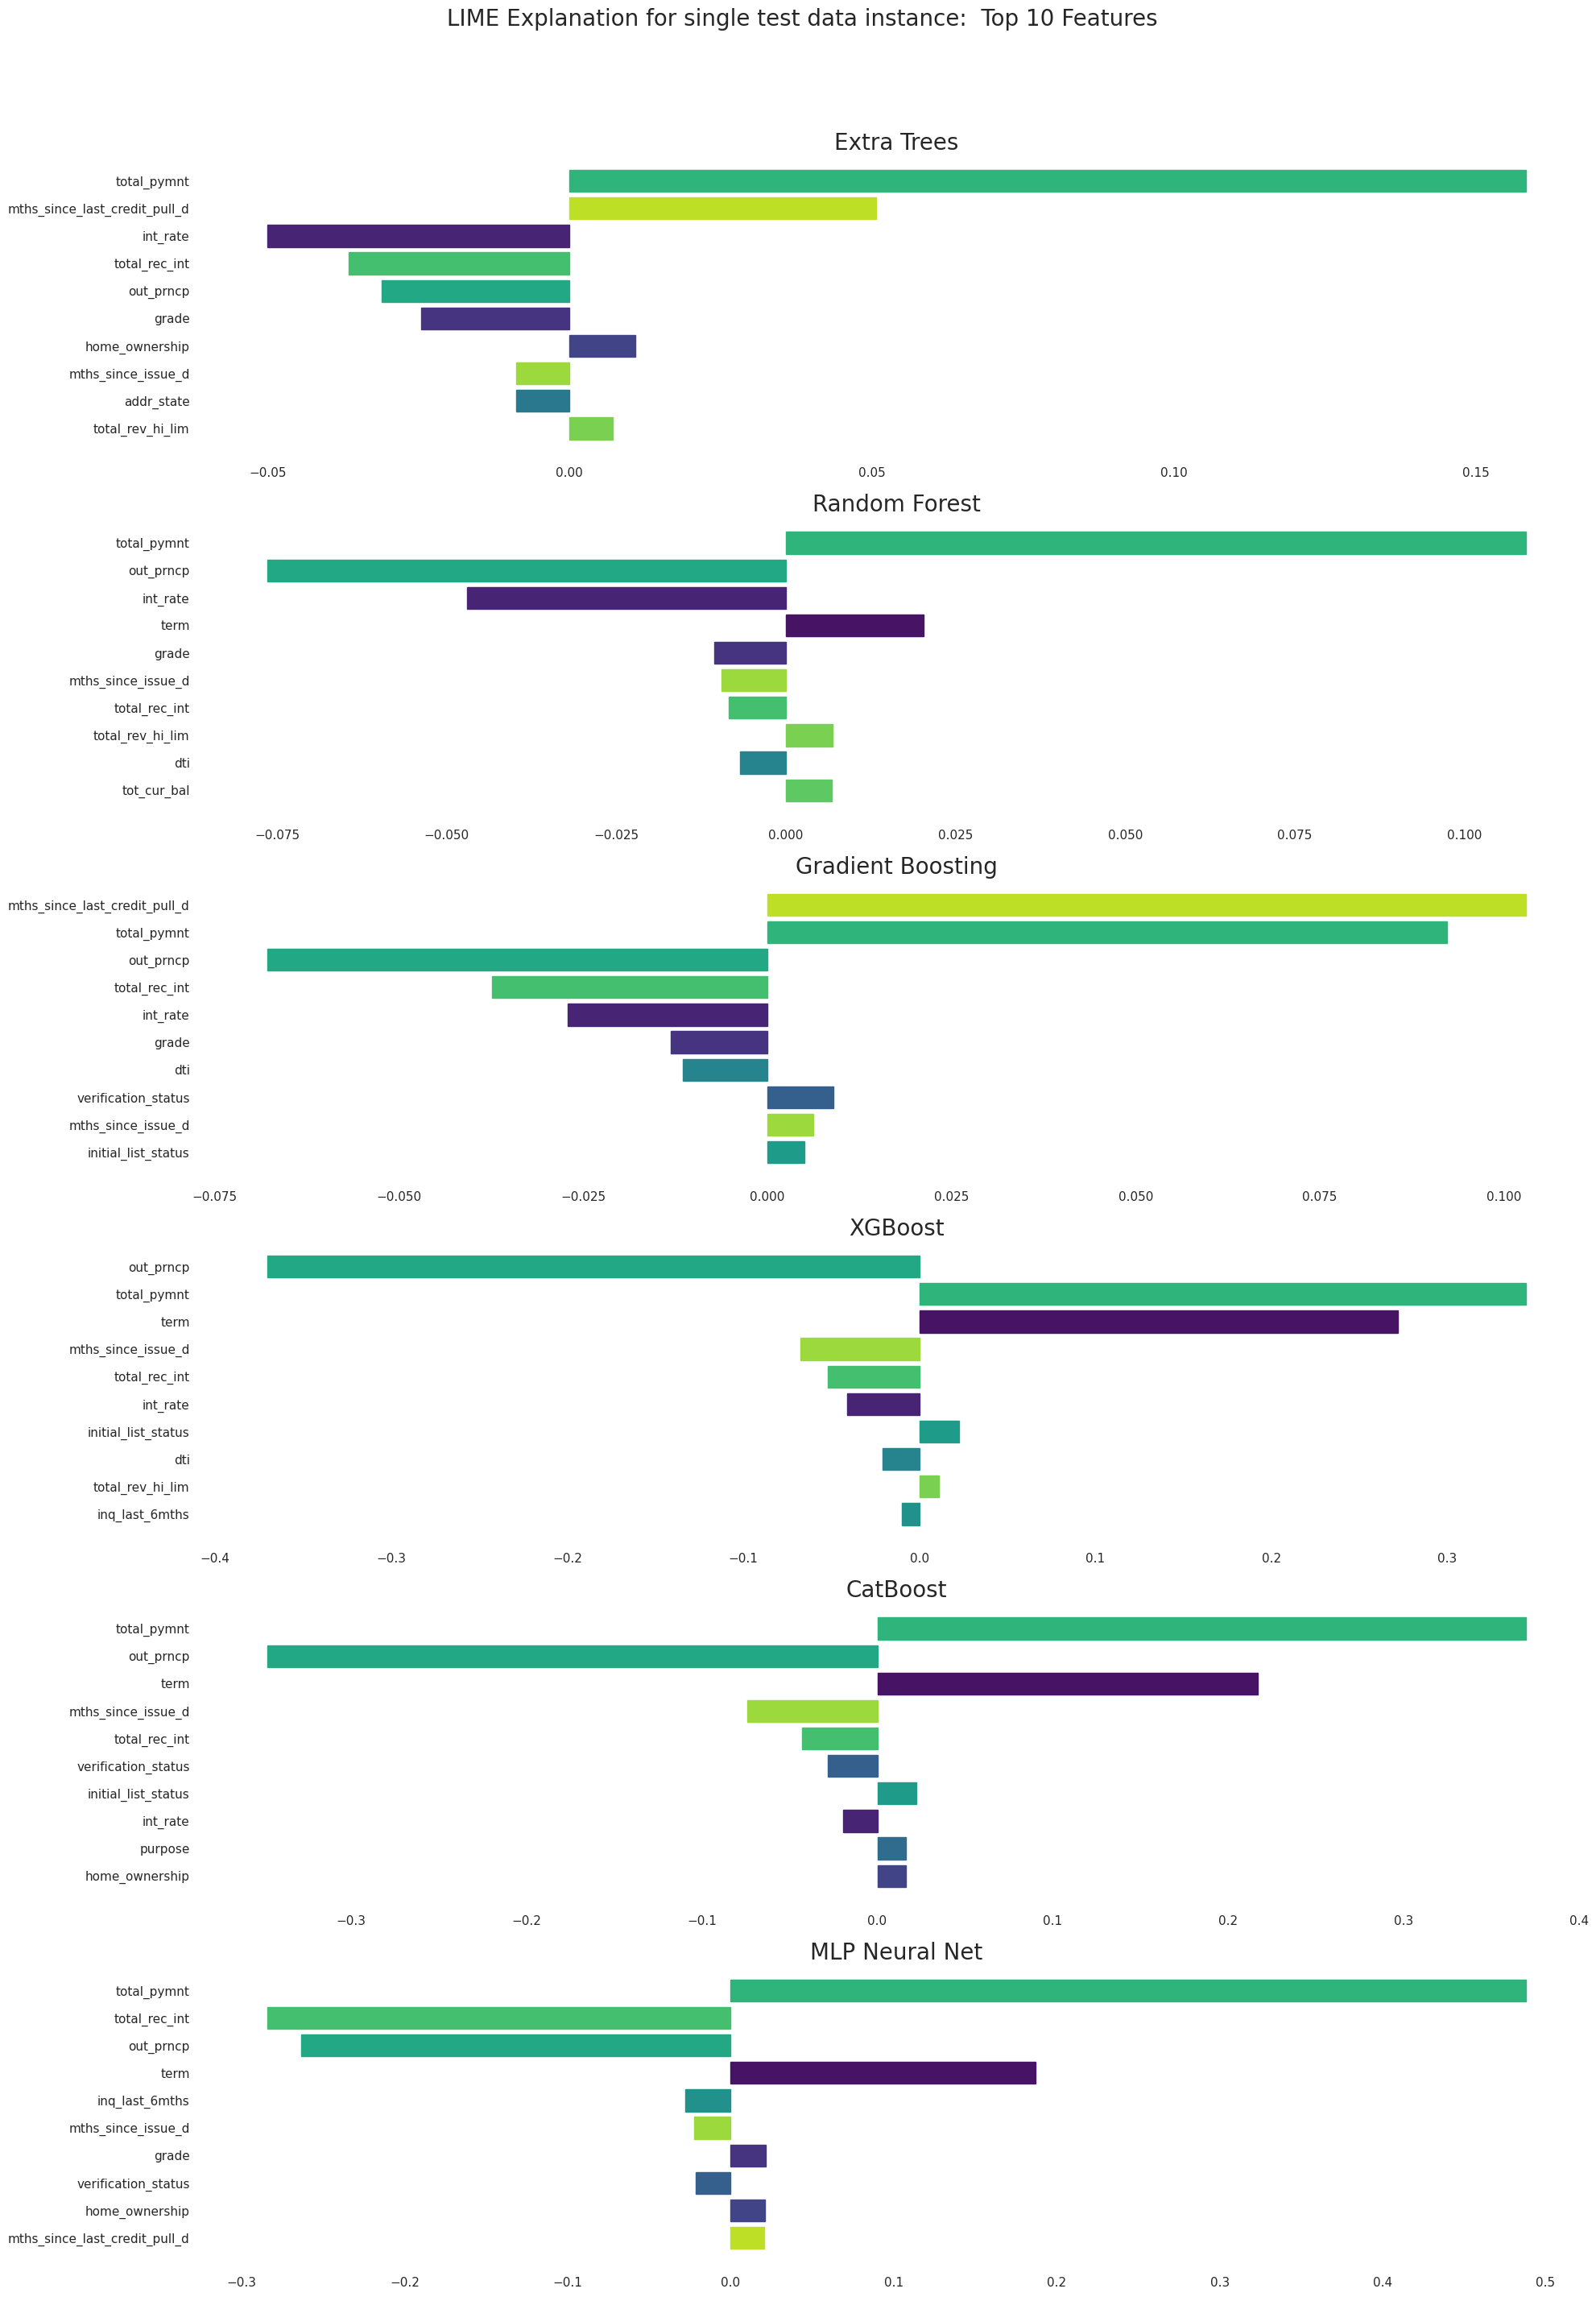

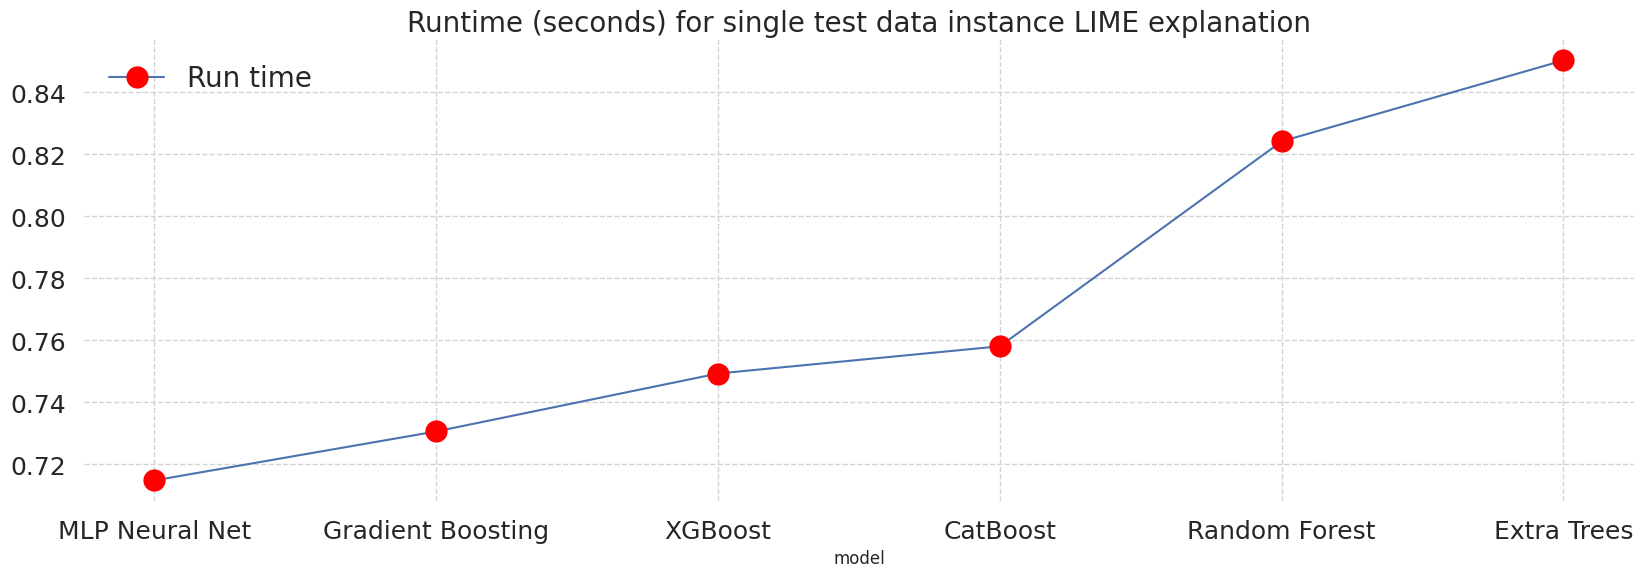

In [191]:
color_list =  sns.color_palette("viridis", len(X.columns)) 

def plot_lime_exp(fig, fig_index, exp_data, title):
  features =  list(exp_data.keys())[::-1]
  explanations = list(exp_data.values())[::-1]
  ax = fig.add_subplot(fig_index) 
  lime_bar = ax.barh( features, explanations ) 
  ax.set_title(title, fontsize = 20)
  for i,bar in enumerate(lime_bar):
    bar.set_color(color_list[list(X.columns).index(features[i])])
    plt.box(False) 
fig = plt.figure(figsize=(20,30))

# Plot lime explanations for trained models
for i, dex in enumerate(lime_data_explainations):
  fig_index = int("61" + str(i+1))
  plot_lime_exp(fig, fig_index, lime_data_explainations[i], trained_models[i]["name"])

plt.suptitle( " LIME Explanation for single test data instance:  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot run time for explanations
lx_df = pd.DataFrame(lime_explanation_time)
lx_df.sort_values("time", inplace=True)
setup_plot()
lx_ax = lx_df.plot(kind="line", marker="o", mfc="red", mec="white", markersize=16, x="model", title="Runtime (seconds) for single test data instance LIME explanation", figsize=(20,6))
lx_ax.title.set_size(20)
lx_ax.legend(["Run time"])
plt.box(False)

# LIME vs Actual Prediction

We need to compare local prediction by LIME vs actual prediction for all the models to verify if the above model explainabilities are reliable or not. If there is very minimal difference between local vs actual prediction, then the model explainability by LIME (above) should be trusted, else not.

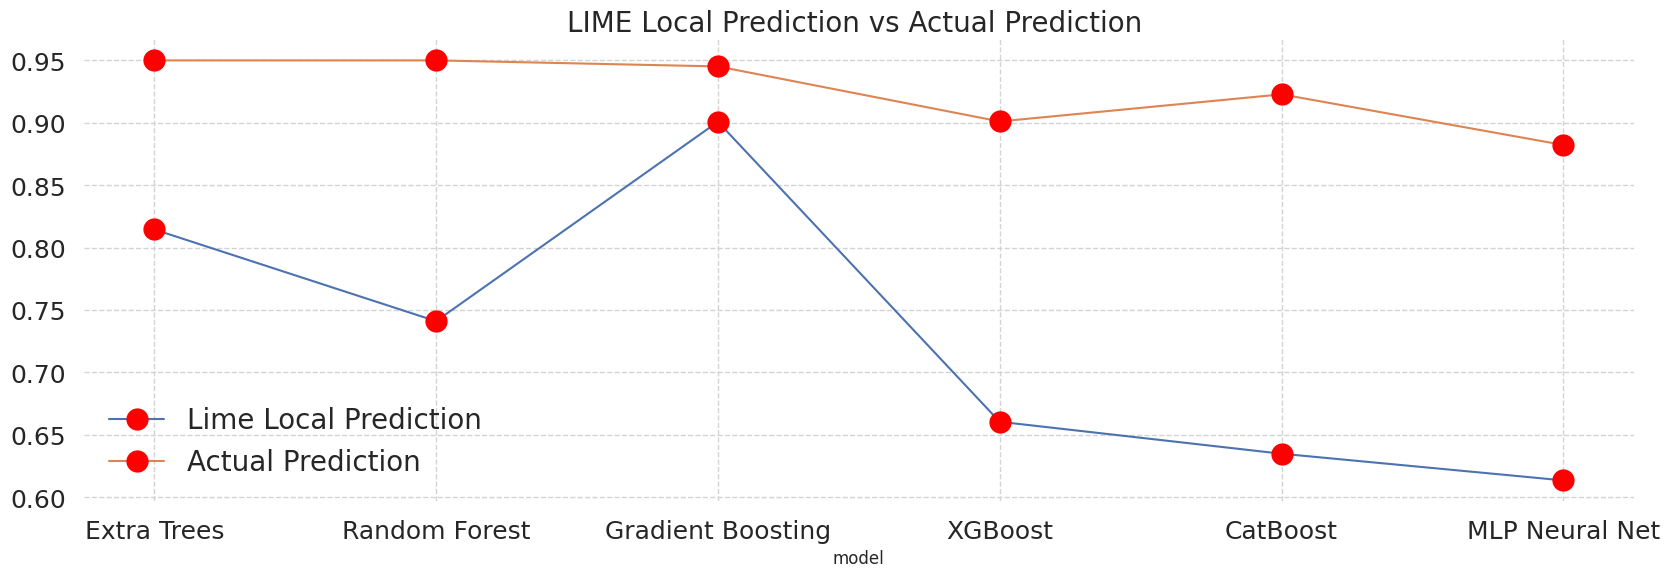

In [192]:
# plot run time for explanations
lime_metrics_df = pd.DataFrame(lime_metrics)  
lime_metrics_df_ax = lime_metrics_df[["lime class1", "actual class1", "model"]].plot(kind="line", marker="o", mfc="red", mec="white", markersize=16, x="model", title="LIME Local Prediction vs Actual Prediction ", figsize=(20,6))
lime_metrics_df_ax.title.set_size(20)
lime_metrics_df_ax.legend(["Lime Local Prediction", "Actual Prediction"])
plt.box(False)

We observe:

* The difference between local prediction and actual prediction is the least for Gradient Boosting. Hence, we can trust model explainablity for Gradient Boosting using LIME.
* "out_prncp", "total_rec_int", "int_rate", "grade", and "dti", are the features which negatively contribute towards defaulters (i.e. positively contributes to non defaulters)
* "mths_since_last_crdit_pull_d", "total_pymnt", "verification_status", "mths_since_issue_d", and "initial_list_status" are positively contribute towards defaulters

# SHAP Kernel Explainer

There is another alternative SHAP Tree Explainer which is a faster alternative. You may use that too instead of Kernel Explainer.

In [197]:
import shap
current_model = trained_models[2] # Explain the Gradient Boosting Model
clf = current_model["model"]["clf"]
scaler = current_model["model"]["scaler"]
scaled_train_data = scaler.transform(X_train)
sub_sampled_train_data = shap.sample(scaled_train_data, 1000, random_state=0) 
# use 1000 samples of train data as background data

scaled_test_data = scaler.transform(X_test) 
subsampled_test_data =scaled_test_data[test_data_index].reshape(1,-1)

start_time = time.time()
explainer = shap.KernelExplainer(clf.predict_proba, sub_sampled_train_data)
shap_values = explainer.shap_values(subsampled_test_data,  l1_reg="aic")
elapsed_time = time.time() - start_time
# explain first sample from test data
print("Kernel Explainer SHAP run time", round(elapsed_time,3) , " seconds. ", current_model["name"])
print("SHAP expected value", explainer.expected_value)
print("Model mean value", clf.predict_proba(scaled_train_data).mean(axis=0))
print("Model prediction for test data", clf.predict_proba(subsampled_test_data))
shap.initjs()
pred_ind = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][0], subsampled_test_data[0], feature_names=X_train.columns)

  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 14.493  seconds.  Gradient Boosting
SHAP expected value [0.10904392 0.89095608]
Model mean value [0.09891247 0.90108753]
Model prediction for test data [[0.05483538 0.94516462]]


SHAP shows:

* "total_rec_int" and "int_rate" contribute negatively towards defaulters.
* "mths_since_last_credit_pull_d", "out_prncp", and "total_pymnt" contributes positively towards defaulters.

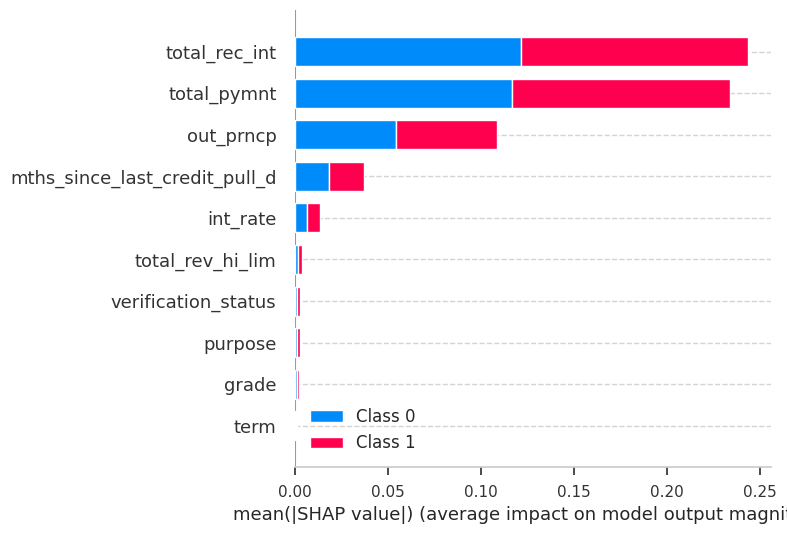

In [198]:
shap.initjs()
shap.summary_plot(shap_values, subsampled_test_data, feature_names=X_train.columns, max_display=10)

# Explain a Test Data Instance for all Models

In [199]:
def get_kernel_shap_explainer(model, background_data, train_data):  
  shap_explainer = shap.KernelExplainer(model.predict_proba, background_data)   
  return shap_explainer 

def shap_explain(explainer, test_data): 
  shap_values = explainer.shap_values(test_data, l1_reg="aic")
  
  return shap_values

shap_data_explainations = []
shape_explanation_time = []
feat_names = list(X.columns) 
data_subsample = 500 
for current_model in trained_models:  
  scaler = current_model["model"]["scaler"]
  scaled_test_data = scaler.transform(X_test)
  scaled_train_data = scaler.transform(X_train)
  sampled_scaled_train_data = shap.sample(scaled_train_data, data_subsample) # subsample background data to make things faster
  
  start_time = time.time()
  shap_explainer  = get_kernel_shap_explainer(current_model["model"]["clf"], sampled_scaled_train_data, scaled_train_data)

  # explain first sample from test data 
  sampled_scaled_test_data = scaled_test_data[test_data_index].reshape(1,-1)
  shap_values = shap_explain(shap_explainer, sampled_scaled_test_data) 
  elapsed_time = time.time() - start_time 
  idx = np.argsort(np.abs(shap_values[1][0]))[::-1] 
  ex_holder = { feat_names[idx[i]] : shap_values[1][0][idx[i]] for i in range(top_x)} 
   
 
  shap_data_explainations.append(ex_holder) 
  shape_explanation_time.append({"time": elapsed_time, "model": current_model["name"] })

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

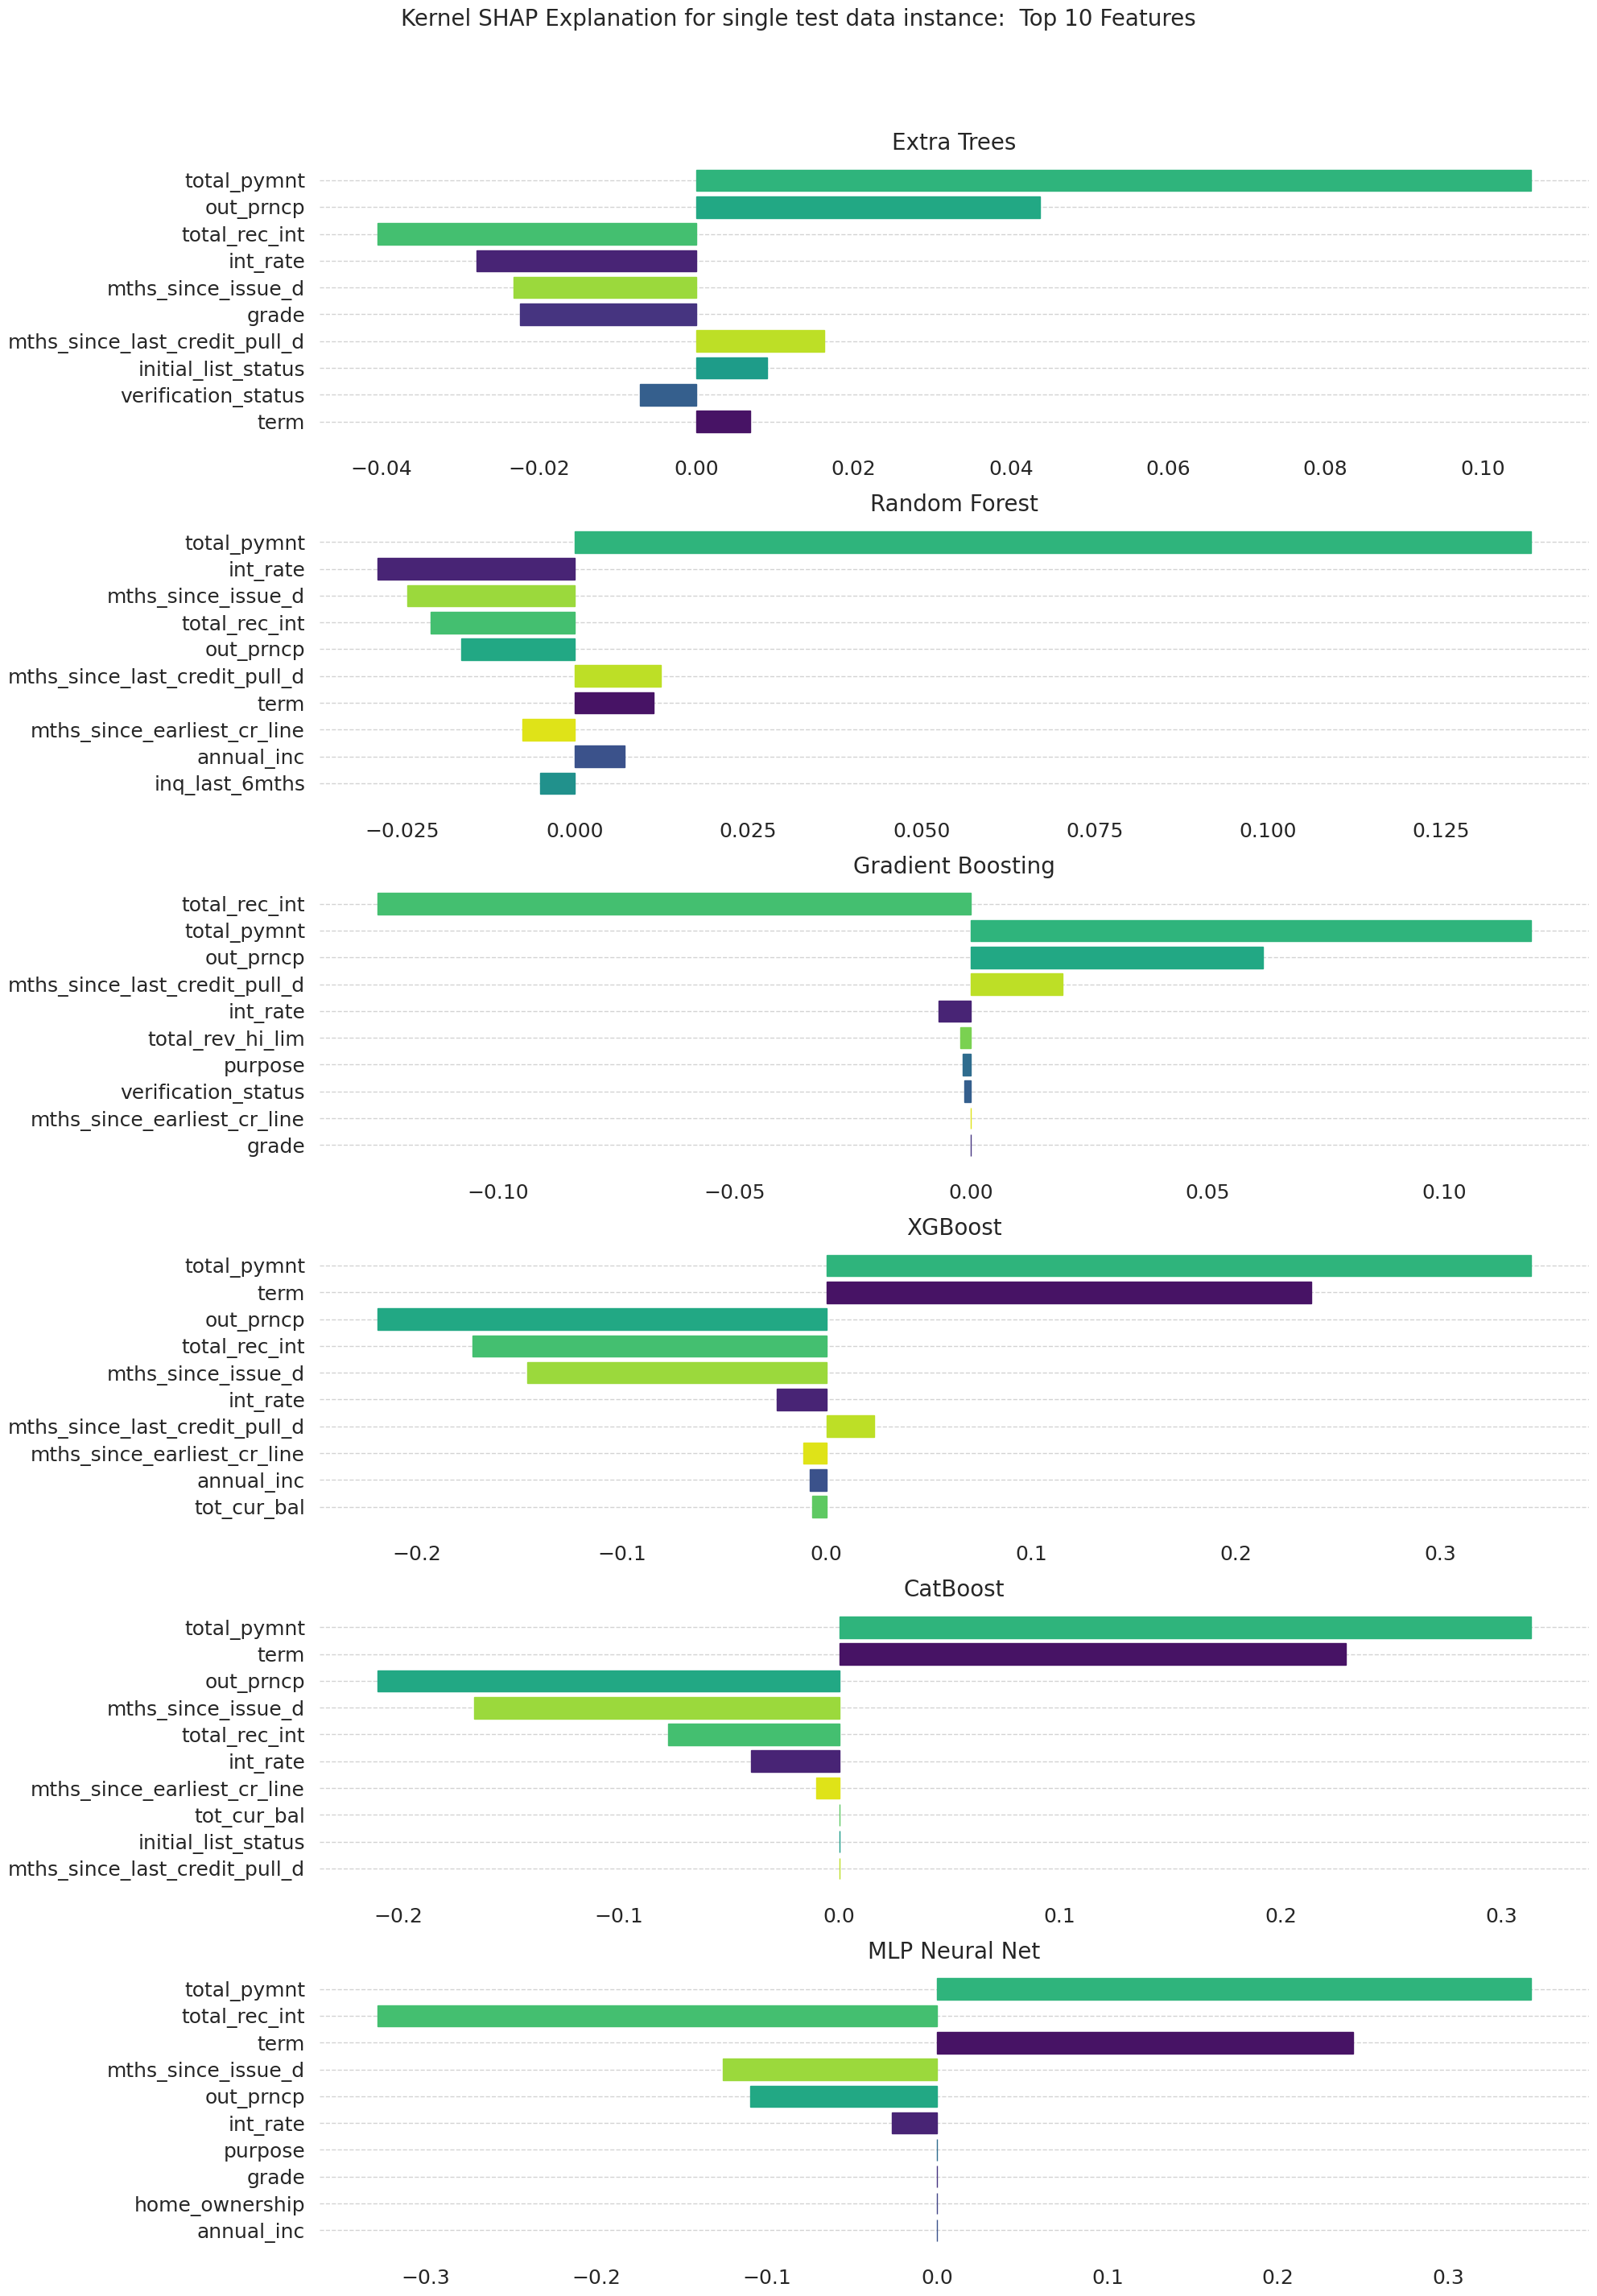

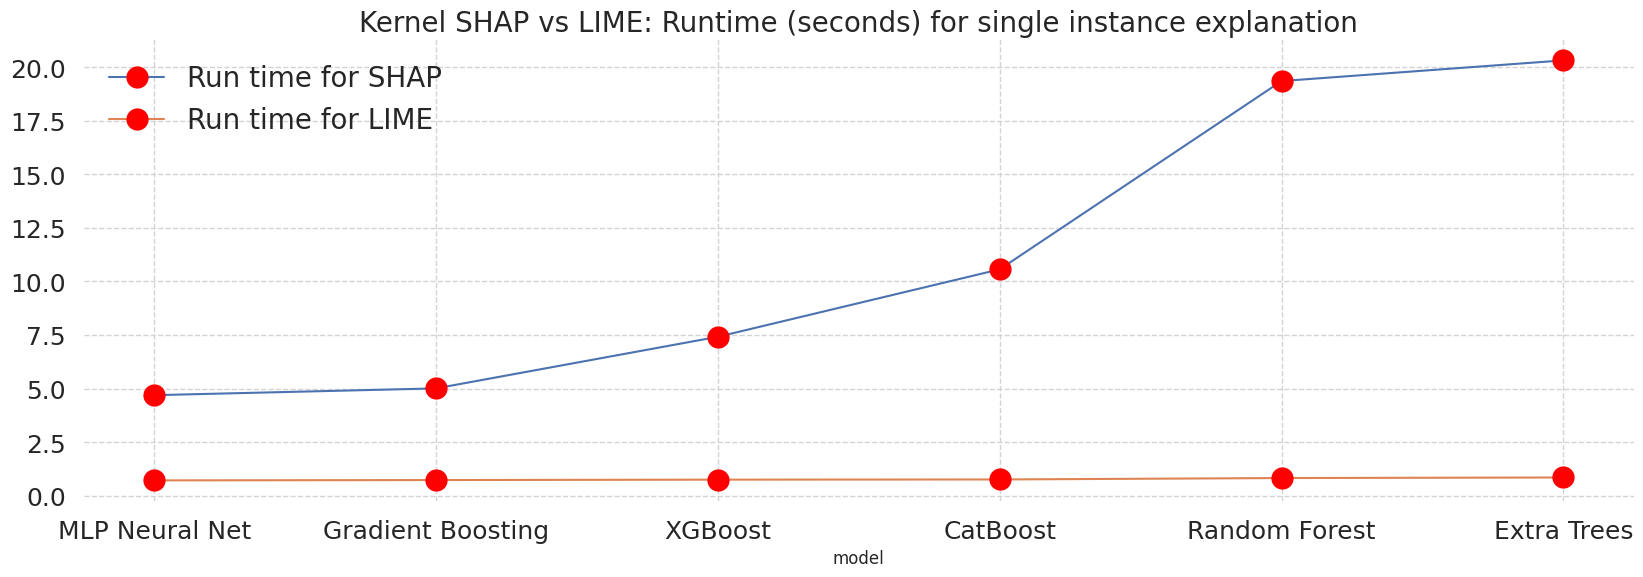

In [200]:
def plot_shap_exp(fig, fig_index, exp_data, title):
  features =  list(exp_data.keys())[::-1]
  explanations = list(exp_data.values())[::-1]
  ax = fig.add_subplot(fig_index) 
  lime_bar = ax.barh( features, explanations ) 
  ax.set_title(title, fontsize = 20)
  for i,bar in enumerate(lime_bar):
    bar.set_color(color_list[list(current_data.columns).index(features[i])])
    plt.box(False) 


# Plot SHAP explanations for a given test set item
fig = plt.figure(figsize=(20,30))
for i, dex in enumerate(shap_data_explainations):
  fig_index = int("61" + str(i+1))
  plot_lime_exp(fig, fig_index, shap_data_explainations[i], trained_models[i]["name"])

plt.suptitle( "Kernel SHAP Explanation for single test data instance:  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot SHAP explanation run time
shapx_df = pd.DataFrame(shape_explanation_time)
shapx_df.sort_values("time", inplace=True)

# Plot both LIME and SHAP explanation run times
m_df =  shapx_df.merge(lx_df, on="model", suffixes=("_SHAP", "_LIME")) 
m_df.head() 
mx_df_ax = m_df.plot(kind="line", marker="o", mfc="red", mec="white", markersize=16, x="model", title="Kernel SHAP vs LIME: Runtime (seconds) for single instance explanation", figsize=(20,6))
mx_df_ax.title.set_size(20)
mx_df_ax.legend(["Run time for SHAP", "Run time for LIME"])
plt.box(False)